In [79]:
import sqlite3
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

This code example is from w3schools website: [Link](https://www.w3schools.com/sql/default.asp)

# Database Scheme

In [143]:
conn = sqlite3.connect('w3school_database') 
c = conn.cursor()

In [144]:
c.execute(""" DROP TABLE IF EXISTS league""")
c.execute(""" DROP TABLE IF EXISTS players""")
c.execute(""" DROP TABLE IF EXISTS players_stats""")
c.execute(""" DROP TABLE IF EXISTS cities""")
c.execute(""" DROP TABLE IF EXISTS team_revenue""")
c.execute(""" DROP TABLE IF EXISTS games""")
c.execute(""" DROP TABLE IF EXISTS head_coaches""")
c.execute(""" DROP TABLE IF EXISTS head_coaches_stats""")

In [145]:
c.execute('''
          CREATE TABLE IF NOT EXISTS league
          ([TeamID] TEXT PRIMARY KEY,
           [TeamName] TEXT NOT NULL,
           [ColorScheme] TEXT,
           [Stadium] TEXT,
           [StadiumCapacity] INTEGER,
           [CityName] TEXT,
           FOREIGN KEY(CityName) REFERENCES cities(CityName)
           )
          ''');

In [146]:
c.execute('''
          CREATE TABLE IF NOT EXISTS cities
          ([CityName] TEXT,
           [StateName] TEXT,
           [Population] INTEGER,
           [AvgIncome] FLOAT,
           FOREIGN KEY(CityName) REFERENCES teams(CityName)
           CONSTRAINT tab_pk PRIMARY KEY(CityName)

           )
           ''');


In [147]:
c.execute('''
          CREATE TABLE IF NOT EXISTS players
          ([PlayerID] INTEGER PRIMARY KEY,
           [Name] TEXT NOT NULL,
           [Height] FLOAT,
           [Weight] FLOAT,
           [Country] TEXT,
           [DraftYear] INTEGER,
           [DraftRound] INTEGER,
           [DraftNumber] INTEGER,
           [YearOfBirth] INTEGER,
           [Position] TEXT NOT NULL,
           FOREIGN KEY(PlayerID) REFERENCES playerStats(PlayerID)
           )
          ''');


In [148]:
c.execute('''
          CREATE TABLE IF NOT EXISTS players_stats
          ([PlayerStatID] INTEGER,
          [Season] INTEGER,
          [TeamID] TEXT NOT NULL,
          [Salary] INTEGER,
          [GamesPlayed] INTEGER NOT NULL,
           FOREIGN KEY(TeamID) REFERENCES leauge(TeamID),
           FOREIGN KEY(PlayerStatID) REFERENCES players(PlayerID)
           CONSTRAINT tab_pk PRIMARY KEY(PlayerStatID, Season)
           )
          ''');


In [149]:
c.execute('''
          CREATE TABLE IF NOT EXISTS team_revenue
          ([TeamID] TEXT PRIMARY KEY,
          [Season] TEXT,
          [Revenue] INTEGER,
           FOREIGN KEY(Season) REFERENCES games(Season),
           FOREIGN KEY(TeamID) REFERENCES league(TeamID)

           )
          ''');

In [150]:
c.execute('''
          CREATE TABLE IF NOT EXISTS games
          ([GameID] TEXT PRIMARY KEY,
           [GameDate] DATE,
           [Season] INTEGER,
           [HomeTeamID] TEXT,
           [AwayTeamID] TEXT,
           [HomeTeamPoints] INTEGER,
           [AwayTeamPoints] INTEGER,
           FOREIGN KEY(HomeTeamID) REFERENCES league(TeamID),
           FOREIGN KEY(AwayTeamID) REFERENCES league(TeamID)
           )
          ''');


In [151]:
c.execute('''
          CREATE TABLE IF NOT EXISTS head_coaches
          ([HeadCoachID] INTEGER PRIMARY KEY,
           [Name] TEXT
           )
          ''');

In [152]:
c.execute('''
          CREATE TABLE IF NOT EXISTS head_coaches_stats
          ([HeadCoachID] INTEGER,
           [Season] INTEGER,
           [TeamID] TEXT,
           [StartSeason] INTEGER,
           [Salary] INTEGER,
           FOREIGN KEY(HeadCoachID) REFERENCES head_coaches(HeadCoachID),
           FOREIGN KEY(TeamID) REFERENCES league(TeamID),
           CONSTRAINT tab_pk PRIMARY KEY(HeadCoachID, Season)
           )
          ''');

In [153]:
conn.commit()

# Insert data

In [154]:
conn = sqlite3.connect('w3school_database') 
c = conn.cursor()

In [155]:
c.execute("""
            INSERT INTO head_coaches_stats (HeadCoachID, Season, TeamID, StartSeason, Salary)
                VALUES
                (5840, 2021, 'ATL', 2021, 326000),
                (2390, 2021, 'BKN', 2021, 917000),
                (4454, 2021, 'BOS', 2020, 842000),
                (5043, 2021, 'CHA', 2022, 733000),
                (8798, 2021, 'CHI', 2020, 568000),
                (3997, 2021, 'CLE', 2020, 638000),
                (7273, 2021, 'DAL', 2021, 247000),
                (6833, 2021, 'DEN', 2015, 136000),
                (2054, 2021, 'DET', 2018, 244000),
                (5404, 2021, 'GSW', 2014, 247000),
                (7524, 2021, 'HOU', 2020, 254000),
                (5274, 2021, 'IND', 2021, 953000),
                (8673, 2021, 'LAC', 2020, 103000),
                (9187, 2021, 'LAL', 2022, 383000),
                (1825, 2021, 'MEM', 2019, 682000),
                (1285, 2021, 'MIA', 2008, 208000),
                (6604, 2021, 'MIL', 2018, 424000),
                (8548, 2021, 'MIN', 2021, 843000),
                (5824, 2021, 'NOP', 2021, 323000),
                (7867, 2021, 'NYK', 2020, 463000),
                (3227, 2021, 'OKC', 2020, 900000),
                (2801, 2021, 'ORL', 2021, 975000),
                (7700, 2021, 'PHI', 2020, 223000),
                (2206, 2021, 'PHX', 2019, 876000),
                (5829, 2021, 'POR', 2021, 498000),
                (8028, 2021, 'SAC', 2022, 764000),
                (8826, 2021, 'SAS', 1996, 466000),
                (9355, 2021, 'TOR', 2018, 284000),
                (8802, 2021, 'UTA', 2022, 440000),
                (4254, 2021, 'WAS', 2021, 271000)


""")

In [156]:
c.execute("""
            INSERT INTO head_coaches (HeadCoachID, Name)
                VALUES
            (5840, 'Nate_McMillan'),
            (2390, 'Ime_Udoka'),
            (4454, 'Steve_Nash'),
            (5043, 'Fred_Hoiberg'),
            (8798, 'Billy_Donovan'),
            (3997, 'J_B_Bickerstaff'),
            (7273, 'Jason_Kidd'),
            (6833, 'Michael_Malone'),
            (2054, 'Dwane_Casey'),
            (5404, 'Steve_Kerr'),
            (7524, 'Stephen_Silas'),
            (5274, 'Rick_Carlisle'),
            (8673, 'Tyronn_Lue'),
            (9187, 'Darvin_Ham'),
            (1825, 'Taylor_Jenkins'),
            (1285, 'Erik_Spoelstra'),
            (6604, 'Mike_Budenholzer'),
            (8548, 'Chris_Finch'),
            (5824, 'Willie_Green'),
            (7867, 'Tom_Thibodeau'),
            (3227, 'Mark_Daigneault'),
            (2801, 'Jamahl_Mosley'),
            (7700, 'Doc_Rivers'),
            (2206, 'Monty_Williams'),
            (5829, 'Chauncey_Billups'),
            (8028, 'Mike_Brown'),
            (8826, 'Gregg_Popovich'),
            (9355, 'Nick_Nurse'),
            (8802, 'Jeff_Van_Gundy'),
            (4254, 'Wes_Unseld')
""")

In [157]:
c.execute("""
            INSERT INTO players (PlayerID, Name, Height, Weight, Country, DraftYear, DraftRound, DraftNumber, YearOfBirth, Position)
                VALUES
(20808, 'Yogi_Ferrell', 182.88, 80.73, 'USA', NULL, NULL, NULL, 1993, 'G'),
(24389, 'Zion_Williamson', 200.66, 128.82, 'USA', 2019, 1, 1, 2001, 'G'),
(84131, 'Zeke_Nnaji', 205.74, 108.86, 'USA', 2020, 1, 22, 2001, 'G'),
(97709, 'Zach_LaVine', 195.58, 90.71, 'USA', 2014, 1, 13, 1995, 'G'),
(66413, 'Yuta_Watanabe', 205.74, 97.52, 'Japan', NULL, NULL, NULL, 1995, 'G'),
(71283, 'Xavier_Tillman', 203.2, 111.13, 'USA', 2020, 2, 35, 1999, 'G'),
(63846, 'Willie_Cauley-Stein', 213.36, 108.86, 'USA', 2015, 1, 6, 1994, 'G'),
(82626, 'Frank_Kaminsky', 213.36, 108.86, 'USA', 2015, 1, 9, 1993, 'G-F'),
(65796, 'Frank_Ntilikina', 193.04, 90.71, 'France', 2017, 1, 8, 1999, 'G-F'),
(93956, 'Fred_VanVleet', 185.42, 89.35, 'USA', NULL, NULL, NULL, 1994, 'G-F'),
(11770, 'Freddie_Gillespie', 205.74, 111.13, 'USA', NULL, NULL, NULL, 1997, 'G-F'),
(34784, 'Furkan_Korkmaz', 200.66, 91.62, 'Turkey', 2016, 1, 26, 1998, 'G-F'),
(39637, 'Gabe_Vincent', 190.5, 90.71, 'USA', NULL, NULL, NULL, 1996, 'G-F'),
(15688, 'Gabriel_Deck', 198.12, 104.77, 'Argentina', NULL, NULL, NULL, 1995, 'G-F'),
(63668, 'Garrett_Temple', 195.58, 88.45, 'USA', NULL, NULL, NULL, 1986, 'G-F'),
(93494, 'Garrison_Mathews', 195.58, 97.52, 'USA', NULL, NULL, NULL, 1997, 'G-F'),
(67141, 'Gary_Clark', 198.12, 102.05, 'USA', NULL, NULL, NULL, 1995, 'G-F'),
(95963, 'Gary_Harris', 193.04, 95.25, 'USA', 2014, 1, 19, 1995, 'G-F'),
(70800, 'Gary_Payton_II', 190.5, 88.45, 'USA', NULL, NULL, NULL, 1993, 'G-F'),
(90852, 'Gary_Trent_Jr', 195.58, 94.80, 'USA', 2018, 2, 37, 1999, 'G-F'),
(33819, 'George_Hill', 193.04, 85.27, 'USA', 2008, 1, 26, 1986, 'G-F'),
(27908, 'Georges_Niang', 200.66, 104.32, 'USA', 2016, 2, 50, 1993, 'G-F'),
(11038, 'Giannis_Antetokounmpo', 210.82, 109.76, 'Greece', 2013, 1, 15, 1995, 'G-F'),
(43390, 'Glenn_Robinson_III', 198.12, 100.69, 'USA', 2014, 2, 40, 1994, 'G-F'),
(71083, 'Goga_Bitadze', 210.82, 113.39, 'Georgia', 2019, 1, 18, 2000, 'G-F'),
(64011, 'Goran_Dragic', 190.5, 86.18, 'Slovenia', 2008, 2, 45, 1986, 'G-F'),
(56027, 'Gordon_Hayward', 200.66, 102.05, 'USA', 2010, 1, 9, 1990, 'G-F'),
(78181, 'Gorgui_Dieng', 208.28, 114.30, 'Senegal', 2013, 1, 21, 1990, 'G-F'),
(14995, 'Grant_Riller', 187.96, 86.18, 'USA', 2020, 2, 56, 1997, 'G-F'),
(36828, 'Grant_Williams', 198.12, 107.04, 'USA', 2019, 1, 22, 1999, 'G-F'),
(19383, 'Grayson_Allen', 193.04, 89.81, 'USA', 2018, 1, 21, 1996, 'G-F'),
(44741, 'Greg_Whittington', 203.2, 95.25, 'USA', NULL, NULL, NULL, 1993, 'G-F'),
(60552, 'Hamidou_Diallo', 195.58, 91.62, 'USA', 2018, 2, 45, 1999, 'G-F'),
(87674, 'Harrison_Barnes', 203.2, 102.05, 'USA', 2012, 1, 7, 1992, 'G-F'),
(24759, 'Harry_Giles_III', 210.82, 108.86, 'USA', 2017, 1, 20, 1998, 'G-F'),
(14864, 'Frank_Jackson', 190.5, 92.98, 'USA', 2017, 2, 31, 1998, 'G-F'),
(72576, 'Hassan_Whiteside', 213.36, 120.20, 'USA', 2010, 2, 33, 1989, 'G-F'),
(46347, 'Facundo_Campazzo', 177.8, 88.45, 'Argentina', NULL, NULL, NULL, 1991, 'G-F'),
(46134, 'Ersan_Ilyasova', 205.74, 106.59, 'Turkey', 2005, 2, 36, 1987, 'G-F'),
(53840, 'Devon_Dotson', 187.96, 83.91, 'USA', NULL, NULL, NULL, 2000, 'F'),
(28584, 'Devontae_Cacok', 200.66, 108.86, 'USA', NULL, NULL, NULL, 1997, 'F'),
(77060, 'Devonte_Graham', 185.42, 88.45, 'USA', 2018, 2, 34, 1995, 'F'),
(35063, 'Dewayne_Dedmon', 213.36, 111.13, 'USA', NULL, NULL, NULL, 1990, 'F'),
(13626, 'Didi_Louzada', 195.58, 85.27, 'Brazil', 2019, 2, 35, 2000, 'F'),
(64880, 'Dillon_Brooks', 200.66, 102.05, 'Canada', 2017, 2, 45, 1996, 'F'),
(38374, 'Domantas_Sabonis', 210.82, 108.86, 'Lithuania', 2016, 1, 11, 1996, 'F'),
(83316, 'Donovan_Mitchell', 185.42, 97.52, 'USA', 2017, 1, 13, 1997, 'F'),
(51635, 'Donta_Hall', 208.28, 104.32, 'USA', NULL, NULL, NULL, 1998, 'F'),
(23324, 'Donte_DiVincenzo', 193.04, 92.07, 'USA', 2018, 1, 17, 1997, 'F'),
(30838, 'Dorian_Finney-Smith', 200.66, 99.79, 'USA', NULL, NULL, NULL, 1993, 'F'),
(71852, 'Doug_McDermott', 200.66, 102.05, 'USA', 2014, 1, 11, 1992, 'F'),
(56954, 'Draymond_Green', 198.12, 104.32, 'USA', 2012, 2, 35, 1990, 'F'),
(44314, 'Drew_Eubanks', 205.74, 111.13, 'USA', NULL, NULL, NULL, 1997, 'F'),
(75783, 'Duncan_Robinson', 200.66, 97.52, 'USA', NULL, NULL, NULL, 1994, 'F'),
(42717, 'Dwayne_Bacon', 198.12, 100.24, 'USA', 2017, 2, 40, 1996, 'F'),
(14035, 'Dwight_Howard', 208.28, 120.20, 'USA', 2004, 1, 1, 1986, 'C-F'),
(23347, 'Dwight_Powell', 208.28, 108.86, 'Canada', 2014, 2, 45, 1992, 'C-F'),
(24866, 'Dylan_Windler', 198.12, 88.90, 'USA', 2019, 1, 26, 1997, 'C-F'),
(21684, 'ETwaun_Moore', 190.5, 86.63, 'USA', 2011, 2, 55, 1989, 'C-F'),
(14065, 'Ed_Davis', 205.74, 98.88, 'USA', 2010, 1, 13, 1989, 'C-F'),
(93195, 'Edmond_Sumner', 193.04, 88.90, 'USA', 2017, 2, 52, 1996, 'C-F'),
(93406, 'Elfrid_Payton', 190.5, 88.45, 'USA', 2014, 1, 10, 1994, 'C-F'),
(79125, 'Elijah_Bryant', 195.58, 95.25, 'USA', NULL, NULL, NULL, 1995, 'G'),
(19542, 'Elijah_Hughes', 195.58, 97.52, 'USA', 2020, 2, 39, 1998, 'G-F'),
(61189, 'Enes_Kanter', 208.28, 113.39, 'Turkey', 2011, 1, 3, 1992, 'G-F'),
(53541, 'Eric_Bledsoe', 185.42, 97.06, 'USA', 2010, 1, 18, 1990, 'G-F'),
(46619, 'Eric_Gordon', 190.5, 97.52, 'USA', 2008, 1, 7, 1989, 'G-F'),
(69361, 'Eric_Paschall', 198.12, 115.66, 'USA', 2019, 2, 41, 1997, 'G-F'),
(99405, 'Evan_Fournier', 200.66, 92.98, 'France', 2012, 1, 20, 1993, 'G-F'),
(37695, 'Henry_Ellenson', 208.28, 108.86, 'USA', 2016, 1, 18, 1997, 'G-F'),
(81447, 'Ignas_Brazdeikis', 198.12, 100.24, 'Canada', 2019, 2, 47, 1999, 'G-F'),
(90683, 'Iman_Shumpert', 195.58, 96.16, 'USA', 2011, 1, 17, 1990, 'G-F'),
(18580, 'Jared_Dudley', 198.12, 107.50, 'USA', 2007, 1, 22, 1986, 'G-F'),
(27041, 'Jared_Harper', 177.8, 79.37, 'USA', NULL, NULL, NULL, 1998, 'G-F'),
(64177, 'Jaren_Jackson_Jr', 210.82, 109.76, 'USA', 2018, 1, 4, 2000, 'G-F'),
(33672, 'Jarred_Vanderbilt', 205.74, 97.06, 'USA', 2018, 2, 41, 1999, 'G-F'),
(45275, 'Jarrell_Brantley', 195.58, 113.39, 'USA', 2019, 2, 50, 1996, 'G-F'),
(94861, 'Jarrett_Allen', 210.82, 110.22, 'USA', 2017, 1, 22, 1998, 'G-F'),
(13866, 'Jarrett_Culver', 198.12, 88.45, 'USA', 2019, 1, 6, 1999, 'G-F'),
(79133, 'Javonte_Green', 193.04, 92.98, 'USA', NULL, NULL, NULL, 1994, 'G-F'),
(93607, 'Jaxson_Hayes', 210.82, 99.79, 'USA', 2019, 1, 8, 2000, 'G-F'),
(56447, 'Jay_Scrubb', 195.58, 99.79, 'USA', 2020, 2, 55, 2001, 'G-F'),
(71645, 'Jaylen_Adams', 182.88, 102.05, 'USA', NULL, NULL, NULL, 1996, 'G-F'),
(50851, 'Jaylen_Brown', 198.12, 101.15, 'USA', 2016, 1, 3, 1997, 'G-F'),
(63412, 'Jaylen_Hoard', 203.2, 97.97, 'France', NULL, NULL, NULL, 1999, 'G-F'),
(54544, 'Jaylen_Nowell', 193.04, 91.17, 'USA', 2019, 2, 43, 2000, 'G-F'),
(16168, 'Jayson_Tatum', 203.2, 95.25, 'USA', 2017, 1, 3, 1998, 'G-F'),
(61446, 'Jeff_Green', 203.2, 106.59, 'USA', 2007, 1, 5, 1987, 'G-F'),
(49239, 'Jeff_Teague', 190.5, 88.45, 'USA', 2009, 1, 19, 1988, 'G-F'),
(40104, 'Jerami_Grant', 203.2, 95.25, 'USA', 2014, 2, 39, 1994, 'G-F'),
(76731, 'Jeremiah_Martin', 187.96, 83.91, 'USA', NULL, NULL, NULL, 1996, 'G-F'),
(80859, 'Jeremy_Lamb', 195.58, 81.64, 'USA', 2012, 1, 12, 1992, 'G-F'),
(94087, 'Jerome_Robinson', 193.04, 86.18, 'USA', 2018, 1, 13, 1997, 'G-F'),
(68283, 'Jevon_Carter', 185.42, 90.71, 'USA', 2018, 2, 32, 1996, 'G-F'),
(70605, 'Jimmy_Butler', 200.66, 104.32, 'USA', 2011, 1, 30, 1990, 'G-F'),
(54227, 'Joe_Harris', 198.12, 99.79, 'USA', 2014, 2, 33, 1992, 'G-F'),
(87491, 'Joe_Ingles', 203.2, 99.79, 'Australia', NULL, NULL, NULL, 1988, 'G-F'),
(91705, 'Joel_Embiid', 213.36, 127.00, 'Cameroon', 2014, 1, 3, 1994, 'G-F'),
(31961, 'John_Collins', 205.74, 106.59, 'USA', 2017, 1, 19, 1998, 'G-F'),
(93396, 'John_Konchar', 195.58, 95.25, 'USA', NULL, NULL, NULL, 1996, 'G-F'),
(17207, 'John_Wall', 190.5, 95.25, 'USA', 2010, 1, 1, 1991, 'G-F'),
(43010, 'James_Wiseman', 213.36, 108.86, 'USA', 2020, 1, 2, 2001, 'G-F'),
(53852, 'James_Nunnally', 200.66, 92.98, 'USA', NULL, NULL, NULL, 1991, 'G-F'),
(95545, 'James_Johnson', 200.66, 108.86, 'USA', 2009, 1, 16, 1987, 'G-F'),
(60277, 'James_Harden', 195.58, 99.79, 'USA', 2009, 1, 3, 1990, 'G-F'),
(23271, 'Immanuel_Quickley', 190.5, 86.18, 'USA', 2020, 1, 25, 1999, 'G-F'),
(55587, 'Isaac_Bonga', 203.2, 81.64, 'Germany', 2018, 2, 39, 2000, 'G-F'),
(49089, 'Isaac_Okoro', 195.58, 102.05, 'USA', 2020, 1, 5, 2001, 'G-F'),
(77335, 'Isaiah_Hartenstein', 213.36, 113.39, 'Germany', 2017, 2, 43, 1998, 'G-F'),
(10306, 'Isaiah_Joe', 193.04, 74.84, 'USA', 2020, 2, 49, 2000, 'G-F'),
(29396, 'Isaiah_Roby', 203.2, 104.32, 'USA', 2019, 2, 45, 1998, 'G-F'),
(90316, 'Isaiah_Stewart', 203.2, 113.39, 'USA', 2020, 1, 16, 2001, 'G-F'),
(11563, 'Isaiah_Thomas', 175.26, 83.91, 'USA', 2011, 2, 60, 1989, 'G-F'),
(75659, 'Ish_Smith', 182.88, 79.37, 'USA', NULL, NULL, NULL, 1989, 'G-F'),
(86020, 'Ivica_Zubac', 213.36, 108.86, 'Croatia', 2016, 2, 32, 1997, 'G-F'),
(36718, 'JJ_Redick', 190.5, 90.71, 'USA', 2006, 1, 11, 1984, 'G-F'),
(78020, 'Ja_Morant', 190.5, 78.92, 'USA', 2019, 1, 2, 2000, 'G-F'),
(37716, 'JaKarr_Sampson', 200.66, 97.06, 'USA', NULL, NULL, NULL, 1993, 'G-F'),
(22457, 'JaMychal_Green', 203.2, 102.96, 'USA', NULL, NULL, NULL, 1990, 'G-F'),
(30701, 'Devin_Vassell', 195.58, 90.71, 'USA', 2020, 1, 11, 2001, 'F'),
(75682, 'JaVale_McGee', 213.36, 122.46, 'USA', 2008, 1, 18, 1988, 'G-F'),
(12641, 'Jaden_McDaniels', 205.74, 83.91, 'USA', 2020, 1, 28, 2001, 'G-F'),
(69210, 'Jae_Crowder', 198.12, 106.59, 'USA', 2012, 2, 34, 1991, 'G-F'),
(23585, 'JaeSean_Tate', 193.04, 104.32, 'USA', NULL, NULL, NULL, 1996, 'G-F'),
(26572, 'Jahlil_Okafor', 208.28, 122.46, 'USA', 2015, 1, 3, 1996, 'G-F'),
(39242, 'Jahmius_Ramsey', 190.5, 86.18, 'USA', 2020, 2, 43, 2001, 'G-F'),
(54423, 'Jake_Layman', 203.2, 94.80, 'USA', 2016, 2, 47, 1994, 'G-F'),
(81388, 'Jakob_Poeltl', 215.9, 111.13, 'Austria', 2016, 1, 9, 1996, 'G-F'),
(40357, 'Jalen_Brunson', 185.42, 86.18, 'USA', 2018, 2, 33, 1997, 'G-F'),
(56812, 'Jalen_Harris', 195.58, 88.45, 'USA', 2020, 2, 59, 1999, 'G-F'),
(76617, 'Jalen_Lecque', 193.04, 83.91, 'USA', NULL, NULL, NULL, 2000, 'G-F'),
(59952, 'Jalen_McDaniels', 205.74, 92.98, 'USA', 2019, 2, 52, 1998, 'G-F'),
(85861, 'Jalen_Smith', 208.28, 97.52, 'USA', 2020, 1, 10, 2000, 'G-F'),
(91447, 'Jamal_Murray', 190.5, 97.52, 'Canada', 2016, 1, 7, 1997, 'G-F'),
(52044, 'James_Ennis_III', 198.12, 97.52, 'USA', 2013, 2, 50, 1991, 'G-F'),
(11419, 'Jabari_Parker', 203.2, 111.13, 'USA', 2014, 1, 2, 1995, 'G-F'),
(89562, 'Devin_Cannady', 187.96, 83.00, 'USA', 2019, NULL, NULL, 1996, 'F'),
(37464, 'Devin_Booker', 195.58, 93.43, 'USA', 2015, 1, 13, 1997, 'F'),
(48717, 'Desmond_Bane', 195.58, 97.52, 'USA', 2020, 1, 30, 1998, 'F'),
(71357, 'Ben_McLemore', 190.5, 88.45, 'USA', 2013, 1, 7, 1993, 'G'),
(13162, 'Ben_Simmons', 210.82, 108.86, 'Australia', 2016, 1, 1, 1997, 'G'),
(78372, 'Bismack_Biyombo', 203.2, 115.66, 'DRC', 2011, 1, 7, 1993, 'C'),
(38877, 'Blake_Griffin', 205.74, 113.39, 'USA', 2009, 1, 1, 1989, 'F'),
(19062, 'Boban_Marjanovic', 223.52, 131.54, 'Serbia', NULL, NULL, NULL, 1989, 'C'),
(38487, 'Bobby_Portis', 208.28, 113.39, 'USA', 2015, 1, 22, 1995, 'F'),
(43051, 'Bogdan_Bogdanovic', 198.12, 99.79, 'Serbia', 2014, 1, 27, 1993, 'F'),
(76695, 'Bojan_Bogdanovic', 200.66, 102.51, 'Croatia', 2011, 2, 31, 1989, 'F'),
(23746, 'Bol_Bol', 218.44, 99.79, 'Sudan', 2019, 2, 44, 2000, 'F'),
(68142, 'Brad_Wanamaker', 190.5, 95.25, 'USA', NULL, NULL, NULL, 1990, 'F'),
(57794, 'Bradley_Beal', 190.5, 93.89, 'USA', 2012, 1, 3, 1993, 'F'),
(61974, 'Brandon_Clarke', 203.2, 97.52, 'Canada', 2019, 1, 21, 1997, 'F'),
(51024, 'Brandon_Goodwin', 182.88, 81.64, 'USA', NULL, NULL, NULL, 1996, 'F'),
(40105, 'Brandon_Ingram', 203.2, 86.18, 'USA', 2016, 1, 2, 1998, 'F'),
(83479, 'Brian_Bowen_II', 198.12, 86.18, 'USA', NULL, NULL, NULL, 1999, 'F'),
(76852, 'Brodric_Thomas', 195.58, 83.91, 'USA', NULL, NULL, NULL, 1997, 'F'),
(48922, 'Brook_Lopez', 213.36, 127.91, 'USA', 2008, 1, 10, 1988, 'F'),
(38309, 'Bruce_Brown', 193.04, 91.62, 'USA', 2018, 2, 42, 1997, 'G-F'),
(12379, 'Bruno_Caboclo', 205.74, 98.88, 'Brazil', 2014, 1, 20, 1996, 'F'),
(84671, 'Bruno_Fernando', 205.74, 108.86, 'Angola', 2019, 2, 34, 1999, 'F'),
(51383, 'Bryn_Forbes', 187.96, 92.98, 'USA', NULL, NULL, NULL, 1994, 'F'),
(56769, 'Buddy_Hield', 193.04, 99.79, 'Bahamas', 2016, 1, 6, 1993, 'F'),
(24196, 'CJ_Elleby', 198.12, 90.71, 'USA', 2020, 2, 46, 2000, 'F'),
(63840, 'CJ_McCollum', 190.5, 86.18, 'USA', 2013, 1, 10, 1992, 'F'),
(24325, 'Caleb_Martin', 195.58, 92.98, 'USA', NULL, NULL, NULL, 1996, 'F'),
(65839, 'Cam_Reddish', 203.2, 98.88, 'USA', 2019, 1, 10, 2000, 'F'),
(99586, 'Cameron_Johnson', 203.2, 95.25, 'USA', 2019, 1, 11, 1996, 'F'),
(89728, 'Cameron_Oliver', 203.2, 102.05, 'USA', NULL, NULL, NULL, 1997, 'F'),
(49908, 'Cameron_Payne', 185.42, 83.00, 'USA', 2015, 1, 14, 1995, 'F'),
(51641, 'Bam_Adebayo', 205.74, 115.66, 'USA', 2017, 1, 14, 1998, 'C'),
(35289, 'Axel_Toupane', 200.66, 95.25, 'France', NULL, NULL, NULL, 1993, 'F'),
(40203, 'Avery_Bradley', 190.5, 81.64, 'USA', 2010, 1, 19, 1991, 'G'),
(54397, 'Austin_Rivers', 193.04, 90.71, 'USA', 2012, 1, 10, 1993, 'G'),
(18853, 'Aaron_Holiday', 182.88, 83.91, 'USA', 2018, 1, 23, 1997, 'G'),
(86783, 'Aaron_Nesmith', 195.58, 97.52, 'USA', 2020, 1, 14, 2000, 'G'),
(11249, 'Abdel_Nader', 195.58, 102.05, 'Egypt', 2016, 2, 58, 1994, 'G'),
(78591, 'Adam_Mokoka', 193.04, 86.18, 'France', NULL, NULL, NULL, 1999, 'G'),
(25568, 'Al_Horford', 205.74, 108.86, 'Dominican Republic', 2007, 1, 3, 1986, 'C'),
(28082, 'Al-Farouq_Aminu', 203.2, 99.79, 'USA', 2010, 1, 8, 1991, 'F'),
(44538, 'Alec_Burks', 198.12, 97.06, 'USA', 2011, 1, 12, 1992, 'G'),
(92119, 'Aleksej_Pokusevski', 213.36, 86.18, 'Serbia', 2020, 1, 17, 2002, 'C'),
(16220, 'Alen_Smailagic', 208.28, 97.52, 'Serbia', 2019, 2, 39, 2001, 'C'),
(21579, 'Alex_Caruso', 193.04, 84.36, 'USA', NULL, NULL, NULL, 1994, 'G'),
(69026, 'Alex_Len', 213.36, 113.39, 'Ukraine', 2013, 1, 5, 1993, 'C'),
(10340, 'Alfonzo_McKinnie', 200.66, 97.52, 'USA', NULL, NULL, NULL, 1993, 'G'),
(21571, 'Alize_Johnson', 200.66, 96.16, 'USA', 2018, 2, 50, 1996, 'G'),
(23676, 'Amida_Brimah', 208.28, 104.32, 'USA', NULL, NULL, NULL, 1994, 'G'),
(82077, 'Amir_Coffey', 200.66, 95.25, 'USA', NULL, NULL, NULL, 1997, 'C'),
(57940, 'Andre_Drummond', 208.28, 126.55, 'USA', 2012, 1, 9, 1994, 'C'),
(33563, 'Andre_Iguodala', 198.12, 97.52, 'USA', 2004, 1, 9, 1984, 'F'),
(92058, 'Andre_Roberson', 200.66, 95.25, 'USA', 2013, 1, 26, 1992, 'F'),
(88261, 'Andrew_Wiggins', 200.66, 89.35, 'Canada', 2014, 1, 1, 1995, 'F'),
(11627, 'Anfernee_Simons', 190.5, 82.10, 'USA', 2018, 1, 24, 1999, 'F'),
(87094, 'Anthony_Davis', 208.28, 114.75, 'USA', 2012, 1, 1, 1993, 'C'),
(46723, 'Anthony_Edwards', 193.04, 102.05, 'USA', 2020, 1, 1, 2002, 'F'),
(47616, 'Anthony_Gill', 200.66, 104.32, 'USA', NULL, NULL, NULL, 1993, 'F'),
(13014, 'Anthony_Lamb', 198.12, 102.96, 'USA', NULL, NULL, NULL, 1998, 'C'),
(48421, 'Anthony_Tolliver', 203.2, 108.86, 'USA', NULL, NULL, NULL, 1985, 'F'),
(74482, 'Anzejs_Pasecniks', 215.9, 103.87, 'Latvia', 2017, 1, 25, 1996, 'G'),
(34586, 'Armoni_Brooks', 190.5, 88.45, 'USA', 2019, NULL, NULL, 1998, 'F'),
(77076, 'Aron_Baynes', 208.28, 117.93, 'Australia', NULL, NULL, NULL, 1987, 'F'),
(25570, 'Ashton_Hagans', 190.5, 86.18, 'USA', NULL, NULL, NULL, 2000, 'C'),
(41007, 'Anderson_Varejao', 210.82, 117.93, 'Brazil', 2004, 2, 30, 1983, 'C'),
(36864, 'Jonas_Valanciunas', 210.82, 120.20, 'Lithuania', 2011, 1, 5, 1992, 'G-F'),
(70883, 'Caris_LeVert', 198.12, 92.98, 'USA', 2016, 1, 20, 1995, 'F'),
(38142, 'Carsen_Edwards', 180.34, 90.71, 'USA', 2019, 2, 33, 1998, 'F'),
(24756, 'Danny_Green', 198.12, 97.52, 'USA', 2009, 2, 46, 1987, 'F'),
(44098, 'Dante_Exum', 195.58, 97.06, 'Australia', 2014, 1, 5, 1996, 'F'),
(93355, 'Danuel_House_Jr', 198.12, 99.79, 'USA', NULL, NULL, NULL, 1993, 'F'),
(19015, 'Dario_Saric', 208.28, 102.05, 'Croatia', 2014, 1, 12, 1994, 'F'),
(48621, 'Darius_Bazley', 203.2, 94.34, 'USA', 2019, 1, 23, 2000, 'F'),
(61108, 'Darius_Garland', 185.42, 87.08, 'USA', 2019, 1, 5, 2000, 'F'),
(35105, 'Darius_Miller', 198.12, 102.05, 'USA', 2012, 2, 46, 1990, 'F'),
(52357, 'David_Nwaba', 195.58, 99.33, 'USA', NULL, NULL, NULL, 1993, 'F'),
(17081, 'Davis_Bertans', 208.28, 102.05, 'Latvia', 2011, 2, 42, 1993, 'F'),
(64106, 'DeAaron_Fox', 190.5, 83.91, 'USA', 2017, 1, 5, 1998, 'F'),
(71694, 'DeAndre_Hunter', 203.2, 102.05, 'USA', 2019, 1, 4, 1998, 'F'),
(41046, 'DeAnthony_Melton', 187.96, 90.71, 'USA', 2018, 2, 46, 1998, 'F'),
(79677, 'DeAndre_Jordan', 210.82, 120.20, 'USA', 2008, 2, 35, 1989, 'F'),
(70317, 'DeAndre_Bembry', 195.58, 95.25, 'USA', 2016, 1, 21, 1995, 'F'),
(48155, 'DeMar_DeRozan', 198.12, 99.79, 'USA', 2009, 1, 9, 1990, 'F'),
(19291, 'DeMarcus_Cousins', 208.28, 122.46, 'USA', 2010, 1, 5, 1991, 'F'),
(70331, 'Dean_Wade', 205.74, 103.41, 'USA', NULL, NULL, NULL, 1997, 'F'),
(46038, 'Deandre_Ayton', 210.82, 113.39, 'Bahamas', 2018, 1, 1, 1999, 'F'),
(67047, 'Deividas_Sirvydis', 203.2, 86.18, 'Lithuania', 2019, 2, 37, 2000, 'F'),
(96520, 'Dejounte_Murray', 193.04, 81.64, 'USA', 2016, 1, 29, 1997, 'F'),
(87123, 'Delon_Wright', 195.58, 83.91, 'USA', 2015, 1, 20, 1992, 'F'),
(78285, 'Deni_Avdija', 205.74, 95.25, 'Israel', 2020, 1, 9, 2001, 'F'),
(58110, 'Dennis_Schroder', 190.5, 78.01, 'Germany', 2013, 1, 17, 1994, 'F'),
(98503, 'Dennis_Smith_Jr', 187.96, 92.98, 'USA', 2017, 1, 9, 1998, 'F'),
(68291, 'Denzel_Valentine', 193.04, 99.79, 'USA', 2016, 1, 14, 1994, 'F'),
(39252, 'Derrick_Favors', 205.74, 120.20, 'USA', 2010, 1, 3, 1992, 'F'),
(28427, 'Derrick_Jones_Jr', 195.58, 95.25, 'USA', NULL, NULL, NULL, 1997, 'F'),
(70502, 'Derrick_Rose', 187.96, 90.71, 'USA', 2008, 1, 1, 1989, 'F'),
(35450, 'Derrick_White', 193.04, 86.18, 'USA', 2017, 1, 29, 1995, 'F'),
(48397, 'Danilo_Gallinari', 208.28, 105.68, 'Italy', 2008, 1, 6, 1989, 'F'),
(84875, 'Daniel_Theis', 203.2, 111.13, 'Germany', NULL, NULL, NULL, 1992, 'F'),
(98527, 'Daniel_Oturu', 203.2, 108.86, 'USA', 2020, 2, 33, 2000, 'F'),
(76521, 'Daniel_Gafford', 208.28, 106.14, 'USA', 2019, 2, 38, 1999, 'F'),
(20217, 'Cassius_Stanley', 195.58, 86.18, 'USA', 2020, 2, 54, 2000, 'F'),
(67952, 'Cassius_Winston', 185.42, 83.91, 'USA', 2020, 2, 53, 1998, 'F'),
(82741, 'Cedi_Osman', 200.66, 104.32, 'Turkey', 2015, 2, 31, 1995, 'F'),
(69596, 'Chandler_Hutchison', 198.12, 95.25, 'USA', 2018, 1, 22, 1996, 'F'),
(60406, 'Charlie_Brown_Jr', 198.12, 90.26, 'USA', NULL, NULL, NULL, 1997, 'F'),
(38386, 'Chasson_Randle', 187.96, 83.91, 'USA', 2015, NULL, NULL, 1993, 'F'),
(75768, 'Chimezie_Metu', 205.74, 102.05, 'USA', 2018, 2, 49, 1997, 'F'),
(61345, 'Chris_Boucher', 205.74, 90.71, 'Saint Lucia', NULL, NULL, NULL, 1993, 'F'),
(17498, 'Chris_Chiozza', 180.34, 79.37, 'USA', NULL, NULL, NULL, 1996, 'F'),
(72963, 'Chris_Paul', 182.88, 79.37, 'USA', 2005, 1, 4, 1985, 'F'),
(22279, 'Chris_Silva', 203.2, 106.14, 'Gabon', NULL, NULL, NULL, 1997, 'F'),
(61946, 'Christian_Wood', 208.28, 97.06, 'USA', NULL, NULL, NULL, 1996, 'F'),
(86439, 'Chuma_Okeke', 198.12, 103.87, 'USA', 2019, 1, 16, 1999, 'F'),
(51661, 'Clint_Capela', 208.28, 108.86, 'Switzerland', 2014, 1, 25, 1994, 'F'),
(10772, 'Carmelo_Anthony', 200.66, 107.95, 'USA', 2003, 1, 3, 1984, 'F'),
(54781, 'Coby_White', 195.58, 88.45, 'USA', 2019, 1, 7, 2000, 'F'),
(90576, 'Cody_Zeller', 210.82, 108.86, 'USA', 2013, 1, 4, 1993, 'F'),
(94179, 'Cole_Anthony', 187.96, 83.91, 'USA', 2020, 1, 15, 2000, 'F'),
(89120, 'Collin_Sexton', 185.42, 86.18, 'USA', 2018, 1, 8, 1999, 'F'),
(85668, 'Cory_Joseph', 190.5, 90.71, 'Canada', 2011, 1, 29, 1992, 'F'),
(57240, 'Cristiano_Felicio', 210.82, 122.46, 'Brazil', NULL, NULL, NULL, 1993, 'F'),
(90907, 'DAngelo_Russell', 193.04, 87.54, 'USA', 2015, 1, 2, 1996, 'F'),
(83209, 'DJ_Augustin', 180.34, 83.00, 'USA', 2008, 1, 9, 1988, 'F'),
(13395, 'DJ_Wilson', 208.28, 104.77, 'USA', 2017, 1, 17, 1996, 'F'),
(22916, 'DaQuan_Jeffries', 195.58, 104.32, 'USA', NULL, NULL, NULL, 1998, 'F'),
(46984, 'Dakota_Mathias', 193.04, 90.71, 'USA', 2018, NULL, NULL, 1996, 'F'),
(68917, 'Damian_Jones', 210.82, 111.13, 'USA', 2016, 1, 30, 1995, 'F'),
(50757, 'Damian_Lillard', 187.96, 88.45, 'USA', 2012, 1, 6, 1991, 'F'),
(70012, 'Damion_Lee', 195.58, 95.25, 'USA', NULL, NULL, NULL, 1993, 'F'),
(62135, 'Damyean_Dotson', 195.58, 95.25, 'USA', 2017, 2, 44, 1994, 'F'),
(94639, 'Cody_Martin', 195.58, 92.98, 'USA', 2019, 2, 36, 1996, 'F'),
(92707, 'Jontay_Porter', 210.82, 108.86, 'USA', NULL, NULL, NULL, 2000, 'G-F'),
(22610, 'Jordan_Bell', 203.2, 97.97, 'USA', 2017, 2, 38, 1995, 'G-F'),
(21426, 'Jordan_Bone', 187.96, 81.64, 'USA', 2019, 2, 57, 1998, 'G-F'),
(26633, 'Richaun_Holmes', 208.28, 106.59, 'USA', 2015, 2, 37, 1994, 'G'),
(20295, 'Ricky_Rubio', 190.5, 86.18, 'Spain', 2009, 1, 5, 1991, 'G'),
(40660, 'Robert_Covington', 200.66, 94.80, 'USA', NULL, NULL, NULL, 1991, 'G'),
(80503, 'Robert_Williams_III', 203.2, 107.50, 'USA', 2018, 1, 27, 1998, 'G'),
(65650, 'Robert_Woodard_II', 198.12, 106.59, 'USA', 2020, 2, 40, 2000, 'G'),
(48437, 'Robin_Lopez', 213.36, 127.45, 'USA', 2008, 1, 15, 1988, 'G'),
(77401, 'Rodions_Kurucs', 205.74, 103.41, 'Latvia', 2018, 2, 40, 1998, 'G'),
(12666, 'Rodney_Hood', 203.2, 94.34, 'USA', 2014, 1, 23, 1993, 'G'),
(44767, 'Rodney_McGruder', 193.04, 92.98, 'USA', NULL, NULL, NULL, 1992, 'G'),
(34494, 'Romeo_Langford', 193.04, 97.97, 'USA', 2019, 1, 14, 2000, 'G'),
(23512, 'Rondae_Hollis-Jefferson', 198.12, 98.42, 'USA', 2015, 1, 23, 1995, 'G'),
(47687, 'Royce_ONeale', 193.04, 102.51, 'USA', NULL, NULL, NULL, 1993, 'G'),
(17000, 'Rudy_Gay', 203.2, 113.39, 'USA', 2006, 1, 8, 1987, 'G'),
(68840, 'Rudy_Gobert', 215.9, 117.02, 'France', 2013, 1, 27, 1992, 'G'),
(71968, 'Rui_Hachimura', 203.2, 104.32, 'Japan', 2019, 1, 9, 1998, 'G'),
(72636, 'Russell_Westbrook', 190.5, 90.71, 'USA', 2008, 1, 4, 1989, 'G'),
(80740, 'Ryan_Arcidiacono', 190.5, 88.45, 'USA', NULL, NULL, NULL, 1994, 'G'),
(27140, 'Saben_Lee', 187.96, 83.00, 'USA', 2020, 2, 38, 1999, 'G'),
(31081, 'Saddiq_Bey', 200.66, 97.52, 'USA', 2020, 1, 19, 1999, 'G'),
(71994, 'Sam_Merrill', 193.04, 92.98, 'USA', 2020, 2, 60, 1996, 'G'),
(93714, 'Sean_McDermott', 198.12, 88.45, 'USA', NULL, NULL, NULL, 1997, 'G'),
(94659, 'Sekou_Doumbouya', 203.2, 104.32, 'France', 2019, 1, 15, 2001, 'G'),
(63634, 'Semi_Ojeleye', 198.12, 108.86, 'USA', 2017, 2, 37, 1995, 'G'),
(49860, 'Serge_Ibaka', 208.28, 106.59, 'Republic of the Congo', 2008, 1, 24, 1990, 'G'),
(40187, 'Seth_Curry', 187.96, 83.91, 'USA', NULL, NULL, NULL, 1991, 'G'),
(86743, 'Shai_Gilgeous-Alexander', 198.12, 81.64, 'Canada', 2018, 1, 11, 1999, 'G'),
(63905, 'Shake_Milton', 195.58, 92.98, 'USA', 2018, 2, 54, 1997, 'G'),
(59127, 'Shaquille_Harrison', 200.66, 86.18, 'USA', NULL, NULL, NULL, 1994, 'G'),
(77809, 'Reggie_Perry', 203.2, 113.39, 'USA', 2020, 2, 57, 2000, 'G'),
(40360, 'Reggie_Jackson', 187.96, 94.34, 'USA', 2011, 1, 24, 1990, 'G'),
(46444, 'Reggie_Bullock', 198.12, 92.98, 'USA', 2013, 1, 25, 1991, 'G-F'),
(99012, 'Rayjon_Tucker', 190.5, 94.80, 'USA', NULL, NULL, NULL, 1998, 'G-F'),
(45373, 'Norman_Powell', 190.5, 97.52, 'USA', 2015, 2, 46, 1993, 'G-F'),
(90865, 'Norvel_Pelle', 208.28, 104.77, 'USA', NULL, NULL, NULL, 1993, 'G-F'),
(94707, 'OG_Anunoby', 200.66, 105.23, 'United Kingdom', 2017, 1, 23, 1998, 'G-F'),
(37129, 'Obi_Toppin', 205.74, 99.79, 'USA', 2020, 1, 8, 1998, 'G-F'),
(49863, 'Onyeka_Okongwu', 203.2, 106.59, 'USA', 2020, 1, 6, 2001, 'G-F'),
(83417, 'Oshae_Brissett', 200.66, 95.25, 'Canada', NULL, NULL, NULL, 1998, 'G-F'),
(58764, 'Otto_Porter_Jr', 203.2, 89.81, 'USA', 2013, 1, 3, 1993, 'G-F'),
(13432, 'PJ_Tucker', 195.58, 111.13, 'USA', 2006, 2, 35, 1985, 'G-F'),
(42598, 'PJ_Washington', 200.66, 104.32, 'USA', 2019, 1, 12, 1999, 'G-F'),
(82598, 'PJ_Dozier', 198.12, 92.98, 'USA', NULL, NULL, NULL, 1997, 'G-F'),
(87202, 'Pascal_Siakam', 205.74, 104.32, 'Cameroon', 2016, 1, 27, 1994, 'G-F'),
(46217, 'Pat_Connaughton', 195.58, 94.80, 'USA', 2015, 2, 41, 1993, 'G-F'),
(91760, 'Patrick_Beverley', 185.42, 81.64, 'USA', 2009, 2, 42, 1989, 'G-F'),
(51384, 'Patrick_McCaw', 200.66, 82.10, 'USA', 2016, 2, 38, 1996, 'G-F'),
(84072, 'Sindarius_Thornwell', 193.04, 97.52, 'USA', 2017, 2, 48, 1995, 'G'),
(87936, 'Patrick_Patterson', 203.2, 106.59, 'USA', 2010, 1, 14, 1989, 'G-F'),
(84500, 'Paul_George', 203.2, 99.79, 'USA', 2010, 1, 10, 1990, 'G-F'),
(23752, 'Paul_Millsap', 200.66, 116.57, 'USA', 2006, 2, 47, 1985, 'G-F'),
(17023, 'Paul_Reed', 205.74, 95.25, 'USA', 2020, 2, 58, 1999, 'G-F'),
(19846, 'Paul_Watson', 198.12, 95.25, 'USA', NULL, NULL, NULL, 1995, 'G-F'),
(63301, 'Payton_Pritchard', 185.42, 88.45, 'USA', 2020, 1, 26, 1998, 'G-F'),
(45051, 'Precious_Achiuwa', 203.2, 102.05, 'Nigeria', 2020, 1, 20, 2000, 'G-F'),
(66974, 'Quinn_Cook', 185.42, 81.64, 'USA', NULL, NULL, NULL, 1993, 'G-F'),
(30443, 'Quinndary_Weatherspoon', 190.5, 92.98, 'USA', 2019, 2, 49, 1997, 'G-F'),
(95942, 'RJ_Hampton', 193.04, 79.37, 'USA', 2020, 1, 24, 2001, 'G-F'),
(25271, 'RJ_Barrett', 198.12, 97.06, 'Canada', 2019, 1, 3, 2000, 'G'),
(18047, 'Rajon_Rondo', 185.42, 81.64, 'USA', 2006, 1, 21, 1986, 'G-F'),
(94589, 'Raul_Neto', 185.42, 81.64, 'Brazil', 2013, 2, 47, 1992, 'G-F'),
(89046, 'Patrick_Williams', 200.66, 97.52, 'USA', 2020, 1, 4, 2002, 'G-F'),
(40471, 'Noah_Vonleh', 208.28, 116.57, 'USA', 2014, 1, 9, 1996, 'G-F'),
(24146, 'Skylar_Mays', 193.04, 92.98, 'USA', 2020, 2, 50, 1998, 'G'),
(93086, 'Spencer_Dinwiddie', 195.58, 97.52, 'USA', 2014, 2, 38, 1993, 'G'),
(91495, 'Trent_Forrest', 193.04, 95.25, 'USA', NULL, NULL, NULL, 1998, 'G'),
(98884, 'Trevor_Ariza', 203.2, 97.52, 'USA', 2004, 2, 43, 1985, 'G'),
(92514, 'Trey_Burke', 182.88, 83.91, 'USA', 2013, 1, 9, 1993, 'G'),
(36690, 'Trey_Lyles', 205.74, 106.14, 'Canada', 2015, 1, 12, 1996, 'G'),
(81807, 'Tristan_Thompson', 205.74, 115.21, 'Canada', 2011, 1, 4, 1991, 'G'),
(66724, 'Ty_Jerome', 195.58, 88.45, 'USA', 2019, 1, 24, 1998, 'G'),
(89939, 'Ty-Shon_Alexander', 190.5, 88.45, 'USA', NULL, NULL, NULL, 1999, 'G'),
(13050, 'Tyler_Bey', 200.66, 97.52, 'USA', 2020, 2, 36, 1998, 'G'),
(47041, 'Tyler_Cook', 203.2, 115.66, 'USA', NULL, NULL, NULL, 1998, 'G'),
(58188, 'Tyler_Herro', 195.58, 88.45, 'USA', 2019, 1, 13, 2000, 'G'),
(98916, 'Tyler_Johnson', 190.5, 84.36, 'USA', NULL, NULL, NULL, 1992, 'G'),
(25181, 'Tyrell_Terry', 187.96, 72.57, 'USA', 2020, 2, 31, 2001, 'G'),
(44453, 'Tyrese_Haliburton', 195.58, 83.91, 'USA', 2020, 1, 12, 2000, 'G'),
(72523, 'Tyrese_Maxey', 187.96, 90.71, 'USA', 2020, 1, 21, 2001, 'G'),
(29288, 'Tyus_Jones', 182.88, 88.90, 'USA', 2015, 1, 24, 1996, 'G'),
(58667, 'Udoka_Azubuike', 208.28, 127.00, 'Nigeria', 2020, 1, 27, 2000, 'G'),
(94942, 'Udonis_Haslem', 203.2, 106.59, 'USA', NULL, NULL, NULL, 1980, 'G'),
(54060, 'Victor_Oladipo', 193.04, 96.61, 'USA', 2013, 1, 2, 1992, 'G'),
(13282, 'Vincent_Poirier', 213.36, 106.59, 'France', NULL, NULL, NULL, 1994, 'G'),
(23570, 'Vlatko_Cancar', 203.2, 107.04, 'Slovenia', 2017, 2, 49, 1997, 'G'),
(64740, 'Wayne_Ellington', 193.04, 93.89, 'USA', 2009, 1, 28, 1988, 'G'),
(35123, 'Wenyen_Gabriel', 205.74, 92.98, 'South Sudan', NULL, NULL, NULL, 1997, 'G'),
(86485, 'Wesley_Matthews', 193.04, 99.79, 'USA', NULL, NULL, NULL, 1987, 'G'),
(75576, 'Will_Barton', 198.12, 82.10, 'USA', 2012, 2, 40, 1991, 'G'),
(90859, 'Will_Magnay', 208.28, 106.14, 'Australia', NULL, NULL, NULL, 1998, 'G'),
(74356, 'Tremont_Waters', 177.8, 79.37, 'USA', 2019, 2, 51, 1998, 'G'),
(36661, 'Tre_Jones', 185.42, 83.91, 'USA', 2020, 2, 41, 2000, 'G'),
(56701, 'Trae_Young', 185.42, 81.64, 'USA', 2018, 1, 5, 1999, 'G'),
(50577, 'Torrey_Craig', 200.66, 100.24, 'USA', NULL, NULL, NULL, 1991, 'G'),
(99087, 'Stanley_Johnson', 198.12, 109.76, 'USA', 2015, 1, 8, 1996, 'G'),
(67991, 'Stephen_Curry', 190.5, 83.91, 'USA', 2009, 1, 7, 1988, 'G'),
(33809, 'Sterling_Brown', 195.58, 99.33, 'USA', 2017, 2, 46, 1995, 'G'),
(26951, 'Steven_Adams', 210.82, 120.20, 'New Zealand', 2013, 1, 12, 1994, 'G'),
(19289, 'TJ_Leaf', 208.28, 100.69, 'USA', 2017, 1, 18, 1997, 'G'),
(50770, 'Tacko_Fall', 226.06, 141.06, 'Senegal', NULL, NULL, NULL, 1996, 'G'),
(76106, 'Taj_Gibson', 205.74, 105.23, 'USA', 2009, 1, 26, 1985, 'G'),
(70251, 'Talen_Horton-Tucker', 193.04, 106.14, 'USA', 2019, 2, 46, 2001, 'G'),
(59081, 'Taurean_Prince', 200.66, 98.88, 'USA', 2016, 1, 12, 1994, 'G'),
(49629, 'Terance_Mann', 195.58, 97.52, 'USA', 2019, 2, 48, 1997, 'G'),
(15068, 'Terence_Davis', 193.04, 91.17, 'USA', NULL, NULL, NULL, 1997, 'G'),
(75260, 'Solomon_Hill', 198.12, 102.51, 'USA', 2013, 1, 23, 1991, 'G'),
(71672, 'Terrance_Ferguson', 198.12, 86.18, 'USA', 2017, 1, 21, 1998, 'G'),
(35535, 'Terry_Rozier', 185.42, 86.18, 'USA', 2015, 1, 16, 1994, 'G'),
(54352, 'Thaddeus_Young', 203.2, 106.59, 'USA', 2007, 1, 12, 1988, 'G'),
(34330, 'Thanasis_Antetokounmpo', 198.12, 99.33, 'Greece', 2014, 2, 51, 1993, 'G'),
(97735, 'Theo_Maledon', 193.04, 79.37, 'France', 2020, 2, 34, 2001, 'G'),
(92740, 'Theo_Pinson', 195.58, 96.16, 'USA', NULL, NULL, NULL, 1996, 'G'),
(97408, 'Thomas_Bryant', 208.28, 112.49, 'USA', 2017, 2, 42, 1998, 'G'),
(21800, 'Thon_Maker', 213.36, 100.24, 'South Sudan', 2016, 1, 10, 1997, 'G'),
(59302, 'Tim_Frazier', 182.88, 77.11, 'USA', NULL, NULL, NULL, 1991, 'G'),
(83046, 'Tobias_Harris', 203.2, 102.51, 'USA', 2011, 1, 19, 1993, 'G'),
(29441, 'Tomas_Satoransky', 200.66, 95.25, 'Czech Republic', 2012, 2, 32, 1992, 'G'),
(18263, 'Tony_Bradley', 208.28, 112.49, 'USA', 2017, 1, 28, 1998, 'G'),
(14477, 'Tony_Snell', 198.12, 96.61, 'USA', 2013, 1, 20, 1992, 'G'),
(93734, 'Terrence_Ross', 198.12, 93.43, 'USA', 2012, 1, 8, 1991, 'G'),
(55130, 'Willy_Hernangomez', 210.82, 113.39, 'Spain', 2015, 2, 35, 1994, 'G'),
(51898, 'Nikola_Vucevic', 210.82, 117.93, 'Montenegro', 2011, 1, 16, 1991, 'G-F'),
(78814, 'Nicolo_Melli', 205.74, 107.04, 'Italy', NULL, NULL, NULL, 1991, 'G-F'),
(79288, 'Kenrich_Williams', 198.12, 95.25, 'USA', NULL, NULL, NULL, 1995, 'G-F'),
(65676, 'Kent_Bazemore', 193.04, 88.45, 'USA', NULL, NULL, NULL, 1990, 'G-F'),
(85335, 'Kentavious_Caldwell-Pope', 195.58, 92.53, 'USA', 2013, 1, 8, 1993, 'G-F'),
(86724, 'Kevin_Durant', 208.28, 108.86, 'USA', 2007, 1, 2, 1989, 'G-F'),
(71861, 'Kevin_Huerter', 200.66, 86.18, 'USA', 2018, 1, 19, 1999, 'G-F'),
(10418, 'Kevin_Love', 203.2, 113.85, 'USA', 2008, 1, 5, 1989, 'G-F'),
(36624, 'Kevon_Looney', 205.74, 100.69, 'USA', 2015, 1, 30, 1996, 'G-F'),
(53602, 'Khem_Birch', 205.74, 105.68, 'Canada', NULL, NULL, NULL, 1993, 'G-F'),
(16782, 'Khris_Middleton', 200.66, 100.69, 'USA', 2012, 2, 39, 1992, 'G-F'),
(63868, 'Khyri_Thomas', 190.5, 95.25, 'USA', 2018, 2, 38, 1996, 'G-F'),
(19997, 'Killian_Hayes', 195.58, 88.45, 'France', 2020, 1, 7, 2002, 'G-F'),
(41163, 'Killian_Tillie', 205.74, 99.79, 'France', NULL, NULL, NULL, 1998, 'G-F'),
(45428, 'Kostas_Antetokounmpo', 208.28, 90.71, 'Greece', 2018, 2, 60, 1998, 'G-F'),
(52192, 'Kris_Dunn', 190.5, 92.98, 'USA', 2016, 1, 5, 1994, 'G-F'),
(69555, 'Kristaps_Porzingis', 220.98, 108.86, 'Latvia', 2015, 1, 4, 1996, 'G-F'),
(62003, 'Kyle_Anderson', 205.74, 104.32, 'USA', 2014, 1, 30, 1994, 'G-F'),
(44513, 'Kyle_Guy', 185.42, 75.74, 'USA', 2019, 2, 55, 1998, 'G-F'),
(76332, 'Kyle_Kuzma', 208.28, 100.24, 'USA', 2017, 1, 27, 1996, 'G-F'),
(28104, 'Kyle_Lowry', 182.88, 88.90, 'USA', 2006, 1, 24, 1986, 'G-F'),
(13371, 'Kyrie_Irving', 187.96, 88.45, 'Australia', 2011, 1, 1, 1992, 'G-F'),
(36117, 'LaMarcus_Aldridge', 210.82, 113.39, 'USA', 2006, 1, 2, 1986, 'G-F'),
(40048, 'LaMelo_Ball', 198.12, 81.64, 'USA', 2020, 1, 3, 2002, 'G-F'),
(53864, 'Lamar_Stevens', 198.12, 104.32, 'USA', NULL, NULL, NULL, 1998, 'G-F'),
(47153, 'Landry_Shamet', 193.04, 86.18, 'USA', 2018, 1, 26, 1997, 'G-F'),
(28266, 'Langston_Galloway', 185.42, 90.71, 'USA', NULL, NULL, NULL, 1992, 'G-F'),
(27568, 'Kendrick_Nunn', 187.96, 86.18, 'USA', NULL, NULL, NULL, 1996, 'G-F'),
(84941, 'Kemba_Walker', 182.88, 83.46, 'USA', 2011, 1, 9, 1990, 'G-F'),
(81007, 'Kelly_Oubre_Jr', 200.66, 92.07, 'USA', 2015, 1, 15, 1996, 'G-F'),
(27569, 'Kelly_Olynyk', 210.82, 108.86, 'Canada', 2013, 1, 13, 1991, 'G-F'),
(27594, 'Jordan_Clarkson', 193.04, 87.99, 'USA', 2014, 2, 46, 1992, 'G-F'),
(93991, 'Jordan_McLaughlin', 180.34, 83.91, 'USA', NULL, NULL, NULL, 1996, 'G-F'),
(86311, 'Jordan_Nwora', 203.2, 102.05, 'USA', 2020, 2, 45, 1999, 'G-F'),
(48776, 'Jordan_Poole', 193.04, 87.99, 'USA', 2019, 1, 28, 1999, 'G-F'),
(49703, 'Josh_Green', 195.58, 90.71, 'Australia', 2020, 1, 18, 2001, 'G-F'),
(18628, 'Josh_Hall', 205.74, 86.18, 'USA', NULL, NULL, NULL, 2001, 'G-F'),
(26442, 'Josh_Hart', 195.58, 97.52, 'USA', 2017, 1, 30, 1995, 'G-F'),
(20929, 'Josh_Jackson', 203.2, 93.89, 'USA', 2017, 1, 4, 1997, 'G-F'),
(31299, 'Josh_Okogie', 193.04, 96.61, 'Nigeria', 2018, 1, 20, 1999, 'G-F'),
(73315, 'Josh_Richardson', 195.58, 90.71, 'USA', 2015, 2, 40, 1994, 'G'),
(40332, 'Jrue_Holiday', 190.5, 92.98, 'USA', 2009, 1, 17, 1990, 'G-F'),
(86209, 'Juan_Toscano-Anderson', 198.12, 94.80, 'USA', NULL, NULL, NULL, 1993, 'G-F'),
(16598, 'Julius_Randle', 203.2, 113.39, 'USA', 2014, 1, 7, 1995, 'G-F'),
(61457, 'Justin_Holiday', 198.12, 81.64, 'USA', NULL, NULL, NULL, 1989, 'G-F'),
(33395, 'Justin_James', 200.66, 86.18, 'USA', 2019, 2, 40, 1997, 'G-F'),
(17608, 'Justin_Patton', 210.82, 109.31, 'USA', 2017, 1, 16, 1997, 'G-F'),
(13567, 'Justin_Robinson', 185.42, 88.45, 'USA', 2019, NULL, NULL, 1998, 'G-F'),
(89513, 'Justise_Winslow', 198.12, 100.69, 'USA', 2015, 1, 10, 1996, 'G-F'),
(49309, 'Jusuf_Nurkic', 210.82, 131.54, 'Bosnia and Herzegovina', 2014, 1, 16, 1995, 'G-F'),
(76466, 'Juwan_Morgan', 200.66, 105.23, 'USA', NULL, NULL, NULL, 1997, 'G-F'),
(63910, 'KZ_Okpala', 203.2, 97.52, 'USA', 2019, 2, 32, 1999, 'G-F'),
(97460, 'Karim_Mane', 190.5, 86.18, 'Senegal', NULL, NULL, NULL, 2000, 'G-F'),
(85050, 'Karl-Anthony_Towns', 210.82, 112.49, 'USA', 2015, 1, 1, 1996, 'G-F'),
(35122, 'Kawhi_Leonard', 200.66, 102.05, 'USA', 2011, 1, 15, 1991, 'G-F'),
(93925, 'Keita_Bates-Diop', 203.2, 103.87, 'USA', 2018, 2, 48, 1996, 'G-F'),
(47709, 'Kelan_Martin', 195.58, 104.32, 'USA', NULL, NULL, NULL, 1996, 'G-F'),
(61557, 'Keldon_Johnson', 195.58, 99.79, 'USA', 2019, 1, 29, 2000, 'G-F'),
(48251, 'Keljin_Blevins', 193.04, 90.71, 'USA', 2019, NULL, NULL, 1996, 'G-F'),
(88336, 'Justin_Jackson', 203.2, 99.79, 'USA', 2017, 1, 15, 1995, 'G-F'),
(60956, 'Nikola_Jokic', 210.82, 128.82, 'Serbia', 2014, 2, 41, 1995, 'G-F'),
(70151, 'Lauri_Markkanen', 213.36, 108.86, 'Finland', 2017, 1, 7, 1997, 'G-F'),
(96182, 'Michael_Porter_Jr', 208.28, 98.88, 'USA', 2018, 1, 14, 1998, 'G-F'),
(44929, 'Mikal_Bridges', 198.12, 94.80, 'USA', 2018, 1, 10, 1997, 'G-F'),
(44508, 'Mike_Conley', 185.42, 79.37, 'USA', 2007, 1, 4, 1988, 'G-F'),
(66102, 'Mike_James', 185.42, 79.37, 'USA', NULL, NULL, NULL, 1991, 'G-F'),
(65116, 'Mike_Muscala', 208.28, 108.86, 'USA', 2013, 2, 44, 1992, 'G-F'),
(40897, 'Mike_Scott', 200.66, 107.50, 'USA', 2012, 2, 43, 1989, 'G-F'),
(61412, 'Miles_Bridges', 198.12, 102.05, 'USA', 2018, 1, 12, 1998, 'G-F'),
(41521, 'Mitchell_Robinson', 213.36, 108.86, 'USA', 2018, 2, 36, 1998, 'G-F'),
(40743, 'Miye_Oni', 195.58, 93.43, 'USA', 2019, 2, 58, 1998, 'G-F'),
(75397, 'Mo_Bamba', 213.36, 104.77, 'USA', 2018, 1, 6, 1998, 'G-F'),
(60320, 'Monte_Morris', 187.96, 83.00, 'USA', 2017, 2, 51, 1995, 'G-F'),
(64605, 'Montrezl_Harrell', 200.66, 108.86, 'USA', 2015, 2, 32, 1994, 'G-F'),
(24881, 'Moritz_Wagner', 210.82, 111.13, 'Germany', 2018, 1, 25, 1997, 'G-F'),
(71562, 'Moses_Brown', 218.44, 111.13, 'USA', NULL, NULL, NULL, 2000, 'G-F'),
(53533, 'Mychal_Mulder', 190.5, 83.46, 'Canada', NULL, NULL, NULL, 1994, 'G-F'),
(91684, 'Myles_Turner', 210.82, 113.39, 'USA', 2015, 1, 11, 1996, 'G-F'),
(50167, 'Naji_Marshall', 200.66, 99.79, 'USA', NULL, NULL, NULL, 1998, 'G-F'),
(75729, 'Nassir_Little', 195.58, 99.79, 'USA', 2019, 1, 25, 2000, 'G-F'),
(17294, 'Nate_Darling', 198.12, 90.71, 'Canada', NULL, NULL, NULL, 1999, 'G-F'),
(19117, 'Nate_Hinton', 195.58, 95.25, 'USA', NULL, NULL, NULL, 1999, 'G-F'),
(91668, 'Nathan_Knight', 208.28, 114.75, 'USA', NULL, NULL, NULL, 1998, 'G-F'),
(84847, 'Naz_Reid', 205.74, 119.74, 'USA', NULL, NULL, NULL, 2000, 'G-F'),
(65864, 'Nemanja_Bjelica', 208.28, 106.14, 'Serbia', 2010, 2, 35, 1988, 'G-F'),
(27276, 'Nerlens_Noel', 210.82, 99.79, 'USA', 2013, 1, 6, 1994, 'G-F'),
(35792, 'Nick_Richards', 213.36, 111.13, 'Jamaica', 2020, 2, 42, 1998, 'G-F'),
(57949, 'Nickeil_Alexander-Walker', 198.12, 92.98, 'Canada', 2019, 1, 17, 1999, 'G-F'),
(57010, 'Nico_Mannion', 187.96, 86.18, 'Italy', 2020, 2, 48, 2001, 'G-F'),
(82055, 'Nicolas_Batum', 203.2, 104.32, 'France', 2008, 1, 25, 1989, 'G-F'),
(16236, 'Nicolas_Claxton', 210.82, 97.52, 'USA', 2019, 2, 31, 1999, 'G-F'),
(94458, 'Michael_Carter-Williams', 195.58, 86.18, 'USA', 2013, 1, 11, 1992, 'G-F'),
(95486, 'Mfiondu_Kabengele', 205.74, 113.39, 'Canada', 2019, 1, 27, 1998, 'G-F'),
(32705, 'Meyers_Leonard', 213.36, 117.93, 'USA', 2012, 1, 11, 1992, 'G-F'),
(72173, 'Maxi_Kleber', 208.28, 108.86, 'Germany', NULL, NULL, NULL, 1992, 'G-F'),
(90441, 'Lonzo_Ball', 198.12, 86.18, 'USA', 2017, 1, 2, 1998, 'G-F'),
(94296, 'Louis_King', 200.66, 92.98, 'USA', NULL, NULL, NULL, 1999, 'G-F'),
(81198, 'Luguentz_Dort', 190.5, 97.52, 'Canada', NULL, NULL, NULL, 1999, 'G-F'),
(18318, 'Luka_Doncic', 200.66, 104.32, 'Slovenia', 2018, 1, 3, 1999, 'G-F'),
(16446, 'Luka_Samanic', 208.28, 102.96, 'Croatia', 2019, 1, 19, 2000, 'G-F'),
(53187, 'Luke_Kennard', 195.58, 93.43, 'USA', 2017, 1, 12, 1996, 'G-F'),
(97566, 'Luke_Kornet', 218.44, 113.39, 'USA', NULL, NULL, NULL, 1996, 'G-F'),
(25519, 'Malachi_Flynn', 185.42, 79.37, 'USA', 2020, 1, 29, 1998, 'G-F'),
(75489, 'Malcolm_Brogdon', 195.58, 103.87, 'USA', 2016, 2, 36, 1993, 'G-F'),
(88440, 'Malik_Beasley', 193.04, 84.82, 'USA', 2016, 1, 19, 1997, 'G-F'),
(67533, 'Malik_Fitts', 203.2, 104.32, 'USA', NULL, NULL, NULL, 1998, 'G-F'),
(56990, 'Malik_Monk', 190.5, 90.71, 'USA', 2017, 1, 11, 1998, 'G-F'),
(51603, 'Mamadi_Diakite', 205.74, 103.41, 'Guinea', NULL, NULL, NULL, 1997, 'G-F'),
(42666, 'LeBron_James', 205.74, 113.39, 'USA', 2003, 1, 1, 1985, 'G-F'),
(76486, 'Marc_Gasol', 210.82, 115.66, 'Spain', 2007, 2, 48, 1985, 'G-F'),
(97082, 'Marcus_Smart', 190.5, 99.79, 'USA', 2014, 1, 6, 1994, 'G-F'),
(35971, 'Markelle_Fultz', 190.5, 94.80, 'USA', 2017, 1, 1, 1998, 'G-F'),
(21737, 'Markieff_Morris', 205.74, 111.13, 'USA', 2011, 1, 13, 1990, 'G-F'),
(41477, 'Markus_Howard', 177.8, 79.37, 'USA', NULL, NULL, NULL, 1999, 'G-F'),
(31422, 'Marques_Bolden', 208.28, 112.94, 'USA', 2019, NULL, NULL, 1998, 'G-F'),
(99905, 'Marquese_Chriss', 205.74, 108.86, 'USA', 2016, 1, 8, 1998, 'G-F'),
(60154, 'Marvin_Bagley_III', 210.82, 106.59, 'USA', 2018, 1, 2, 1999, 'G-F'),
(90968, 'Mason_Jones', 193.04, 90.71, 'USA', NULL, NULL, NULL, 1999, 'G-F'),
(26150, 'Mason_Plumlee', 210.82, 115.21, 'USA', 2013, 1, 22, 1990, 'G-F'),
(90977, 'Matisse_Thybulle', 195.58, 91.17, 'USA', 2019, 1, 20, 1997, 'G-F'),
(58281, 'Matt_Thomas', 193.04, 86.18, 'USA', NULL, NULL, NULL, 1995, 'G-F'),
(21005, 'Matthew_Dellavedova', 190.5, 90.71, 'Australia', NULL, NULL, NULL, 1991, 'G-F'),
(76542, 'Maurice_Harkless', 200.66, 99.79, 'USA', 2012, 1, 15, 1993, 'G-F'),
(30973, 'Max_Strus', 195.58, 97.52, 'USA', NULL, NULL, NULL, 1996, 'G-F'),
(79901, 'Marcus_Morris_Sr', 203.2, 98.88, 'USA', 2011, 1, 14, 1990, 'G-F'),
(37972, 'Aaron_Gordon', 203.2, 106.59, 'USA', 2014, 1, 4, 1996, 'F')
          """);

In [158]:
c.execute("""
          INSERT INTO team_revenue (TeamID, Season, Revenue)
                VALUES
                ('ATL', 2021, 199000000),
                ('BKN', 2021, 211000000),
                ('BOS', 2021, 212000000),
                ('CHA', 2021, 183000000),
                ('CHI', 2021, 213000000),
                ('CLE', 2021, 211000000),
                ('DAL', 2021, 231000000),
                ('DEN', 2021, 185000000),
                ('DET', 2021, 192000000),
                ('GSW', 2021, 258000000),
                ('HOU', 2021, 223000000),
                ('IND', 2021, 179000000),
                ('LAC', 2021, 219000000),
                ('LAL', 2021, 316000000),
                ('MEM', 2021, 186000000),
                ('MIA', 2021, 218000000),
                ('MIL', 2021, 212000000),
                ('MIN', 2021, 199000000),
                ('NOP', 2021, 181000000),
                ('NYK', 2021, 298000000),
                ('OKC', 2021, 183000000),
                ('ORL', 2021, 188000000),
                ('PHI', 2021, 236000000),
                ('PHX', 2021, 206000000),
                ('POR', 2021, 201000000),
                ('SAC', 2021, 192000000),
                ('SAS', 2021, 205000000),
                ('TOR', 2021, 194000000),
                ('UTA', 2021, 262000000),
                ('WAS', 2021, 213000000)
          """);

In [159]:
c.execute("""
          INSERT INTO players_stats (PlayerStatID, Season, TeamID, Salary, GamesPlayed)
                VALUES

            (20808, 2021, 'LAC', 444149,   46),
            (24389, 2021, 'NOP', 10245480,   24),
            (84131, 2021, 'DEN', 2379840,   42),
            (97709, 2021, 'CHI', 19500000,   77),
            (66413, 2021, 'TOR', 737996,   15),
            (71283, 2021, 'MEM', 1300000,   59),
            (63846, 2021, 'DAL', 4100000,   66),
            (82626, 2021, 'PHX', 1737145,   81),
            (65796, 2021, 'NYK', 6176578,   78),
            (93956, 2021, 'TOR', 21250000,  37),
            (11770, 2021, 'TOR', 363015,  20),
            (34784, 2021, 'PHI', 1762796,  14),
            (39637, 2021, 'MIA', 660750,  9),
            (15688, 2021, 'OKC', 3870370,  10),
            (63668, 2021, 'CHI', 4767000,  27),
            (93494, 2021, 'WAS', 688052,  18),
            (67141, 2021, 'PHI', 2018458,  51),
            (95963, 2021, 'ORL', 19610714,  55),
            (70800, 2021, 'GSW', 249864,  6),
            (90852, 2021, 'TOR', 1663861,  15),
            (33819, 2021, 'PHI', 9590602,  77),
            (27908, 2021, 'UTA', 1783557,  23),
            (11038, 2021, 'MIL', 27528088,  77),
            (43390, 2021, 'SAC', 1165322,  35),
            (71083, 2021, 'IND', 2957520,  54),
            (64011, 2021, 'MIA', 18000000,  55),
            (56027, 2021, 'CHA', 28500000,  72),
            (78181, 2021, 'SAS', 17587688,  60),
            (14995, 2021, 'CHA', 449115,  7),
            (36828, 2021, 'BOS', 2498760,  69),
            (19383, 2021, 'MEM', 2545320,  38),
            (44741, 2021, 'DEN', 332252,  4),
            (60552, 2021, 'DET', 1663861,  51),
            (87674, 2021, 'SAC', 22215909,  81),
            (24759, 2021, 'POR', 1620564,  58),
            (14864, 2021, 'DET', 699115,  61),
            (72576, 2021, 'SAC', 2320044,  1),
            (46347, 2021, 'DEN', 3200000,  65),
            (46134, 2021, 'UTA', 1194542,  66),
            (53840, 2021, 'CHI', 449115,  11),
            (28584, 2021, 'LAL', 449115,  1),
            (77060, 2021, 'CHA', 1663861,  46),
            (35063, 2021, 'MIA', 3447478,  31),
            (13626, 2021, 'NOP', 123056,  3),
            (64880, 2021, 'MEM', 11400000,  82),
            (38374, 2021, 'IND', 19800000,  81),
            (83316, 2021, 'UTA', 5195501,  79),
            (51635, 2021, 'ORL', 376276,  9),
            (23324, 2021, 'MIL', 3044160,  27),
            (30838, 2021, 'DAL', 4000000,  81),
            (71852, 2021, 'IND', 7333333,  36),
            (56954, 2021, 'GSW', 22246956,  79),
            (44314, 2021, 'SAS', 1620564,  23),
            (75783, 2021, 'MIA', 1663861,  15),
            (42717, 2021, 'ORL', 1678854,  53),
            (14035, 2021, 'PHI', 2564753,  82),
            (23347, 2021, 'DAL', 11080125,  29),
            (24866, 2021, 'CLE', 2137440,  31),
            (21684, 2021, 'PHX', 2331593,  38),
            (14065, 2021, 'MIN', 5005350,  65),
            (93195, 2021, 'IND', 2160000,  1),
            (93406, 2021, 'NYK', 4767000,  82),
            (79125, 2021, 'MIL', 24611,  1),
            (19542, 2021, 'UTA', 898310,  18),
            (61189, 2021, 'POR', 5005350,  66),
            (53541, 2021, 'NOP', 16875000,  81),
            (46619, 2021, 'HOU', 16869267,  78),
            (69361, 2021, 'GSW', 1517981,  60),
            (99405, 2021, 'BOS', 17150000,  38),
            (37695, 2021, 'TOR', 168983,  19),
            (81447, 2021, 'ORL', 1686315,  9),
            (90683, 2021, 'BKN', 803044,  59),
            (18580, 2021, 'LAL', 2564753,  73),
            (27041, 2021, 'NYK', 520487,  3),
            (64177, 2021, 'MEM', 7257360,  58),
            (33672, 2021, 'MIN', 1663861,  17),
            (45275, 2021, 'UTA', 510586,  9),
            (94861, 2021, 'CLE', 3909902,  72),
            (13866, 2021, 'MIN', 6104280,  63),
            (79133, 2021, 'CHI', 1517981,  48),
            (93607, 2021, 'NOP', 5105160,  64),
            (56447, 2021, 'LAC', 449115,  4),
            (71645, 2021, 'MIL', 449115,  34),
            (50851, 2021, 'BOS', 25035118,  78),
            (63412, 2021, 'OKC', 129209,  13),
            (54544, 2021, 'MIN', 1517981,  15),
            (16168, 2021, 'BOS', 9897120,  80),
            (61446, 2021, 'BKN', 2564753,  80),
            (49239, 2021, 'MIL', 3372826,  71),
            (40104, 2021, 'DET', 19050000,  65),
            (76731, 2021, 'CLE', 58452,  9),
            (80859, 2021, 'IND', 10500000,  23),
            (94087, 2021, 'WAS', 3737520,  33),
            (68283, 2021, 'PHX', 3925000,  39),
            (70605, 2021, 'MIA', 34379100,  42),
            (54227, 2021, 'BKN', 16071429,  51),
            (87491, 2021, 'UTA', 10363637,  79),
            (91705, 2021, 'PHI', 29542010,  31),
            (31961, 2021, 'ATL', 4137302,  74),
            (93396, 2021, 'MEM', 2100000, 19),
            (17207, 2021, 'HOU', 41254920, 69),
            (43010, 2021, 'GSW', 8730240, 39),
            (53852, 2021, 'NOP', 107674, 13),
            (95545, 2021, 'NOP', 16047100, 65),
            (60277, 2021, 'BKN', 41254920, 76),
            (23271, 2021, 'NYK', 2105520, 64),
            (55587, 2021, 'WAS', 1663861, 22),
            (49089, 2021, 'CLE', 6400920, 67),
            (77335, 2021, 'CLE', 1620564, 28),
            (10306, 2021, 'PHI', 898310, 41),
            (29396, 2021, 'OKC', 1517981, 3),
            (90316, 2021, 'DET', 3121080, 68),
            (11563, 2021, 'NOP', 159698, 65),
            (75659, 2021, 'WAS', 6000000, 43),
            (86020, 2021, 'LAC', 7000000, 38),
            (36718, 2021, 'DAL', 13013700, 42),
            (78020, 2021, 'MEM', 9166800, 67),
            (37716, 2021, 'IND', 1882867, 74),
            (22457, 2021, 'DEN', 7199760, 24),
            (30701, 2021, 'SAS', 4033440, 62),
            (75682, 2021, 'DEN', 4200000, 75),
            (12641, 2021, 'MIN', 1964760, 63),
            (69210, 2021, 'PHX', 9258000, 78),
            (23585, 2021, 'HOU', 1445697, 70),
            (26572, 2021, 'DET', 1882867, 53),
            (39242, 2021, 'SAC', 1000000, 13),
            (54423, 2021, 'MIN', 3761085, 35),
            (81388, 2021, 'SAS', 8101852, 54),
            (40357, 2021, 'DAL', 1663861, 73),
            (56812, 2021, 'TOR', 449115, 13),
            (76617, 2021, 'IND', 1517981, 5),
            (59952, 2021, 'CHA', 1517981, 16),
            (85861, 2021, 'PHX', 4245720, 27),
            (91447, 2021, 'DEN', 27285000, 82),
            (52044, 2021, 'ORL', 3300000, 62),
            (11419, 2021, 'BOS', 6930729, 25),
            (89562, 2021, 'ORL', 185578, 8),
            (37464, 2021, 'PHX', 29467800, 76),
            (48717, 2021, 'MEM', 1936440, 68),
            (71357, 2021, 'LAL', 2893630, 82),
            (13162, 2021, 'PHI', 30559200, 81),
            (78372, 2021, 'CHA', 3500000, 63),
            (38877, 2021, 'BKN', 33900241, 82),
            (19062, 2021, 'DAL', 3500000, 54),
            (38487, 2021, 'MIL', 3623000, 62),
            (43051, 2021, 'ATL', 18000000, 78),
            (76695, 2021, 'UTA', 17850000, 78),
            (23746, 2021, 'DEN', 2058240, 7),
            (68142, 2021, 'CHA', 2250000, 36),
            (57794, 2021, 'WAS', 28751774, 56),
            (61974, 2021, 'MEM', 2602920, 58),
            (51024, 2021, 'ATL', 1701593, 16),
            (40105, 2021, 'NOP', 27285000, 79),
            (83479, 2021, 'IND', 375321, 6),
            (76852, 2021, 'CLE', 412202, 32),
            (48922, 2021, 'MIL', 12697675, 82),
            (38309, 2021, 'BKN', 1663861, 74),
            (12379, 2021, 'HOU', 2028594, 8),
            (84671, 2021, 'ATL', 1517981, 56),
            (51383, 2021, 'MIL', 2337145, 36),
            (56769, 2021, 'SAC', 24931817, 82),
            (24196, 2021, 'POR', 898310, 30),
            (63840, 2021, 'POR', 29354152, 38),
            (24325, 2021, 'CHA', 1517981, 18),
            (65839, 2021, 'ATL', 4458000, 58),
            (99586, 2021, 'PHX', 4235160, 57),
            (89728, 2021, 'HOU', 43070, 4),
            (49908, 2021, 'PHX', 1977011, 57),
            (51641, 2021, 'MIA', 5115492, 69),
            (35289, 2021, 'MIL', 196872, 21),
            (40203, 2021, 'HOU', 5635000, 31),
            (54397, 2021, 'DEN', 3929049, 61),
            (18853, 2021, 'IND', 2345640, 50),
            (86783, 2021, 'BOS', 3458400, 46),
            (11249, 2021, 'PHX', 1752950, 48),
            (78591, 2021, 'CHI', 449115, 11),
            (25568, 2021, 'BOS', 27500000, 81),
            (28082, 2021, 'CHI', 9720900, 81),
            (44538, 2021, 'NYK', 6000000, 59),
            (92119, 2021, 'OKC', 2964840, 45),
            (16220, 2021, 'GSW', 1517981, 14),
            (21579, 2021, 'LAL', 2750000, 37),
            (69026, 2021, 'WAS', 3970648, 42),
            (10340, 2021, 'LAL', 1762796, 14),
            (21571, 2021, 'BKN', 621587, 14),
            (23676, 2021, 'IND', 123056, 5),
            (82077, 2021, 'LAC', 578842, 18),
            (57940, 2021, 'LAL', 28751774, 60),
            (33563, 2021, 'MIA', 15000000, 82),
            (92058, 2021, 'BKN', 411639, 40),
            (88261, 2021, 'GSW', 29542010, 82),
            (11627, 2021, 'POR', 2252040, 20),
            (87094, 2021, 'LAL', 32742000, 64),
            (46723, 2021, 'MIN', 9757440, 72),
            (47616, 2021, 'WAS', 898310, 26),
            (13014, 2021, 'HOU', 215330, 24),
            (48421, 2021, 'PHI', 614838, 19),
            (74482, 2021, 'WAS', 374297, 27),
            (34586, 2021, 'HOU', 135362, 20),
            (77076, 2021, 'TOR', 7000000, 16),
            (25570, 2021, 'MIN', 166111, 2),
            (41007, 2021, 'CLE', 2141713, 54),
            (36864, 2021, 'MEM', 15000000, 62),
            (70883, 2021, 'IND', 16203704, 57),
            (38142, 2021, 'BOS', 1517981, 37),
            (24756, 2021, 'PHI', 15365853, 20),
            (44098, 2021, 'HOU', 9600000, 82),
            (93355, 2021, 'HOU', 3717000, 23),
            (19015, 2021, 'PHX', 9250000, 81),
            (48621, 2021, 'OKC', 2399160, 61),
            (61108, 2021, 'CLE', 6720720, 59),
            (35105, 2021, 'OKC', 7000000, 52),
            (52357, 2021, 'HOU', 1824003, 20),
            (17081, 2021, 'WAS', 15000000, 67),
            (64106, 2021, 'SAC', 8099627, 73),
            (71694, 2021, 'ATL', 7422000, 63),
            (41046, 2021, 'MEM', 9571712, 50),
            (79677, 2021, 'BKN', 10375678, 53),
            (70317, 2021, 'TOR', 1737145, 38),
            (48155, 2021, 'SAS', 27739975, 77),
            (19291, 2021, 'LAC', 3051832, 81),
            (70331, 2021, 'CLE', 1517981, 12),
            (46038, 2021, 'PHX', 10018200, 71),
            (67047, 2021, 'DET', 898310, 20),
            (96520, 2021, 'SAS', 14286000, 38),
            (87123, 2021, 'SAC', 9000000, 27),
            (78285, 2021, 'WAS', 4469160, 54),
            (58110, 2021, 'LAL', 15500000, 49),
            (98503, 2021, 'DET', 5686677, 69),
            (68291, 2021, 'CHI', 4642800, 57),
            (39252, 2021, 'UTA', 9258000, 78),
            (28427, 2021, 'POR', 9258000, 32),
            (70502, 2021, 'NYK', 7682926, 81),
            (35450, 2021, 'SAS', 3516284, 17),
            (48397, 2021, 'ATL', 19500000, 28),
            (84875, 2021, 'CHI', 5000000, 63),
            (98527, 2021, 'LAC', 898310, 30),
            (76521, 2021, 'WAS', 1517981, 43),
            (20217, 2021, 'IND', 470690, 24),
            (67952, 2021, 'WAS', 449115, 22),
            (82741, 2021, 'CLE', 8840580, 61),
            (69596, 2021, 'WAS', 2443440, 44),
            (60406, 2021, 'OKC', 217844, 10),
            (38386, 2021, 'ORL', 279927, 26),
            (75768, 2021, 'SAC', 910895, 29),
            (61345, 2021, 'TOR', 6500000, 1),
            (17498, 2021, 'BKN', 449115, 7),
            (72963, 2021, 'PHX', 41358814, 78),
            (22279, 2021, 'SAC', 1517981, 44),
            (61946, 2021, 'HOU', 13015874, 17),
            (86439, 2021, 'ORL', 3121080, 45),
            (51661, 2021, 'ATL', 18000000, 12),
            (10772, 2021, 'POR', 2564753, 82),
            (54781, 2021, 'CHI', 5572680, 65),
            (90576, 2021, 'CHA', 15415730, 82),
            (94179, 2021, 'ORL', 3285120, 47),
            (89120, 2021, 'CLE', 4991880, 82),
            (85668, 2021, 'DET', 12600000, 29),
            (57240, 2021, 'CHI', 7529020, 31),
            (90907, 2021, 'MIN', 28649250, 80),
            (83209, 2021, 'HOU', 6666667, 72),
            (13395, 2021, 'HOU', 4548280, 22),
            (22916, 2021, 'SAS', 1445697, 13),
            (46984, 2021, 'PHI', 86132, 8),
            (68917, 2021, 'SAC', 1487284, 10),
            (50757, 2021, 'POR', 31626953, 82),
            (70012, 2021, 'GSW', 1762796, 15),
            (62135, 2021, 'CLE', 2000000, 44),
            (94639, 2021, 'CHA', 1517981, 48),
            (92707, 2021, 'MEM', 1900000, 11),
            (22610, 2021, 'GSW', 592368, 57),
            (21426, 2021, 'ORL', 135350, 10),
            (26633, 2021, 'SAC', 5005350, 51),
            (20295, 2021, 'MIN', 17000000, 41),
            (40660, 2021, 'POR', 12138345, 7),
            (80503, 2021, 'BOS', 2029920, 32),
            (65650, 2021, 'SAC', 1500000, 13),
            (48437, 2021, 'WAS', 7300000, 60),
            (77401, 2021, 'MIL', 1780152, 63),
            (12666, 2021, 'TOR', 10047450, 50),
            (44767, 2021, 'DET', 5192307, 78),
            (34494, 2021, 'BOS', 3631200, 32),
            (23512, 2021, 'POR', 502957, 29),
            (47687, 2021, 'UTA', 8500000, 69),
            (17000, 2021, 'SAS', 14500000, 78),
            (68840, 2021, 'UTA', 27525281, 45),
            (71968, 2021, 'WAS', 4692840, 48),
            (72636, 2021, 'WAS', 41358814, 82),
            (80740, 2021, 'CHI', 3000000, 24),
            (27140, 2021, 'DET', 516836, 48),
            (31081, 2021, 'DET', 2689920, 70),
            (71994, 2021, 'MIL', 898310, 30),
            (93714, 2021, 'MEM', 449115, 18),
            (94659, 2021, 'DET', 3449400, 38),
            (63634, 2021, 'BOS', 1752950, 73),
            (49860, 2021, 'LAC', 9258000, 73),
            (40187, 2021, 'PHI', 7834449, 2),
            (86743, 2021, 'OKC', 4141320, 82),
            (63905, 2021, 'PHI', 1701593, 20),
            (59127, 2021, 'DEN', 915048, 23),
            (77809, 2021, 'BKN', 489148, 26),
            (40360, 2021, 'LAC', 2331593, 45),
            (46444, 2021, 'NYK', 4200000, 43),
            (99012, 2021, 'PHI', 693755, 20),
            (45373, 2021, 'POR', 10865952, 49),
            (90865, 2021, 'NYK', 1014905, 24),
            (94707, 2021, 'TOR', 3872215, 74),
            (37129, 2021, 'NYK', 4862040, 62),
            (49863, 2021, 'ATL', 5813640, 50),
            (83417, 2021, 'IND', 1255493, 19),
            (58764, 2021, 'ORL', 28489239, 37),
            (13432, 2021, 'MIL', 7969537, 82),
            (42598, 2021, 'CHA', 4023600, 58),
            (82598, 2021, 'DEN', 1762796, 2),
            (87202, 2021, 'TOR', 30559200, 55),
            (46217, 2021, 'MIL', 4938273, 34),
            (91760, 2021, 'LAC', 13333333, 41),
            (51384, 2021, 'TOR', 4000000, 71),
            (84072, 2021, 'ORL', 1235889, 73),
            (87936, 2021, 'LAC', 3814771, 52),
            (84500, 2021, 'LAC', 35450412, 61),
            (23752, 2021, 'DEN', 10100000, 82),
            (17023, 2021, 'PHI', 609128, 26),
            (19846, 2021, 'TOR', 1445697, 10),
            (63301, 2021, 'BOS', 2035800, 66),
            (45051, 2021, 'MIA', 2582160, 61),
            (66974, 2021, 'CLE', 1981649, 14),
            (30443, 2021, 'SAS', 449115, 11),
            (95942, 2021, 'ORL', 2193480, 51),
            (25271, 2021, 'NYK', 8231760, 56),
            (18047, 2021, 'LAC', 7500000, 78),
            (94589, 2021, 'WAS', 1882867, 81),
            (89046, 2021, 'CHI', 7068360, 71),
            (40471, 2021, 'BKN', 427725, 25),
            (24146, 2021, 'ATL', 532218, 33),
            (93086, 2021, 'BKN', 11454048, 34),
            (91495, 2021, 'UTA', 470690, 30),
            (98884, 2021, 'MIA', 12800000, 80),
            (92514, 2021, 'DAL', 3000000, 70),
            (36690, 2021, 'SAS', 5500000, 80),
            (81807, 2021, 'BOS', 9258000, 60),
            (66724, 2021, 'OKC', 2303040, 31),
            (89939, 2021, 'PHX', 449115, 15),
            (13050, 2021, 'DAL', 449115, 18),
            (47041, 2021, 'DET', 693141, 13),
            (58188, 2021, 'MIA', 3822240, 55),
            (98916, 2021, 'BKN', 2028594, 32),
            (25181, 2021, 'DAL', 1289846, 11),
            (44453, 2021, 'SAC', 3831840, 58),
            (72523, 2021, 'PHI', 2478840, 61),
            (29288, 2021, 'MEM', 8817143, 37),
            (58667, 2021, 'UTA', 1977000, 15),
            (94942, 2021, 'MIA', 2564753, 75),
            (54060, 2021, 'MIA', 21000000, 80),
            (13282, 2021, 'PHI', 2619207, 22),
            (23570, 2021, 'DEN', 1517981, 14),
            (64740, 2021, 'DET', 3564753, 76),
            (35123, 2021, 'NOP', 1620564, 30),
            (86485, 2021, 'LAL', 3623000, 82),
            (75576, 2021, 'DEN', 13723214, 73),
            (90859, 2021, 'NOP', 341481, 1),
            (74356, 2021, 'BOS', 712278, 11),
            (36661, 2021, 'SAS', 898310, 37),
            (56701, 2021, 'ATL', 6571800, 81),
            (50577, 2021, 'PHX', 1678854, 39),
            (99087, 2021, 'TOR', 3804150, 73),
            (67991, 2021, 'GSW', 43006362, 80),
            (33809, 2021, 'HOU', 1678854, 54),
            (26951, 2021, 'NOP', 29592695, 81),
            (19289, 2021, 'POR', 4431423, 28),
            (50770, 2021, 'BOS', 653924, 7),
            (76106, 2021, 'NYK', 3283684, 82),
            (70251, 2021, 'LAL', 1517981, 6),
            (59081, 2021, 'CLE', 12250000, 59),
            (49629, 2021, 'LAC', 1517981, 41),
            (15068, 2021, 'SAC', 1517981, 72),
            (75260, 2021, 'ATL', 2174318, 28),
            (71672, 2021, 'PHI', 3944013, 61),
            (35535, 2021, 'CHA', 18900000, 39),
            (54352, 2021, 'CHI', 13545000, 74),
            (34330, 2021, 'MIL', 1701593, 2),
            (97735, 2021, 'OKC', 2000000, 65),
            (92740, 2021, 'NYK', 802182, 18),
            (97408, 2021, 'WAS', 8333333, 15),
            (21800, 2021, 'CLE', 1737145, 57),
            (59302, 2021, 'MEM', 597463, 11),
            (83046, 2021, 'PHI', 34358850, 42),
            (29441, 2021, 'CHI', 10000000, 57),
            (18263, 2021, 'OKC', 3542060, 9),
            (14477, 2021, 'ATL', 12178571, 77),
            (93734, 2021, 'ORL', 13500000, 73),
            (55130, 2021, 'NOP', 1737145, 72),
            (51898, 2021, 'CHI', 26000000, 51),
            (78814, 2021, 'DAL', 3897436, 60),
            (79288, 2021, 'OKC', 2000000, 46),
            (65676, 2021, 'GSW', 2320044, 61),
            (85335, 2021, 'LAL', 12073020, 80),
            (86724, 2021, 'BKN', 40108950, 80),
            (71861, 2021, 'ATL', 2761920, 75),
            (10418, 2021, 'CLE', 31258256, 81),
            (36624, 2021, 'GSW', 4821429, 5),
            (53602, 2021, 'TOR', 3011499, 42),
            (16782, 2021, 'MIL', 33051724, 27),
            (63868, 2021, 'HOU', 1061283, 26),
            (19997, 2021, 'DET', 5307120, 26),
            (41163, 2021, 'MEM', 449115, 18),
            (45428, 2021, 'LAL', 449115, 2),
            (52192, 2021, 'ATL', 4767000, 78),
            (69555, 2021, 'DAL', 29467800, 72),
            (62003, 2021, 'MEM', 9505100, 33),
            (44513, 2021, 'SAC', 537888, 3),
            (76332, 2021, 'LAL', 3562178, 77),
            (28104, 2021, 'TOR', 30500000, 10),
            (13371, 2021, 'BKN', 33722850, 51),
            (36117, 2021, 'BKN', 17628340, 63),
            (40048, 2021, 'CHA', 7839960, 51),
            (53864, 2021, 'CLE', 1000000, 40),
            (47153, 2021, 'BKN', 2090040, 79),
            (28266, 2021, 'PHX', 2028594, 45),
            (27568, 2021, 'MIA', 1663861, 67),
            (84941, 2021, 'OKC', 34379100, 66),
            (81007, 2021, 'GSW', 14375000, 63),
            (27569, 2021, 'HOU', 12819650, 70),
            (27594, 2021, 'UTA', 11500000, 59),
            (93991, 2021, 'MIN', 503760, 30),
            (86311, 2021, 'MIL', 898310, 30),
            (48776, 2021, 'GSW', 2063280, 57),
            (49703, 2021, 'DAL', 2816760, 39),
            (18628, 2021, 'OKC', 449115, 21),
            (26442, 2021, 'NOP', 3491159, 63),
            (20929, 2021, 'DET', 4767000, 77),
            (31299, 2021, 'MIN', 2651040, 74),
            (73315, 2021, 'DAL', 10865952, 52),
            (40332, 2021, 'MIL', 27026011, 73),
            (86209, 2021, 'GSW', 943963, 13),
            (16598, 2021, 'NYK', 19845000, 1),
            (61457, 2021, 'IND', 5720400, 9),
            (33395, 2021, 'SAC', 1517981, 36),
            (17608, 2021, 'HOU', 267623, 1),
            (13567, 2021, 'OKC', 198040, 9),
            (89513, 2021, 'MEM', 13000000, 78),
            (49309, 2021, 'POR', 12888889, 62),
            (76466, 2021, 'UTA', 1517981, 21),
            (63910, 2021, 'MIA', 1517981, 5),
            (97460, 2021, 'ORL', 344557, 10),
            (85050, 2021, 'MIN', 29467800, 82),
            (35122, 2021, 'LAC', 34379100, 64),
            (93925, 2021, 'SAS', 449115, 30),
            (47709, 2021, 'IND', 1445697, 31),
            (61557, 2021, 'SAS', 2048040, 17),
            (48251, 2021, 'POR', 449115, 17),
            (88336, 2021, 'MIL', 5109637, 68),
            (60956, 2021, 'DEN', 29542010, 80),
            (70151, 2021, 'CHI', 6731508, 68),
            (96182, 2021, 'DEN', 3550800, 55),
            (44929, 2021, 'PHX', 4359000, 82),
            (44508, 2021, 'UTA', 34502132, 53),
            (66102, 2021, 'BKN', 237648, 15),
            (65116, 2021, 'OKC', 2283034, 20),
            (40897, 2021, 'PHI', 5005350, 40),
            (61412, 2021, 'CHA', 3934320, 80),
            (41521, 2021, 'NYK', 1663861, 66),
            (40743, 2021, 'UTA', 1517981, 10),
            (75397, 2021, 'ORL', 5969040, 47),
            (60320, 2021, 'DEN', 1723707, 3),
            (64605, 2021, 'LAL', 9258000, 39),
            (24881, 2021, 'ORL', 2383915, 43),
            (71562, 2021, 'BOS', 1250000, 9),
            (53533, 2021, 'GSW', 1517981, 7),
            (91684, 2021, 'IND', 18000000, 60),
            (50167, 2021, 'NOP', 538391, 32),
            (75729, 2021, 'POR', 2210640, 48),
            (17294, 2021, 'CHA', 449115, 7),
            (19117, 2021, 'DAL', 449115, 21),
            (91668, 2021, 'ATL', 522989, 33),
            (84847, 2021, 'MIN', 1517981, 30),
            (65864, 2021, 'MIA', 7150000, 60),
            (27276, 2021, 'NYK', 5000000, 75),
            (35792, 2021, 'CHA', 1000000, 18),
            (57949, 2021, 'NOP', 3113160, 47),
            (57010, 2021, 'GSW', 449115, 30),
            (82055, 2021, 'LAC', 11608231, 79),
            (16236, 2021, 'BKN', 1517981, 15),
            (94458, 2021, 'ORL', 3300000, 70),
            (95486, 2021, 'CLE', 2432353, 12),
            (32705, 2021, 'MIA', 9400000, 69),
            (72173, 2021, 'DAL', 8475000, 72),
            (90441, 2021, 'NOP', 11003782, 52),
            (94296, 2021, 'SAC', 49222, 10),
            (81198, 2021, 'OKC', 1517981, 36),
            (18318, 2021, 'DAL', 8049360, 72),
            (16446, 2021, 'SAS', 2824320, 3),
            (53187, 2021, 'LAC', 5273826, 73),
            (97566, 2021, 'BOS', 2250000, 20),
            (25519, 2021, 'TOR', 1950600, 47),
            (75489, 2021, 'IND', 20700000, 75),
            (88440, 2021, 'MIN', 13425895, 22),
            (67533, 2021, 'LAC', 61528, 3),
            (56990, 2021, 'CHA', 5345687, 63),
            (51603, 2021, 'MIL', 529341, 14),
            (42666, 2021, 'LAL', 39219566, 79),
            (76486, 2021, 'LAL', 2564753, 82),
            (97082, 2021, 'BOS', 12946428, 67),
            (35971, 2021, 'ORL', 12288697, 14),
            (21737, 2021, 'LAL', 2331593, 63),
            (41477, 2021, 'DEN', 535294, 37),
            (31422, 2021, 'CLE', 449115, 1),
            (99905, 2021, 'GSW', 1824003, 82),
            (60154, 2021, 'SAC', 14375000, 62),
            (90968, 2021, 'PHI', 424544, 32),
            (26150, 2021, 'DET', 8000000, 70),
            (90977, 2021, 'PHI', 2711280, 65),
            (58281, 2021, 'UTA', 1517981, 41),
            (21005, 2021, 'CLE', 2174318, 72),
            (76542, 2021, 'SAC', 14375000, 76),
            (30973, 2021, 'MIA', 647098, 2),
            (79901, 2021, 'LAC', 14883721, 54),
            (37972, 2021, 'DEN', 18136364, 47)
            """)

In [160]:
c.execute('''
          INSERT INTO cities (CityName, StateName, Population, AvgIncome)
                VALUES
            ('Atlanta', 'GA', 6020364, 25288),
            ('Boston', 'MA', 4873019, 37311),
            ('New_York', 'NY', 19216182, 28819),
            ('Charlotte',  'NC', 2636883, 23417),
            ('Chicago', 'IL', 9458539, 33924),
            ('Cleveland',  'OH', 2048449, 24275),
            ('Dallas', 'TX', 7573136, 23616),
            ('Denver', 'CO', 2932415, 32399),
            ('Detroit', 'MI', 4319629, 22319),
            ('San_Francisco',  'CA', 4731803, 38355),
            ('Houston', 'TX', 7066141, 21701),
            ('Indianapolis', 'IN', 2074537, 23198),
            ('Los_Angeles', 'CA', 13214799, 21170),
            ('Memphis', 'TN', 1346045, 20327),
            ('Miami',  'FL', 6166488, 20454),
            ('Milwaukee',  'WI', 1575179, 23003),
            ('Minneapolis', 'MN', 3654908, 35388),
            ('New_Orleans', 'LA', 1270530, 18834),
            ('Oklahoma_City',  'OK', 1408950, 19366),
            ('Orlando', 'FL', 2608147, 21232),
            ('Philadelphia', 'PA', 6102434, 22874),
            ('Phoenix', 'AZ', 4948203, 21907),
            ('Portland', 'OR', 2492412, 31377),
            ('Sacramento', 'CA', 2363730, 22302),
            ('San_Antonio', 'TX', 2550960, 18518),
            ('Toronto', 'AB', 5928040, 50906),
            ('Salt_Lake_City', 'UT', 1232696, 24277),
            ('Washington', 'DC', 6280487, 47411)
            ''')

In [161]:
c.execute('''
          INSERT INTO games (GameID, GameDate, Season, HomeTeamID, AwayTeamID, HomeTeamPoints, AwayTeamPoints)
                VALUES
                (42000406, '20-07-2021', 2022, 'MIL', 'PHX', 105, 98),
                (42000405, '17-07-2021', 2022, 'PHX', 'MIL', 119, 123),
                (42000404, '14-07-2021', 2022, 'MIL', 'PHX', 109, 103),
                (42000403, '11-07-2021', 2022, 'MIL', 'PHX', 120, 100),
                (42000402, '08-07-2021', 2022, 'PHX', 'MIL', 118, 108),
                (42000401, '06-07-2021', 2022, 'PHX', 'MIL', 118, 105),
                (42000306, '03-07-2021', 2022, 'ATL', 'MIL', 107, 118),
                (42000305, '01-07-2021', 2022, 'MIL', 'ATL', 123, 112),
                (42000316, '30-06-2021', 2022, 'LAC', 'PHX', 103, 130),
                (42000304, '29-06-2021', 2022, 'ATL', 'MIL', 110, 88),
                (42000315, '28-06-2021', 2022, 'PHX', 'LAC', 102, 116),
                (42000303, '27-06-2021', 2022, 'ATL', 'MIL', 102, 113),
                (42000314, '26-06-2021', 2022, 'LAC', 'PHX', 80, 84),
                (42000302, '25-06-2021', 2022, 'MIL', 'ATL', 125, 91),
                (42000313, '24-06-2021', 2022, 'LAC', 'PHX', 106, 92),
                (42000301, '23-06-2021', 2022, 'MIL', 'ATL', 113, 116),
                (42000312, '22-06-2021', 2022, 'PHX', 'LAC', 104, 103),
                (42000311, '20-06-2021', 2022, 'PHX', 'LAC', 120, 114),
                (42000207, '20-06-2021', 2022, 'PHI', 'ATL', 96, 103),
                (42000217, '19-06-2021', 2022, 'BKN', 'MIL', 111, 115),
                (42000206, '18-06-2021', 2022, 'ATL', 'PHI', 99, 104),
                (42000226, '18-06-2021', 2022, 'LAC', 'UTA', 131, 119),
                (42000216, '17-06-2021', 2022, 'MIL', 'BKN', 104, 89),
                (42000205, '16-06-2021', 2022, 'PHI', 'ATL', 106, 109),
                (42000225, '16-06-2021', 2022, 'UTA', 'LAC', 111, 119),
                (42000215, '15-06-2021', 2022, 'BKN', 'MIL', 114, 108),
                (42000204, '14-06-2021', 2022, 'ATL', 'PHI', 103, 100),
                (42000224, '14-06-2021', 2022, 'LAC', 'UTA', 118, 104),
                (42000214, '13-06-2021', 2022, 'MIL', 'BKN', 107, 96),
                (42000234, '13-06-2021', 2022, 'DEN', 'PHX', 118, 125),
                (42000223, '12-06-2021', 2022, 'LAC', 'UTA', 132, 106),
                (42000203, '11-06-2021', 2022, 'ATL', 'PHI', 111, 127),
                (42000233, '11-06-2021', 2022, 'DEN', 'PHX', 102, 116),
                (42000213, '10-06-2021', 2022, 'MIL', 'BKN', 86, 83),
                (42000222, '10-06-2021', 2022, 'UTA', 'LAC', 117, 111),
                (42000232, '09-06-2021', 2022, 'PHX', 'DEN', 123, 98),
                (42000202, '08-06-2021', 2022, 'PHI', 'ATL', 118, 102),
                (42000221, '08-06-2021', 2022, 'UTA', 'LAC', 112, 109),
                (42000212, '07-06-2021', 2022, 'BKN', 'MIL', 125, 86),
                (42000231, '07-06-2021', 2022, 'PHX', 'DEN', 122, 105),
                (42000201, '06-06-2021', 2022, 'PHI', 'ATL', 124, 128),
                (42000177, '06-06-2021', 2022, 'LAC', 'DAL', 126, 111),
                (42000211, '05-06-2021', 2022, 'BKN', 'MIL', 115, 107),
                (42000176, '04-06-2021', 2022, 'DAL', 'LAC', 97, 104),
                (42000166, '03-06-2021', 2022, 'POR', 'DEN', 115, 126),
                (42000156, '03-06-2021', 2022, 'LAL', 'PHX', 100, 113),
                (42000105, '02-06-2021', 2022, 'PHI', 'WAS', 129, 112),
                (42000135, '02-06-2021', 2022, 'NYK', 'ATL', 89, 103),
                (42000145, '02-06-2021', 2022, 'UTA', 'MEM', 126, 110),
                (42000175, '02-06-2021', 2022, 'LAC', 'DAL', 100, 105),
                (42000115, '01-06-2021', 2022, 'BKN', 'BOS', 123, 109),
                (42000165, '01-06-2021', 2022, 'DEN', 'POR', 147, 140),
                (42000155, '01-06-2021', 2022, 'PHX', 'LAL', 115, 85),
                (42000104, '31-05-2021', 2022, 'WAS', 'PHI', 122, 114),
                (42000144, '31-05-2021', 2022, 'MEM', 'UTA', 113, 120),
                (42000134, '30-05-2021', 2022, 'ATL', 'NYK', 113, 96),
                (42000154, '30-05-2021', 2022, 'LAL', 'PHX', 92, 100),
                (42000114, '30-05-2021', 2022, 'BOS', 'BKN', 126, 141),
                (42000174, '30-05-2021', 2022, 'DAL', 'LAC', 81, 106),
                (42000124, '29-05-2021', 2022, 'MIA', 'MIL', 103, 120),
                (42000164, '29-05-2021', 2022, 'POR', 'DEN', 115, 95),
                (42000103, '29-05-2021', 2022, 'WAS', 'PHI', 103, 132),
                (42000143, '29-05-2021', 2022, 'MEM', 'UTA', 111, 121),
                (42000133, '28-05-2021', 2022, 'ATL', 'NYK', 105, 94),
                (42000113, '28-05-2021', 2022, 'BOS', 'BKN', 125, 119),
                (42000173, '28-05-2021', 2022, 'DAL', 'LAC', 108, 118),
                (42000123, '27-05-2021', 2022, 'MIA', 'MIL', 84, 113),
                (42000153, '27-05-2021', 2022, 'LAL', 'PHX', 109, 95),
                (42000163, '27-05-2021', 2022, 'POR', 'DEN', 115, 120),
                (42000102, '26-05-2021', 2022, 'PHI', 'WAS', 120, 95),
                (42000132, '26-05-2021', 2022, 'NYK', 'ATL', 101, 92),
                (42000142, '26-05-2021', 2022, 'UTA', 'MEM', 141, 129),
                (42000112, '25-05-2021', 2022, 'BKN', 'BOS', 130, 108),
                (42000152, '25-05-2021', 2022, 'PHX', 'LAL', 102, 109),
                (42000172, '25-05-2021', 2022, 'LAC', 'DAL', 121, 127),
                (42000122, '24-05-2021', 2022, 'MIL', 'MIA', 132, 98),
                (42000162, '24-05-2021', 2022, 'DEN', 'POR', 128, 109),
                (42000101, '23-05-2021', 2022, 'PHI', 'WAS', 125, 118),
                (42000151, '23-05-2021', 2022, 'PHX', 'LAL', 99, 90),
                (42000131, '23-05-2021', 2022, 'NYK', 'ATL', 105, 107),
                (42000141, '23-05-2021', 2022, 'UTA', 'MEM', 109, 112),
                (42000121, '22-05-2021', 2022, 'MIL', 'MIA', 109, 107),
                (42000171, '22-05-2021', 2022, 'LAC', 'DAL', 103, 113),
                (42000111, '22-05-2021', 2022, 'BKN', 'BOS', 104, 93),
                (42000161, '22-05-2021', 2022, 'DEN', 'POR', 109, 123),
                (52000211, '21-05-2021', 2022, 'DEN', 'MEM', 112, 117),
                (52000201, '20-05-2021', 2022, 'WAS', 'IND', 142, 115),
                (52000131, '19-05-2021', 2022, 'MEM', 'SAS', 100, 96),
                (52000121, '19-05-2021', 2022, 'LAL', 'DEN', 103, 100),
                (52000111, '18-05-2021', 2022, 'IND', 'GSW', 144, 117),
                (52000101, '18-05-2021', 2022, 'BOS', 'WAS', 118, 100),
                (22001073, '16-05-2021', 2022, 'NYK', 'BOS', 96, 92),
                (22001079, '16-05-2021', 2022, 'TOR', 'IND', 113, 125),
                (22001080, '16-05-2021', 2022, 'WAS', 'GSW', 115, 110),
                (22001078, '16-05-2021', 2022, 'SAS', 'PHX', 121, 123),
                (22001070, '16-05-2021', 2022, 'DEN', 'MEM', 113, 101),
                (22001066, '16-05-2021', 2022, 'ATL', 'HOU', 124, 95),
                (22001067, '16-05-2021', 2022, 'BKN', 'BOS', 123, 109),
                (22001075, '16-05-2021', 2022, 'PHI', 'ORL', 128, 117),
                (22001069, '16-05-2021', 2022, 'DET', 'MIA', 107, 120),
                (22001068, '16-05-2021', 2022, 'CHI', 'MIL', 118, 112),
                (22001071, '16-05-2021', 2022, 'MIN', 'DAL', 136, 121),
                (22001072, '16-05-2021', 2022, 'NOP', 'LAL', 98, 110),
                (22001074, '16-05-2021', 2022, 'OKC', 'LAC', 117, 112),
                (22001076, '16-05-2021', 2022, 'POR', 'DEN', 132, 116),
                (22001077, '16-05-2021', 2022, 'SAC', 'UTA', 99, 121),
                (22001060, '15-05-2021', 2022, 'BKN', 'CHI', 105, 91),
                (22001061, '15-05-2021', 2022, 'IND', 'LAL', 115, 122),
                (22001064, '15-05-2021', 2022, 'NYK', 'GSW', 118, 109),
                (22001063, '15-05-2021', 2022, 'MIN', 'BOS', 108, 124),
                (22001065, '15-05-2021', 2022, 'SAS', 'PHX', 103, 140),
                (22001062, '15-05-2021', 2022, 'MIL', 'MIA', 122, 108),
                (22000204, '14-05-2021', 2022, 'WAS', 'BOS', 120, 105),
                (22001054, '14-05-2021', 2022, 'DET', 'DEN', 91, 104),
                (22001055, '14-05-2021', 2022, 'PHI', 'ORL', 122, 97),
                (22001056, '14-05-2021', 2022, 'OKC', 'UTA', 93, 109),
                (22000263, '14-05-2021', 2022, 'MEM', 'SAC', 107, 106),
                (22001057, '14-05-2021', 2022, 'DAL', 'TOR', 114, 110),
                (22001058, '14-05-2021', 2022, 'HOU', 'LAC', 122, 115),
                (22001059, '14-05-2021', 2022, 'DEN', 'NOP', 125, 122),
                (22001047, '13-05-2021', 2022, 'GSW', 'LAC', 90, 113),
                (22001048, '13-05-2021', 2022, 'IND', 'MIL', 133, 142),
                (22000458, '13-05-2021', 2022, 'NYK', 'SAS', 102, 98),
                (22001049, '13-05-2021', 2022, 'ATL', 'ORL', 116, 93),
                (22001050, '13-05-2021', 2022, 'MIA', 'PHI', 106, 94),
                (22000255, '13-05-2021', 2022, 'MEM', 'SAC', 116, 110),
                (22001051, '13-05-2021', 2022, 'CHI', 'TOR', 114, 102),
                (22001052, '13-05-2021', 2022, 'MIN', 'DEN', 103, 114),
                (22001053, '13-05-2021', 2022, 'PHX', 'POR', 118, 117),
                (22001042, '12-05-2021', 2022, 'ATL', 'WAS', 120, 116),
                (22001043, '12-05-2021', 2022, 'BKN', 'SAS', 128, 116),
                (22001044, '12-05-2021', 2022, 'BOS', 'BOS', 102, 94),
                (22000154, '12-05-2021', 2022, 'DAL', 'NOP', 125, 107),
                (22001045, '12-05-2021', 2022, 'UTA', 'POR', 98, 105),
                (22001046, '12-05-2021', 2022, 'LAL', 'HOU', 124, 122),
                (22000448, '11-05-2021', 2022, 'GSW', 'DEN', 112, 117),
                (22001033, '11-05-2021', 2022, 'DET', 'MIN', 100, 119),
                (22001032, '11-05-2021', 2022, 'BOS', 'MIA', 121, 129),
                (22001034, '11-05-2021', 2022, 'TOR', 'LAC', 96, 115),
                (22001035, '11-05-2021', 2022, 'IND', 'PHI', 103, 94),
                (22001036, '11-05-2021', 2022, 'CHI', 'BKN', 107, 115),
                (22001037, '11-05-2021', 2022, 'MEM', 'DAL', 133, 104),
                (22001038, '11-05-2021', 2022, 'MIL', 'ORL', 114, 102),
                (22001039, '11-05-2021', 2022, 'DEN', 'PHX', 122, 116),
                (22001040, '11-05-2021', 2022, 'SAC', 'OKC', 122, 106),
                (22001041, '11-05-2021', 2022, 'LAL', 'NYK', 101, 99),
                (22001026, '10-05-2021', 2022, 'ATL', 'WAS', 125, 124),
                (22001027, '10-05-2021', 2022, 'BOS', 'IND', 102, 111),
                (22001028, '10-05-2021', 2022, 'MEM', 'NOP', 115, 110),
                (22001029, '10-05-2021', 2022, 'SAS', 'MIL', 146, 125),
                (22001030, '10-05-2021', 2022, 'DEN', 'UTA', 119, 116),
                (22001031, '10-05-2021', 2022, 'POR', 'HOU', 140, 129),
                (22000145, '09-05-2021', 2022, 'BOS', 'MIA', 124, 130),
                (22001019, '09-05-2021', 2022, 'LAC', 'NYK', 100, 106),
                (22001020, '09-05-2021', 2022, 'GSW', 'NOP', 110, 112),
                (22001021, '09-05-2021', 2022, 'BOS', 'DAL', 97, 124),
                (22001022, '09-05-2021', 2022, 'ORL', 'MIN', 96, 128),
                (22001023, '09-05-2021', 2022, 'DET', 'CHI', 96, 108),
                (22001024, '09-05-2021', 2022, 'LAL', 'PHX', 123, 110),
                (22001025, '09-05-2021', 2022, 'SAC', 'OKC', 126, 98),
                (22001012, '08-05-2021', 2022, 'IND', 'WAS', 132, 133),
                (22001013, '08-05-2021', 2022, 'PHI', 'DET', 118, 104),
                (22001014, '08-05-2021', 2022, 'TOR', 'MEM', 99, 109),
                (22001015, '08-05-2021', 2022, 'DEN', 'BKN', 119, 125),
                (22001016, '08-05-2021', 2022, 'UTA', 'HOU', 124, 116),
                (22001017, '08-05-2021', 2022, 'DEN', 'OKC', 136, 97),
                (22001018, '08-05-2021', 2022, 'POR', 'SAS', 124, 102),
                (22001003, '07-05-2021', 2022, 'PHI', 'NOP', 109, 107),
                (22000160, '07-05-2021', 2022, 'CHI', 'BOS', 121, 99),
                (22001004, '07-05-2021', 2022, 'GSW', 'ORL', 122, 112),
                (22001005, '07-05-2021', 2022, 'MIA', 'MIN', 121, 112),
                (22001006, '07-05-2021', 2022, 'MIL', 'HOU', 141, 133),
                (22001007, '07-05-2021', 2022, 'DAL', 'BOS', 110, 90),
                (22001008, '07-05-2021', 2022, 'UTA', 'DEN', 127, 120),
                (22001009, '07-05-2021', 2022, 'PHX', 'NYK', 128, 105),
                (22001010, '07-05-2021', 2022, 'POR', 'LAL', 106, 101),
                (22001011, '07-05-2021', 2022, 'SAC', 'SAS', 104, 113),
                (22000434, '06-05-2021', 2022, 'GSW', 'CHI', 99, 120),
                (22000997, '06-05-2021', 2022, 'TOR', 'WAS', 129, 131),
                (22000998, '06-05-2021', 2022, 'DAL', 'BKN', 113, 109),
                (22000999, '06-05-2021', 2022, 'DET', 'MEM', 111, 97),
                (22001000, '06-05-2021', 2022, 'IND', 'ATL', 133, 126),
                (22001001, '06-05-2021', 2022, 'DEN', 'OKC', 118, 97),
                (22001002, '06-05-2021', 2022, 'LAC', 'LAL', 118, 94),
                (22000990, '05-05-2021', 2022, 'ORL', 'BOS', 96, 132),
                (22000991, '05-05-2021', 2022, 'BOS', 'POR', 105, 141),
                (22000183, '05-05-2021', 2022, 'MIN', 'MEM', 135, 139),
                (22000235, '05-05-2021', 2022, 'MIL', 'WAS', 135, 134),
                (22000992, '05-05-2021', 2022, 'ATL', 'PHX', 135, 103),
                (22000993, '05-05-2021', 2022, 'IND', 'SAC', 93, 104),
                (22000994, '05-05-2021', 2022, 'HOU', 'PHI', 115, 135),
                (22000995, '05-05-2021', 2022, 'DEN', 'NYK', 113, 97),
                (22000996, '05-05-2021', 2022, 'UTA', 'SAS', 126, 94),
                (22000983, '04-05-2021', 2022, 'BOS', 'PHX', 118, 134),
                (22000984, '04-05-2021', 2022, 'DET', 'GSW', 99, 102),
                (22000985, '04-05-2021', 2022, 'MIL', 'BKN', 124, 118),
                (22000986, '04-05-2021', 2022, 'MIA', 'DAL', 113, 127),
                (22000987, '04-05-2021', 2022, 'NOP', 'DEN', 108, 103),
                (22000988, '04-05-2021', 2022, 'OKC', 'SAC', 99, 103),
                (22000989, '04-05-2021', 2022, 'LAC', 'TOR', 105, 100),
                (22000975, '03-05-2021', 2022, 'DET', 'ORL', 112, 119),
                (22000976, '03-05-2021', 2022, 'WAS', 'IND', 154, 141),
                (22000977, '03-05-2021', 2022, 'NOP', 'DEN', 108, 123),
                (22000978, '03-05-2021', 2022, 'ATL', 'POR', 123, 114),
                (22000979, '03-05-2021', 2022, 'CHI', 'PHI', 94, 106),
                (22000980, '03-05-2021', 2022, 'MEM', 'NYK', 104, 118),
                (22000981, '03-05-2021', 2022, 'UTA', 'SAS', 110, 99),
                (22000982, '03-05-2021', 2022, 'LAL', 'DEN', 93, 89),
                (22000967, '02-05-2021', 2022, 'MIL', 'BKN', 117, 114),
                (22000968, '02-05-2021', 2022, 'BOS', 'POR', 119, 129),
                (22000969, '02-05-2021', 2022, 'GSW', 'MIA', 111, 121),
                (22000970, '02-05-2021', 2022, 'DAL', 'SAC', 99, 111),
                (22000971, '02-05-2021', 2022, 'HOU', 'NYK', 97, 122),
                (22000972, '02-05-2021', 2022, 'OKC', 'PHX', 120, 123),
                (22000973, '02-05-2021', 2022, 'SAS', 'PHI', 111, 113),
                (22000974, '02-05-2021', 2022, 'LAL', 'TOR', 114, 121),
                (22000957, '01-05-2021', 2022, 'GSW', 'DET', 107, 94),
                (22000958, '01-05-2021', 2022, 'HOU', 'DEN', 87, 113),
                (22000959, '01-05-2021', 2022, 'ATL', 'CHI', 108, 97),
                (22000960, '01-05-2021', 2022, 'BOS', 'MIA', 107, 124),
                (22000961, '01-05-2021', 2022, 'ORL', 'MEM', 112, 111),
                (22000962, '01-05-2021', 2022, 'MIN', 'NOP', 136, 140),
                (22000963, '01-05-2021', 2022, 'OKC', 'IND', 95, 152),
                (22000964, '01-05-2021', 2022, 'DAL', 'WAS', 125, 124),
                (22000965, '01-05-2021', 2022, 'UTA', 'TOR', 106, 102),
                (22000966, '01-05-2021', 2022, 'LAC', 'DEN', 104, 110),
                (22000949, '30-04-2021', 2022, 'PHI', 'ATL', 126, 104),
                (22000950, '30-04-2021', 2022, 'BOS', 'SAS', 143, 140),
                (22000951, '30-04-2021', 2022, 'BOS', 'WAS', 93, 122),
                (22000952, '30-04-2021', 2022, 'BKN', 'POR', 109, 128),
                (22000953, '30-04-2021', 2022, 'MEM', 'ORL', 92, 75),
                (22000954, '30-04-2021', 2022, 'CHI', 'MIL', 98, 108),
                (22000955, '30-04-2021', 2022, 'PHX', 'UTA', 121, 100),
                (22000956, '30-04-2021', 2022, 'LAL', 'SAC', 106, 110),
                (22000943, '29-04-2021', 2022, 'DET', 'DAL', 105, 115),
                (22000944, '29-04-2021', 2022, 'IND', 'BKN', 113, 130),
                (22000945, '29-04-2021', 2022, 'HOU', 'MIL', 143, 136),
                (22000946, '29-04-2021', 2022, 'MIN', 'DEN', 126, 114),
                (22000947, '29-04-2021', 2022, 'OKC', 'NOP', 95, 109),
                (22000948, '29-04-2021', 2022, 'DEN', 'TOR', 121, 111),
                (22000933, '28-04-2021', 2022, 'BOS', 'ORL', 104, 109),
                (22000934, '28-04-2021', 2022, 'PHI', 'ATL', 127, 83),
                (22000935, '28-04-2021', 2022, 'WAS', 'LAL', 116, 107),
                (22000936, '28-04-2021', 2022, 'BOS', 'GSW', 120, 111),
                (22000937, '28-04-2021', 2022, 'NYK', 'CHI', 113, 94),
                (22000938, '28-04-2021', 2022, 'MIA', 'SAS', 116, 111),
                (22000939, '28-04-2021', 2022, 'MEM', 'POR', 109, 130),
                (22000940, '28-04-2021', 2022, 'DEN', 'NOP', 114, 112),
                (22000941, '28-04-2021', 2022, 'PHX', 'LAC', 109, 101),
                (22000942, '28-04-2021', 2022, 'SAC', 'UTA', 105, 154),
                (22000927, '27-04-2021', 2022, 'BOS', 'OKC', 115, 119),
                (22000928, '27-04-2021', 2022, 'GSW', 'MIL', 104, 114),
                (22000929, '27-04-2021', 2022, 'IND', 'POR', 112, 133),
                (22000930, '27-04-2021', 2022, 'TOR', 'BKN', 103, 116),
                (22000931, '27-04-2021', 2022, 'HOU', 'MIN', 107, 114),
                (22000932, '27-04-2021', 2022, 'DEN', 'DAL', 103, 133),
                (22000916, '26-04-2021', 2022, 'DET', 'ATL', 100, 86),
                (22000917, '26-04-2021', 2022, 'ORL', 'LAL', 103, 114),
                (22000918, '26-04-2021', 2022, 'PHI', 'OKC', 121, 90),
                (22000919, '26-04-2021', 2022, 'WAS', 'SAS', 143, 146),
                (22000920, '26-04-2021', 2022, 'NYK', 'PHX', 110, 118),
                (22000921, '26-04-2021', 2022, 'TOR', 'BOS', 112, 96),
                (22000922, '26-04-2021', 2022, 'MIA', 'CHI', 102, 110),
                (22000923, '26-04-2021', 2022, 'MIN', 'UTA', 105, 104),
                (22000924, '26-04-2021', 2022, 'NOP', 'LAC', 120, 103),
                (22000925, '26-04-2021', 2022, 'DEN', 'MEM', 120, 96),
                (22000926, '26-04-2021', 2022, 'SAC', 'DAL', 113, 106),
                (22000911, '25-04-2021', 2022, 'GSW', 'BOS', 125, 104),
                (22000912, '25-04-2021', 2022, 'BKN', 'PHX', 128, 119),
                (22000240, '25-04-2021', 2022, 'POR', 'MEM', 113, 120),
                (22000197, '25-04-2021', 2022, 'WAS', 'BOS', 119, 110),
                (22000913, '25-04-2021', 2022, 'ATL', 'MIL', 111, 104),
                (22000914, '25-04-2021', 2022, 'ORL', 'IND', 112, 131),
                (22000915, '25-04-2021', 2022, 'DEN', 'SAC', 117, 113),
                (22000904, '24-04-2021', 2022, 'NYK', 'TOR', 120, 103),
                (22000905, '24-04-2021', 2022, 'MIL', 'PHI', 132, 94),
                (22000906, '24-04-2021', 2022, 'IND', 'DET', 115, 109),
                (22000264, '24-04-2021', 2022, 'NOP', 'SAS', 108, 110),
                (22000907, '24-04-2021', 2022, 'MIA', 'CHI', 106, 101),
                (22000908, '24-04-2021', 2022, 'DAL', 'LAL', 108, 93),
                (22000909, '24-04-2021', 2022, 'UTA', 'MIN', 96, 101),
                (22000910, '24-04-2021', 2022, 'DEN', 'HOU', 129, 116),
                (22000898, '23-04-2021', 2022, 'ATL', 'MIA', 118, 103),
                (22000899, '23-04-2021', 2022, 'BKN', 'BOS', 109, 104),
                (22000900, '23-04-2021', 2022, 'GSW', 'BOS', 108, 102),
                (22000901, '23-04-2021', 2022, 'HOU', 'LAC', 104, 109),
                (22000902, '23-04-2021', 2022, 'OKC', 'WAS', 109, 129),
                (22000225, '23-04-2021', 2022, 'POR', 'MEM', 128, 130),
                (22000903, '23-04-2021', 2022, 'DEN', 'DEN', 118, 97),
                (22000892, '22-04-2021', 2022, 'BOS', 'PHX', 99, 86),
                (22000893, '22-04-2021', 2022, 'ORL', 'NOP', 100, 135),
                (22000894, '22-04-2021', 2022, 'MIL', 'PHI', 124, 117),
                (22000895, '22-04-2021', 2022, 'SAS', 'DET', 106, 91),
                (22000896, '22-04-2021', 2022, 'CHI', 'GSW', 108, 91),
                (22000897, '22-04-2021', 2022, 'DAL', 'LAL', 115, 110),
                (22000881, '21-04-2021', 2022, 'BOS', 'CHI', 121, 105),
                (22000882, '21-04-2021', 2022, 'IND', 'OKC', 122, 116),
                (22000883, '21-04-2021', 2022, 'PHI', 'PHX', 113, 116),
                (22000884, '21-04-2021', 2022, 'TOR', 'BKN', 114, 103),
                (22000885, '21-04-2021', 2022, 'WAS', 'DEN', 118, 114),
                (22000886, '21-04-2021', 2022, 'NYK', 'ATL', 137, 127),
                (22000887, '21-04-2021', 2022, 'HOU', 'UTA', 89, 112),
                (22000442, '21-04-2021', 2022, 'DAL', 'DET', 127, 117),
                (22000888, '21-04-2021', 2022, 'SAS', 'MIA', 87, 107),
                (22000889, '21-04-2021', 2022, 'LAC', 'MEM', 117, 105),
                (22000890, '21-04-2021', 2022, 'POR', 'DEN', 105, 106),
                (22000891, '21-04-2021', 2022, 'SAC', 'MIN', 128, 125),
                (22000876, '20-04-2021', 2022, 'ATL', 'ORL', 112, 96),
                (22000877, '20-04-2021', 2022, 'NYK', 'GSW', 109, 97),
                (22000878, '20-04-2021', 2022, 'NOP', 'BKN', 129, 134),
                (22000879, '20-04-2021', 2022, 'POR', 'LAC', 112, 113),
                (22000880, '20-04-2021', 2022, 'SAC', 'MIN', 120, 134),
                (22000868, '19-04-2021', 2022, 'DET', 'BOS', 109, 105),
                (22000869, '19-04-2021', 2022, 'BOS', 'CHI', 96, 102),
                (22000870, '19-04-2021', 2022, 'PHI', 'DEN', 96, 107),
                (22000473, '19-04-2021', 2022, 'IND', 'SAS', 94, 109),
                (22000871, '19-04-2021', 2022, 'MIA', 'HOU', 113, 91),
                (22000872, '19-04-2021', 2022, 'WAS', 'OKC', 119, 107),
                (22000873, '19-04-2021', 2022, 'MIL', 'PHX', 127, 128),
                (22000874, '19-04-2021', 2022, 'DEN', 'MEM', 139, 137),
                (22000875, '19-04-2021', 2022, 'LAL', 'UTA', 97, 111),
                (22000861, '18-04-2021', 2022, 'ATL', 'IND', 129, 117),
                (22000862, '18-04-2021', 2022, 'NYK', 'NOP', 122, 112),
                (22000863, '18-04-2021', 2022, 'MIA', 'BKN', 109, 107),
                (22000362, '18-04-2021', 2022, 'GSW', 'POR', 109, 101),
                (22000864, '18-04-2021', 2022, 'ORL', 'HOU', 110, 114),
                (22000865, '18-04-2021', 2022, 'TOR', 'OKC', 112, 106),
                (22000866, '18-04-2021', 2022, 'DAL', 'SAC', 107, 121),
                (22000867, '18-04-2021', 2022, 'LAC', 'MIN', 124, 105),
                (22000855, '17-04-2021', 2022, 'LAL', 'UTA', 127, 115),
                (22000856, '17-04-2021', 2022, 'WAS', 'DET', 121, 100),
                (22000857, '17-04-2021', 2022, 'CHI', 'BOS', 106, 96),
                (22000858, '17-04-2021', 2022, 'BOS', 'DEN', 119, 114),
                (22000859, '17-04-2021', 2022, 'MIL', 'MEM', 115, 128),
                (22000860, '17-04-2021', 2022, 'PHX', 'SAS', 85, 111),
                (22000844, '16-04-2021', 2022, 'UTA', 'IND', 119, 111),
                (22000845, '16-04-2021', 2022, 'DET', 'OKC', 110, 104),
                (22000846, '16-04-2021', 2022, 'PHI', 'LAC', 106, 103),
                (22000847, '16-04-2021', 2022, 'WAS', 'NOP', 117, 115),
                (22000848, '16-04-2021', 2022, 'BKN', 'GSW', 130, 115),
                (22000849, '16-04-2021', 2022, 'TOR', 'ORL', 113, 102),
                (22000850, '16-04-2021', 2022, 'CHI', 'MEM', 115, 126),
                (22000851, '16-04-2021', 2022, 'HOU', 'DEN', 99, 128),
                (22000852, '16-04-2021', 2022, 'MIN', 'MIA', 119, 111),
                (22000853, '16-04-2021', 2022, 'SAS', 'POR', 106, 107),
                (22000854, '16-04-2021', 2022, 'DAL', 'NYK', 109, 117),
                (22000840, '15-04-2021', 2022, 'ATL', 'MIL', 109, 120),
                (22000841, '15-04-2021', 2022, 'BOS', 'DEN', 101, 119),
                (22000842, '15-04-2021', 2022, 'LAL', 'BOS', 113, 121),
                (22000843, '15-04-2021', 2022, 'PHX', 'SAC', 122, 114),
                (22000834, '14-04-2021', 2022, 'MIN', 'MIL', 105, 130),
                (22000829, '14-04-2021', 2022, 'GSW', 'BOS', 90, 103),
                (22000830, '14-04-2021', 2022, 'PHI', 'BKN', 123, 117),
                (22000831, '14-04-2021', 2022, 'TOR', 'SAS', 117, 112),
                (22000832, '14-04-2021', 2022, 'DET', 'LAC', 98, 100),
                (22000833, '14-04-2021', 2022, 'CHI', 'ORL', 106, 115),
                (22000835, '14-04-2021', 2022, 'NOP', 'NYK', 106, 116),
                (22000461, '14-04-2021', 2022, 'HOU', 'IND', 124, 132),
                (22000836, '14-04-2021', 2022, 'OKC', 'DEN', 109, 147),
                (22000837, '14-04-2021', 2022, 'MEM', 'DAL', 113, 114),
                (22000838, '14-04-2021', 2022, 'DEN', 'MIA', 123, 106),
                (22000839, '14-04-2021', 2022, 'SAC', 'WAS', 111, 123),
                (22000817, '13-04-2021', 2022, 'MIN', 'BKN', 97, 127),
                (22000823, '13-04-2021', 2022, 'IND', 'LAC', 115, 126),
                (22000824, '13-04-2021', 2022, 'TOR', 'ATL', 103, 108),
                (22000825, '13-04-2021', 2022, 'GSW', 'LAL', 93, 101),
                (22000826, '13-04-2021', 2022, 'UTA', 'OKC', 106, 96),
                (22000827, '13-04-2021', 2022, 'PHX', 'MIA', 106, 86),
                (22000828, '13-04-2021', 2022, 'POR', 'BOS', 115, 116),
                (22000815, '12-04-2021', 2022, 'NYK', 'LAL', 111, 96),
                (22000818, '12-04-2021', 2022, 'DAL', 'PHI', 95, 113),
                (22000816, '12-04-2021', 2022, 'ORL', 'SAS', 97, 120),
                (22000278, '12-04-2021', 2022, 'MEM', 'CHI', 101, 90),
                (22000819, '12-04-2021', 2022, 'NOP', 'SAC', 117, 110),
                (22000820, '12-04-2021', 2022, 'UTA', 'WAS', 121, 125),
                (22000821, '12-04-2021', 2022, 'DEN', 'DEN', 116, 107),
                (22000822, '12-04-2021', 2022, 'PHX', 'HOU', 126, 120),
                (22000805, '11-04-2021', 2022, 'GSW', 'ATL', 101, 105),
                (22000806, '11-04-2021', 2022, 'DEN', 'BOS', 87, 105),
                (22000807, '11-04-2021', 2022, 'BOS', 'NOP', 109, 116),
                (22000808, '11-04-2021', 2022, 'ORL', 'MIL', 87, 124),
                (22000809, '11-04-2021', 2022, 'NYK', 'TOR', 102, 96),
                (22000810, '11-04-2021', 2022, 'DAL', 'SAS', 117, 119),
                (22000811, '11-04-2021', 2022, 'MEM', 'IND', 125, 132),
                (22000812, '11-04-2021', 2022, 'MIN', 'CHI', 121, 117),
                (22000813, '11-04-2021', 2022, 'LAC', 'DET', 131, 124),
                (22000814, '11-04-2021', 2022, 'POR', 'MIA', 98, 107),
                (22000794, '10-04-2021', 2022, 'BOS', 'TOR', 115, 135),
                (22000800, '10-04-2021', 2022, 'BKN', 'LAL', 101, 126),
                (22000199, '10-04-2021', 2022, 'OKC', 'PHI', 93, 117),
                (22000801, '10-04-2021', 2022, 'UTA', 'SAC', 128, 112),
                (22000802, '10-04-2021', 2022, 'DEN', 'HOU', 125, 109),
                (22000803, '10-04-2021', 2022, 'PHX', 'WAS', 134, 106),
                (22000804, '10-04-2021', 2022, 'POR', 'DET', 118, 103),
                (22000790, '09-04-2021', 2022, 'ORL', 'IND', 106, 111),
                (22000792, '09-04-2021', 2022, 'BOS', 'MIN', 145, 136),
                (22000793, '09-04-2021', 2022, 'NYK', 'MEM', 133, 129),
                (22000791, '09-04-2021', 2022, 'ATL', 'CHI', 120, 108),
                (22000795, '09-04-2021', 2022, 'NOP', 'PHI', 101, 94),
                (22000796, '09-04-2021', 2022, 'MIL', 'GSW', 119, 127),
                (22000797, '09-04-2021', 2022, 'DEN', 'SAS', 121, 119),
                (22000798, '09-04-2021', 2022, 'DEN', 'WAS', 107, 110),
                (22000799, '09-04-2021', 2022, 'LAC', 'HOU', 126, 109),
                (22000523, '08-04-2021', 2022, 'TOR', 'CHI', 113, 122),
                (22000784, '08-04-2021', 2022, 'MIA', 'LAL', 110, 104),
                (22000785, '08-04-2021', 2022, 'OKC', 'BOS', 102, 129),
                (22000786, '08-04-2021', 2022, 'DAL', 'MIL', 116, 101),
                (22000787, '08-04-2021', 2022, 'UTA', 'POR', 122, 103),
                (22000788, '08-04-2021', 2022, 'LAC', 'PHX', 113, 103),
                (22000789, '08-04-2021', 2022, 'SAC', 'DET', 101, 113),
                (22000776, '07-04-2021', 2022, 'IND', 'MIN', 141, 137),
                (22000777, '07-04-2021', 2022, 'ORL', 'WAS', 116, 131),
                (22000778, '07-04-2021', 2022, 'BOS', 'NYK', 101, 99),
                (22000779, '07-04-2021', 2022, 'BKN', 'NOP', 139, 111),
                (22000456, '07-04-2021', 2022, 'HOU', 'DAL', 102, 93),
                (22000780, '07-04-2021', 2022, 'ATL', 'MEM', 113, 131),
                (22000781, '07-04-2021', 2022, 'OKC', 'GSW', 102, 113),
                (22000782, '07-04-2021', 2022, 'DEN', 'SAS', 106, 96),
                (22000783, '07-04-2021', 2022, 'PHX', 'UTA', 117, 113),
                (22000769, '06-04-2021', 2022, 'IND', 'CHI', 97, 113),
                (22000770, '06-04-2021', 2022, 'ATL', 'NOP', 123, 107),
                (22000771, '06-04-2021', 2022, 'BOS', 'PHI', 96, 106),
                (22000772, '06-04-2021', 2022, 'TOR', 'LAL', 101, 110),
                (22000773, '06-04-2021', 2022, 'MIA', 'MEM', 112, 124),
                (22000321, '06-04-2021', 2022, 'DEN', 'DET', 134, 119),
                (22000774, '06-04-2021', 2022, 'DEN', 'MIL', 122, 121),
                (22000775, '06-04-2021', 2022, 'LAC', 'POR', 133, 116),
                (22000762, '05-04-2021', 2022, 'BKN', 'NYK', 114, 112),
                (22000763, '05-04-2021', 2022, 'TOR', 'WAS', 103, 101),
                (22000764, '05-04-2021', 2022, 'DAL', 'UTA', 111, 103),
                (22000765, '05-04-2021', 2022, 'MIN', 'SAC', 116, 106),
                (22000766, '05-04-2021', 2022, 'OKC', 'DET', 108, 132),
                (22000767, '05-04-2021', 2022, 'SAS', 'BOS', 101, 125),
                (22000768, '05-04-2021', 2022, 'HOU', 'PHX', 130, 133),
                (22000755, '04-04-2021', 2022, 'CHI', 'BKN', 115, 107),
                (22000756, '04-04-2021', 2022, 'LAC', 'LAL', 104, 86),
                (22000757, '04-04-2021', 2022, 'BOS', 'GSW', 116, 86),
                (22000758, '04-04-2021', 2022, 'PHI', 'MEM', 100, 116),
                (22000759, '04-04-2021', 2022, 'ATL', 'DEN', 117, 111),
                (22000760, '04-04-2021', 2022, 'HOU', 'NOP', 115, 122),
                (22000761, '04-04-2021', 2022, 'DEN', 'ORL', 119, 109),
                (22000747, '03-04-2021', 2022, 'WAS', 'DAL', 87, 109),
                (22000748, '03-04-2021', 2022, 'DET', 'NYK', 81, 125),
                (22000749, '03-04-2021', 2022, 'MIA', 'BOS', 115, 101),
                (22000750, '03-04-2021', 2022, 'PHI', 'MIN', 122, 113),
                (22000751, '03-04-2021', 2022, 'SAS', 'IND', 133, 139),
                (22000752, '03-04-2021', 2022, 'UTA', 'ORL', 137, 91),
                (22000753, '03-04-2021', 2022, 'POR', 'OKC', 133, 85),
                (22000754, '03-04-2021', 2022, 'SAC', 'MIL', 128, 129),
                (22000737, '02-04-2021', 2022, 'TOR', 'DEN', 130, 77),
                (22000738, '02-04-2021', 2022, 'BOS', 'HOU', 118, 102),
                (22000739, '02-04-2021', 2022, 'NYK', 'DAL', 86, 99),
                (22000740, '02-04-2021', 2022, 'IND', 'GSW', 97, 114),
                (22000741, '02-04-2021', 2022, 'MEM', 'MIN', 120, 108),
                (22000742, '02-04-2021', 2022, 'NOP', 'ATL', 103, 126),
                (22000743, '02-04-2021', 2022, 'UTA', 'CHI', 113, 106),
                (22000744, '02-04-2021', 2022, 'PHX', 'OKC', 140, 103),
                (22000745, '02-04-2021', 2022, 'POR', 'MIL', 109, 127),
                (22000746, '02-04-2021', 2022, 'SAC', 'LAL', 94, 115),
                (22000179, '01-04-2021', 2022, 'DET', 'WAS', 120, 91),
                (22000731, '01-04-2021', 2022, 'BOS', 'PHI', 94, 114),
                (22000732, '01-04-2021', 2022, 'BKN', 'GSW', 111, 89),
                (22000733, '01-04-2021', 2022, 'MIA', 'DEN', 116, 109),
                (22000734, '01-04-2021', 2022, 'NOP', 'ORL', 110, 115),
                (22000735, '01-04-2021', 2022, 'SAS', 'ATL', 129, 134),
                (22000736, '01-04-2021', 2022, 'LAC', 'DEN', 94, 101),
                (22000721, '31-03-2021', 2022, 'DET', 'POR', 101, 124),
                (22000722, '31-03-2021', 2022, 'IND', 'MIA', 87, 92),
                (22000723, '31-03-2021', 2022, 'BOS', 'DAL', 108, 113),
                (22000724, '31-03-2021', 2022, 'BKN', 'HOU', 120, 108),
                (22000725, '31-03-2021', 2022, 'MEM', 'UTA', 107, 111),
                (22000726, '31-03-2021', 2022, 'MIN', 'NYK', 102, 101),
                (22000727, '31-03-2021', 2022, 'OKC', 'TOR', 113, 103),
                (22000728, '31-03-2021', 2022, 'SAS', 'SAC', 120, 106),
                (22000729, '31-03-2021', 2022, 'LAL', 'MIL', 97, 112),
                (22000730, '31-03-2021', 2022, 'PHX', 'CHI', 121, 116),
                (22000718, '30-03-2021', 2022, 'WAS', 'GSW', 104, 114),
                (22000719, '30-03-2021', 2022, 'DEN', 'PHI', 104, 95),
                (22000171, '30-03-2021', 2022, 'PHX', 'ATL', 117, 110),
                (22000720, '30-03-2021', 2022, 'LAC', 'ORL', 96, 103),
                (22000707, '29-03-2021', 2022, 'WAS', 'IND', 132, 124),
                (22000708, '29-03-2021', 2022, 'BOS', 'NOP', 109, 115),
                (22000709, '29-03-2021', 2022, 'BKN', 'MIN', 112, 107),
                (22000710, '29-03-2021', 2022, 'NYK', 'MIA', 88, 98),
                (22000711, '29-03-2021', 2022, 'DET', 'TOR', 118, 104),
                (22000712, '29-03-2021', 2022, 'HOU', 'MEM', 110, 120),
                (22000713, '29-03-2021', 2022, 'OKC', 'DAL', 106, 127),
                (22000714, '29-03-2021', 2022, 'SAS', 'SAC', 115, 132),
                (22000715, '29-03-2021', 2022, 'UTA', 'BOS', 114, 75),
                (22000716, '29-03-2021', 2022, 'DEN', 'CHI', 116, 102),
                (22000717, '29-03-2021', 2022, 'LAC', 'MIL', 129, 105),
                (22000703, '28-03-2021', 2022, 'GSW', 'PHX', 97, 101),
                (22000704, '28-03-2021', 2022, 'TOR', 'POR', 117, 122),
                (22000705, '28-03-2021', 2022, 'DEN', 'ATL', 126, 102),
                (22000706, '28-03-2021', 2022, 'LAL', 'ORL', 96, 93),
                (22000694, '27-03-2021', 2022, 'WAS', 'DET', 106, 92),
                (22000695, '27-03-2021', 2022, 'MIL', 'NYK', 96, 102),
                (22000696, '27-03-2021', 2022, 'MIN', 'HOU', 107, 129),
                (22000697, '27-03-2021', 2022, 'SAS', 'CHI', 120, 104),
                (22000698, '27-03-2021', 2022, 'NOP', 'DAL', 112, 103),
                (22000699, '27-03-2021', 2022, 'OKC', 'BOS', 94, 111),
                (22000700, '27-03-2021', 2022, 'UTA', 'MEM', 126, 110),
                (22000701, '27-03-2021', 2022, 'LAC', 'PHI', 122, 112),
                (22000702, '27-03-2021', 2022, 'SAC', 'BOS', 100, 98),
                (22000683, '26-03-2021', 2022, 'DET', 'BKN', 111, 113),
                (22000684, '26-03-2021', 2022, 'TOR', 'PHX', 100, 104),
                (22000685, '26-03-2021', 2022, 'MIL', 'BOS', 114, 122),
                (22000686, '26-03-2021', 2022, 'GSW', 'MIA', 110, 105),
                (22000687, '26-03-2021', 2022, 'ORL', 'POR', 105, 112),
                (22000688, '26-03-2021', 2022, 'MIN', 'HOU', 107, 101),
                (22000689, '26-03-2021', 2022, 'NOP', 'DEN', 108, 113),
                (22000690, '26-03-2021', 2022, 'DAL', 'IND', 94, 109),
                (22000691, '26-03-2021', 2022, 'UTA', 'MEM', 117, 114),
                (22000692, '26-03-2021', 2022, 'DEN', 'ATL', 108, 124),
                (22000693, '26-03-2021', 2022, 'LAL', 'BOS', 100, 86),
                (22000678, '25-03-2021', 2022, 'MIA', 'POR', 122, 125),
                (22000679, '25-03-2021', 2022, 'NYK', 'WAS', 106, 102),
                (22000680, '25-03-2021', 2022, 'SAS', 'LAC', 85, 98),
                (22000681, '25-03-2021', 2022, 'LAL', 'PHI', 101, 109),
                (22000682, '25-03-2021', 2022, 'SAC', 'DEN', 141, 119),
                (22000667, '24-03-2021', 2022, 'IND', 'DET', 116, 111),
                (22000668, '24-03-2021', 2022, 'TOR', 'DEN', 135, 111),
                (22000669, '24-03-2021', 2022, 'MIL', 'BOS', 121, 119),
                (22000670, '24-03-2021', 2022, 'ORL', 'PHX', 112, 111),
                (22000671, '24-03-2021', 2022, 'CHI', 'BOS', 94, 103),
                (22000672, '24-03-2021', 2022, 'HOU', 'GSW', 97, 122),
                (22000673, '24-03-2021', 2022, 'MIN', 'DAL', 108, 128),
                (22000674, '24-03-2021', 2022, 'OKC', 'MEM', 107, 116),
                (22000675, '24-03-2021', 2022, 'SAS', 'LAC', 101, 134),
                (22000676, '24-03-2021', 2022, 'UTA', 'BKN', 118, 88),
                (22000677, '24-03-2021', 2022, 'SAC', 'ATL', 110, 108),
                (22000661, '23-03-2021', 2022, 'ORL', 'DEN', 99, 110),
                (22000662, '23-03-2021', 2022, 'NYK', 'WAS', 131, 113),
                (22000663, '23-03-2021', 2022, 'NOP', 'LAL', 128, 111),
                (22000664, '23-03-2021', 2022, 'MIA', 'PHX', 100, 110),
                (22000665, '23-03-2021', 2022, 'DEN', 'PHI', 98, 108),
                (22000666, '23-03-2021', 2022, 'POR', 'BKN', 112, 116),
                (22000653, '22-03-2021', 2022, 'BOS', 'SAC', 105, 119),
                (22000654, '22-03-2021', 2022, 'MIN', 'OKC', 103, 112),
                (22000655, '22-03-2021', 2022, 'SAS', 'GSW', 97, 100),
                (22000656, '22-03-2021', 2022, 'CHI', 'UTA', 95, 120),
                (22000657, '22-03-2021', 2022, 'HOU', 'TOR', 117, 99),
                (22000658, '22-03-2021', 2022, 'MEM', 'BOS', 132, 126),
                (22000659, '22-03-2021', 2022, 'MIL', 'IND', 140, 113),
                (22000660, '22-03-2021', 2022, 'LAC', 'ATL', 119, 110),
                (22000069, '01-01-2021', 2022, 'GSW', 'MEM', 93, 108),
                (22000070, '01-01-2021', 2022, 'DET', 'BOS', 96, 93),
                (22000071, '01-01-2021', 2022, 'DAL', 'MIA', 93, 83),
                (22000072, '01-01-2021', 2022, 'BKN', 'ATL', 96, 114),
                (22000073, '01-01-2021', 2022, 'MIL', 'CHI', 126, 96),
                (22000074, '01-01-2021', 2022, 'MIN', 'WAS', 109, 130),
                (22000075, '01-01-2021', 2022, 'SAS', 'LAL', 103, 109),
                (22000076, '01-01-2021', 2022, 'DEN', 'PHX', 103, 106),
                (22000077, '01-01-2021', 2022, 'UTA', 'LAC', 106, 100),
                (22000078, '01-01-2021', 2022, 'DEN', 'POR', 98, 123),
                (22000062, '31-12-2020', 2022, 'IND', 'BOS', 119, 99),
                (22000063, '31-12-2020', 2022, 'WAS', 'CHI', 130, 133),
                (22000064, '31-12-2020', 2022, 'ORL', 'PHI', 92, 116),
                (22000065, '31-12-2020', 2022, 'HOU', 'SAC', 122, 119),
                (22000066, '31-12-2020', 2022, 'TOR', 'NYK', 100, 83),
                (22000067, '31-12-2020', 2022, 'OKC', 'NOP', 80, 113),
                (22000068, '31-12-2020', 2022, 'UTA', 'PHX', 95, 106),
                (22000056, '30-12-2020', 2022, 'BOS', 'MEM', 126, 107),
                (22000057, '30-12-2020', 2022, 'BKN', 'ATL', 145, 141),
                (22000058, '30-12-2020', 2022, 'MIA', 'MIL', 119, 108),
                (22000059, '30-12-2020', 2022, 'DAL', 'GSW', 99, 118),
                (22000060, '30-12-2020', 2022, 'SAS', 'LAL', 107, 121),
                (22000061, '30-12-2020', 2022, 'LAC', 'POR', 128, 105),
                (22000046, '29-12-2020', 2022, 'BOS', 'NYK', 86, 95),
                (22000047, '29-12-2020', 2022, 'DET', 'DEN', 106, 116),
                (22000048, '29-12-2020', 2022, 'IND', 'BOS', 111, 116),
                (22000049, '29-12-2020', 2022, 'PHI', 'TOR', 100, 93),
                (22000050, '29-12-2020', 2022, 'WAS', 'CHI', 107, 115),
                (22000051, '29-12-2020', 2022, 'MIA', 'MIL', 97, 144),
                (22000052, '29-12-2020', 2022, 'OKC', 'ORL', 107, 118),
                (22000053, '29-12-2020', 2022, 'PHX', 'NOP', 111, 86),
                (22000054, '29-12-2020', 2022, 'LAC', 'MIN', 124, 101),
                (22000055, '29-12-2020', 2022, 'SAC', 'DEN', 125, 115),
                (22000041, '28-12-2020', 2022, 'ATL', 'DET', 128, 120),
                (22000042, '28-12-2020', 2022, 'BKN', 'MEM', 111, 116),
                (22000043, '28-12-2020', 2022, 'OKC', 'UTA', 109, 110),
                (22000044, '28-12-2020', 2022, 'DEN', 'HOU', 124, 111),
                (22000045, '28-12-2020', 2022, 'LAL', 'POR', 107, 115),
                (22000031, '27-12-2020', 2022, 'LAC', 'DAL', 73, 124),
                (22000032, '27-12-2020', 2022, 'GSW', 'BKN', 106, 104),
                (22000033, '27-12-2020', 2022, 'WAS', 'ORL', 113, 120),
                (22000034, '27-12-2020', 2022, 'NOP', 'SAS', 98, 95),
                (22000035, '27-12-2020', 2022, 'BOS', 'PHI', 118, 94),
                (22000036, '27-12-2020', 2022, 'NYK', 'MIL', 130, 110),
                (22000037, '27-12-2020', 2022, 'IND', 'BOS', 108, 107),
                (22000038, '27-12-2020', 2022, 'CHI', 'DEN', 128, 129),
                (22000039, '27-12-2020', 2022, 'SAC', 'PHX', 100, 116),
                (22000040, '27-12-2020', 2022, 'LAL', 'MIN', 127, 91),
                (22000021, '26-12-2020', 2022, 'MEM', 'ATL', 112, 122),
                (22000022, '26-12-2020', 2022, 'GSW', 'OKC', 107, 109),
                (22000023, '26-12-2020', 2022, 'DET', 'BOS', 119, 128),
                (22000024, '26-12-2020', 2022, 'WAS', 'ORL', 120, 130),
                (22000025, '26-12-2020', 2022, 'NYK', 'PHI', 89, 109),
                (22000026, '26-12-2020', 2022, 'CHI', 'IND', 106, 125),
                (22000027, '26-12-2020', 2022, 'SAS', 'TOR', 119, 114),
                (22000028, '26-12-2020', 2022, 'UTA', 'MIN', 111, 116),
                (22000029, '26-12-2020', 2022, 'POR', 'HOU', 128, 126),
                (22000030, '26-12-2020', 2022, 'SAC', 'PHX', 106, 103),
                (22000005, '25-12-2020', 2022, 'MIA', 'NOP', 111, 98),
                (22000006, '25-12-2020', 2022, 'MIL', 'DEN', 138, 99),
                (22000007, '25-12-2020', 2022, 'BOS', 'BKN', 95, 123),
                (22000008, '25-12-2020', 2022, 'LAL', 'DAL', 138, 115),
                (22000009, '25-12-2020', 2022, 'DEN', 'LAC', 108, 121),
                (22000010, '23-12-2020', 2022, 'BOS', 'GSW', 121, 114),
                (22000011, '23-12-2020', 2022, 'IND', 'NYK', 121, 107),
                (22000012, '23-12-2020', 2022, 'ORL', 'MIA', 113, 107),
                (22000013, '23-12-2020', 2022, 'PHI', 'WAS', 113, 107),
                (22000003, '23-12-2020', 2022, 'BOS', 'MIL', 122, 121),
                (22000014, '23-12-2020', 2022, 'TOR', 'NOP', 99, 113),
                (22000015, '23-12-2020', 2022, 'CHI', 'ATL', 104, 124),
                (22000017, '23-12-2020', 2022, 'MEM', 'SAS', 119, 131),
                (22000018, '23-12-2020', 2022, 'MIN', 'DET', 111, 101),
                (22000019, '23-12-2020', 2022, 'DEN', 'SAC', 122, 124),
                (22000020, '23-12-2020', 2022, 'POR', 'UTA', 100, 120),
                (22000004, '23-12-2020', 2022, 'PHX', 'DAL', 106, 102),
                (22000001, '22-12-2020', 2022, 'BKN', 'DEN', 125, 99),
                (22000002, '22-12-2020', 2022, 'LAL', 'LAC', 109, 116),
                (22000645, '21-03-2021', 2022, 'MIA', 'IND', 106, 109),
                (22000016, '21-03-2021', 2022, 'HOU', 'OKC', 112, 114),
                (22000646, '21-03-2021', 2022, 'DEN', 'NOP', 108, 113),
                (22000167, '21-03-2021', 2022, 'BOS', 'ORL', 112, 96),
                (22000647, '21-03-2021', 2022, 'BKN', 'WAS', 113, 106),
                (22000648, '21-03-2021', 2022, 'BOS', 'TOR', 116, 105),
                (22000649, '21-03-2021', 2022, 'DET', 'CHI', 86, 100),
                (22000650, '21-03-2021', 2022, 'NYK', 'PHI', 100, 101),
                (22000651, '21-03-2021', 2022, 'PHX', 'LAL', 111, 94),
                (22000652, '21-03-2021', 2022, 'POR', 'DAL', 92, 132),
                (22000640, '20-03-2021', 2022, 'LAL', 'ATL', 94, 99),
                (22000641, '20-03-2021', 2022, 'PHI', 'SAC', 129, 105),
                (22000642, '20-03-2021', 2022, 'MEM', 'DEN', 111, 103),
                (22000643, '20-03-2021', 2022, 'MIL', 'SAS', 120, 113),
                (22000644, '20-03-2021', 2022, 'LAC', 'GSW', 125, 98),
                (22000435, '19-03-2021', 2022, 'BOS', 'SAS', 110, 116),
                (22000631, '19-03-2021', 2022, 'BOS', 'SAC', 96, 107),
                (22000632, '19-03-2021', 2022, 'MIA', 'IND', 110, 137),
                (22000633, '19-03-2021', 2022, 'ORL', 'BKN', 121, 113),
                (22000634, '19-03-2021', 2022, 'TOR', 'UTA', 112, 115),
                (22000635, '19-03-2021', 2022, 'HOU', 'DET', 100, 113),
                (22000636, '19-03-2021', 2022, 'MEM', 'DEN', 103, 116),
                (22000637, '19-03-2021', 2022, 'DEN', 'CHI', 131, 127),
                (22000638, '19-03-2021', 2022, 'PHX', 'MIN', 113, 101),
                (22000639, '19-03-2021', 2022, 'POR', 'DAL', 125, 119),
                (22000166, '18-03-2021', 2022, 'WAS', 'UTA', 131, 122),
                (22000626, '18-03-2021', 2022, 'ATL', 'OKC', 116, 93),
                (22000627, '18-03-2021', 2022, 'NYK', 'ORL', 94, 93),
                (22000628, '18-03-2021', 2022, 'PHX', 'MIN', 119, 123),
                (22000629, '18-03-2021', 2022, 'POR', 'NOP', 101, 93),
                (22000630, '18-03-2021', 2022, 'LAL', 'GSW', 116, 105),
                (22000616, '17-03-2021', 2022, 'DET', 'TOR', 116, 112),
                (22000617, '17-03-2021', 2022, 'IND', 'BKN', 115, 124),
                (22000618, '17-03-2021', 2022, 'PHI', 'MIL', 105, 109),
                (22000619, '17-03-2021', 2022, 'WAS', 'SAC', 119, 121),
                (22000620, '17-03-2021', 2022, 'BOS', 'BOS', 117, 110),
                (22000621, '17-03-2021', 2022, 'CHI', 'SAS', 99, 106),
                (22000622, '17-03-2021', 2022, 'HOU', 'DEN', 94, 108),
                (22000623, '17-03-2021', 2022, 'MEM', 'MIA', 89, 85),
                (22000624, '17-03-2021', 2022, 'DEN', 'GSW', 129, 104),
                (22000625, '17-03-2021', 2022, 'DAL', 'LAC', 105, 89),
                (22000609, '16-03-2021', 2022, 'BOS', 'UTA', 109, 117),
                (22000610, '16-03-2021', 2022, 'MIA', 'BOS', 113, 98),
                (22000611, '16-03-2021', 2022, 'PHI', 'NYK', 99, 96),
                (22000612, '16-03-2021', 2022, 'CHI', 'OKC', 123, 102),
                (22000613, '16-03-2021', 2022, 'HOU', 'ATL', 107, 119),
                (22000614, '16-03-2021', 2022, 'POR', 'NOP', 125, 124),
                (22000615, '16-03-2021', 2022, 'LAL', 'MIN', 137, 121),
                (22000602, '15-03-2021', 2022, 'GSW', 'SAC', 122, 116),
                (22000603, '15-03-2021', 2022, 'WAS', 'MIL', 122, 133),
                (22000428, '15-03-2021', 2022, 'DET', 'SAS', 99, 109),
                (22000604, '15-03-2021', 2022, 'BKN', 'NYK', 117, 112),
                (22000605, '15-03-2021', 2022, 'DAL', 'LAC', 99, 109),
                (22000606, '15-03-2021', 2022, 'DEN', 'IND', 121, 106),
                (22000607, '15-03-2021', 2022, 'PHX', 'MEM', 122, 99),
                (22000608, '15-03-2021', 2022, 'DEN', 'LAL', 97, 128),
                (22000593, '14-03-2021', 2022, 'OKC', 'MEM', 128, 122),
                (22000594, '14-03-2021', 2022, 'DEN', 'UTA', 131, 119),
                (22000595, '14-03-2021', 2022, 'PHI', 'SAS', 134, 99),
                (22000596, '14-03-2021', 2022, 'ORL', 'MIA', 97, 102),
                (22000597, '14-03-2021', 2022, 'ATL', 'BOS', 100, 82),
                (22000598, '14-03-2021', 2022, 'HOU', 'BOS', 107, 134),
                (22000599, '14-03-2021', 2022, 'MIN', 'POR', 114, 112),
                (22000600, '14-03-2021', 2022, 'CHI', 'TOR', 118, 95),
                (22000601, '14-03-2021', 2022, 'NOP', 'LAC', 135, 115),
                (22000586, '13-03-2021', 2022, 'OKC', 'NYK', 97, 119),
                (22000587, '13-03-2021', 2022, 'BKN', 'DET', 100, 95),
                (22000588, '13-03-2021', 2022, 'GSW', 'TOR', 114, 104),
                (22000589, '13-03-2021', 2022, 'WAS', 'MIL', 119, 125),
                (22000590, '13-03-2021', 2022, 'ATL', 'SAC', 121, 106),
                (22000591, '13-03-2021', 2022, 'MIN', 'POR', 121, 125),
                (22000194, '13-03-2021', 2022, 'PHX', 'IND', 111, 122),
                (22000592, '13-03-2021', 2022, 'DEN', 'DAL', 103, 116),
                (22000579, '12-03-2021', 2022, 'WAS', 'PHI', 101, 127),
                (22000580, '12-03-2021', 2022, 'MEM', 'DEN', 102, 103),
                (22000581, '12-03-2021', 2022, 'NOP', 'BOS', 116, 82),
                (22000582, '12-03-2021', 2022, 'CHI', 'MIA', 90, 101),
                (22000583, '12-03-2021', 2022, 'SAS', 'ORL', 104, 77),
                (22000584, '12-03-2021', 2022, 'UTA', 'HOU', 114, 99),
                (22000585, '12-03-2021', 2022, 'LAL', 'IND', 105, 100),
                (22000568, '11-03-2021', 2022, 'GSW', 'DET', 105, 102),
                (22000569, '11-03-2021', 2022, 'BKN', 'BOS', 121, 109),
                (22000570, '11-03-2021', 2022, 'TOR', 'ATL', 120, 121),
                (22000571, '11-03-2021', 2022, 'MIA', 'ORL', 111, 103),
                (22000572, '11-03-2021', 2022, 'CHI', 'PHI', 105, 127),
                (22000573, '11-03-2021', 2022, 'MIL', 'NYK', 134, 101),
                (22000574, '11-03-2021', 2022, 'NOP', 'MIN', 105, 135),
                (22000575, '11-03-2021', 2022, 'OKC', 'DAL', 116, 108),
                (22000576, '11-03-2021', 2022, 'LAC', 'DEN', 130, 104),
                (22000577, '11-03-2021', 2022, 'POR', 'PHX', 121, 127),
                (22000578, '11-03-2021', 2022, 'SAC', 'HOU', 125, 105),
                (22000566, '10-03-2021', 2022, 'MEM', 'WAS', 127, 112),
                (22000567, '10-03-2021', 2022, 'DAL', 'SAS', 115, 104),
                (22000552, '04-03-2021', 2022, 'BOS', 'TOR', 132, 125),
                (22000554, '04-03-2021', 2022, 'WAS', 'LAC', 119, 117),
                (22000565, '04-03-2021', 2022, 'NYK', 'DET', 114, 104),
                (22000553, '04-03-2021', 2022, 'IND', 'DEN', 103, 113),
                (22000555, '04-03-2021', 2022, 'MEM', 'MIL', 111, 112),
                (22000557, '04-03-2021', 2022, 'NOP', 'MIA', 93, 103),
                (22000556, '04-03-2021', 2022, 'SAS', 'OKC', 102, 107),
                (22000185, '04-03-2021', 2022, 'PHX', 'DEN', 120, 98),
                (22000558, '04-03-2021', 2022, 'POR', 'SAC', 123, 119),
                (22000539, '03-03-2021', 2022, 'TOR', 'DET', 105, 129),
                (22000543, '03-03-2021', 2022, 'BOS', 'IND', 111, 114),
                (22000545, '03-03-2021', 2022, 'PHI', 'UTA', 131, 123),
                (22000546, '03-03-2021', 2022, 'HOU', 'BKN', 114, 132),
                (22000544, '03-03-2021', 2022, 'ORL', 'ATL', 112, 115),
                (22000547, '03-03-2021', 2022, 'MIN', 'GSW', 102, 135),
                (22000548, '03-03-2021', 2022, 'NOP', 'CHI', 124, 128),
                (22000549, '03-03-2021', 2022, 'DAL', 'OKC', 87, 78),
                (22000550, '03-03-2021', 2022, 'POR', 'DEN', 108, 106),
                (22000551, '03-03-2021', 2022, 'SAC', 'LAL', 123, 120),
                (22000536, '02-03-2021', 2022, 'WAS', 'MEM', 111, 125),
                (22000537, '02-03-2021', 2022, 'BOS', 'LAC', 117, 112),
                (22000538, '02-03-2021', 2022, 'MIA', 'ATL', 80, 94),
                (22000541, '02-03-2021', 2022, 'SAS', 'NYK', 119, 93),
                (22000540, '02-03-2021', 2022, 'MIL', 'DEN', 97, 128),
                (22000542, '02-03-2021', 2022, 'LAL', 'PHX', 104, 114),
                (22000529, '01-03-2021', 2022, 'ORL', 'DAL', 124, 130),
                (22000530, '01-03-2021', 2022, 'PHI', 'IND', 130, 114),
                (22000531, '01-03-2021', 2022, 'CHI', 'DEN', 112, 118),
                (22000533, '01-03-2021', 2022, 'NOP', 'UTA', 129, 124),
                (22000534, '01-03-2021', 2022, 'SAS', 'BKN', 113, 124),
                (22000532, '01-03-2021', 2022, 'HOU', 'BOS', 90, 101),
                (22000535, '01-03-2021', 2022, 'POR', 'GSW', 123, 111),
                (22000520, '28-02-2021', 2022, 'MIL', 'LAC', 105, 100),
                (22000524, '28-02-2021', 2022, 'BOS', 'WAS', 111, 110),
                (22000521, '28-02-2021', 2022, 'DET', 'NYK', 90, 109),
                (22000522, '28-02-2021', 2022, 'MIA', 'ATL', 109, 99),
                (22000525, '28-02-2021', 2022, 'HOU', 'MEM', 84, 133),
                (22000527, '28-02-2021', 2022, 'LAL', 'DEN', 117, 91),
                (22000526, '28-02-2021', 2022, 'MIN', 'PHX', 99, 118),
                (22000528, '28-02-2021', 2022, 'SAC', 'GSW', 126, 127),
                (22000513, '27-02-2021', 2022, 'PHI', 'BOS', 109, 112),
                (22000517, '27-02-2021', 2022, 'WAS', 'MIN', 128, 112),
                (22000514, '27-02-2021', 2022, 'SAS', 'NOP', 117, 114),
                (22000515, '27-02-2021', 2022, 'NYK', 'IND', 110, 107),
                (22000516, '27-02-2021', 2022, 'ORL', 'UTA', 109, 124),
                (22000518, '27-02-2021', 2022, 'OKC', 'DEN', 96, 126),
                (22000519, '27-02-2021', 2022, 'BKN', 'DAL', 98, 115),
                (22000505, '26-02-2021', 2022, 'BOS', 'IND', 118, 112),
                (22000506, '26-02-2021', 2022, 'TOR', 'HOU', 122, 111),
                (22000504, '26-02-2021', 2022, 'DET', 'SAC', 107, 110),
                (22000507, '26-02-2021', 2022, 'MIA', 'UTA', 124, 116),
                (22000508, '26-02-2021', 2022, 'CHI', 'PHX', 97, 106),
                (22000509, '26-02-2021', 2022, 'MEM', 'LAC', 99, 119),
                (22000510, '26-02-2021', 2022, 'OKC', 'ATL', 118, 109),
                (22000511, '26-02-2021', 2022, 'DEN', 'GSW', 130, 121),
                (22000512, '26-02-2021', 2022, 'LAL', 'POR', 102, 93),
                (22000498, '25-02-2021', 2022, 'PHI', 'DAL', 111, 97),
                (22000499, '25-02-2021', 2022, 'BKN', 'ORL', 129, 92),
                (22000500, '25-02-2021', 2022, 'NYK', 'SAC', 140, 121),
                (22000501, '25-02-2021', 2022, 'MEM', 'LAC', 122, 94),
                (22000502, '25-02-2021', 2022, 'DEN', 'WAS', 110, 112),
                (22000503, '25-02-2021', 2022, 'MIL', 'NOP', 129, 125),
                (22000489, '24-02-2021', 2022, 'IND', 'DEN', 107, 111),
                (22000490, '24-02-2021', 2022, 'ATL', 'BOS', 127, 112),
                (22000491, '24-02-2021', 2022, 'BOS', 'HOU', 112, 96),
                (22000492, '24-02-2021', 2022, 'MIA', 'TOR', 116, 108),
                (22000493, '24-02-2021', 2022, 'CHI', 'MIN', 133, 126),
                (22000494, '24-02-2021', 2022, 'NOP', 'DET', 128, 118),
                (22000495, '24-02-2021', 2022, 'OKC', 'SAS', 102, 99),
                (22000496, '24-02-2021', 2022, 'PHX', 'GSW', 121, 124),
                (22000497, '24-02-2021', 2022, 'UTA', 'LAL', 114, 89),
                (22000480, '23-02-2021', 2022, 'BOS', 'ATL', 112, 111),
                (22000481, '23-02-2021', 2022, 'ORL', 'DET', 93, 105),
                (22000482, '23-02-2021', 2022, 'BKN', 'SAC', 127, 118),
                (22000483, '23-02-2021', 2022, 'NYK', 'DEN', 106, 114),
                (22000484, '23-02-2021', 2022, 'TOR', 'PHI', 102, 109),
                (22000485, '23-02-2021', 2022, 'DAL', 'BOS', 110, 107),
                (22000486, '23-02-2021', 2022, 'MIL', 'MIN', 139, 112),
                (22000487, '23-02-2021', 2022, 'DEN', 'POR', 111, 106),
                (22000488, '23-02-2021', 2022, 'LAC', 'WAS', 135, 116),
                (22000474, '22-02-2021', 2022, 'HOU', 'CHI', 100, 120),
                (22000476, '22-02-2021', 2022, 'DAL', 'MEM', 102, 92),
                (22000475, '22-02-2021', 2022, 'OKC', 'MIA', 94, 108),
                (22000477, '22-02-2021', 2022, 'PHX', 'POR', 132, 100),
                (22000478, '22-02-2021', 2022, 'UTA', 'GSW', 132, 110),
                (22000479, '22-02-2021', 2022, 'LAL', 'WAS', 124, 127),
                (22000465, '21-02-2021', 2022, 'NOP', 'BOS', 120, 115),
                (22000466, '21-02-2021', 2022, 'BOS', 'OKC', 101, 117),
                (22000467, '21-02-2021', 2022, 'ORL', 'DET', 105, 96),
                (22000468, '21-02-2021', 2022, 'TOR', 'PHI', 110, 103),
                (22000469, '21-02-2021', 2022, 'NYK', 'MIN', 103, 99),
                (22000470, '21-02-2021', 2022, 'ATL', 'DEN', 123, 115),
                (22000472, '21-02-2021', 2022, 'LAC', 'BKN', 108, 112),
                (22000471, '21-02-2021', 2022, 'MIL', 'SAC', 128, 115),
                (22000459, '20-02-2021', 2022, 'GSW', 'DEN', 102, 100),
                (22000463, '20-02-2021', 2022, 'LAL', 'MIA', 94, 96),
                (22000460, '20-02-2021', 2022, 'CHI', 'SAC', 122, 114),
                (22000462, '20-02-2021', 2022, 'MEM', 'PHX', 97, 128),
                (22000464, '20-02-2021', 2022, 'POR', 'WAS', 111, 118),
                (22000449, '19-02-2021', 2022, 'ORL', 'DEN', 124, 120),
                (22000563, '19-02-2021', 2022, 'BOS', 'DEN', 103, 120),
                (22000450, '19-02-2021', 2022, 'PHI', 'CHI', 112, 105),
                (22000451, '19-02-2021', 2022, 'BOS', 'ATL', 121, 109),
                (22000452, '19-02-2021', 2022, 'MEM', 'DET', 109, 95),
                (22000453, '19-02-2021', 2022, 'MIL', 'OKC', 98, 85),
                (22000455, '19-02-2021', 2022, 'NOP', 'PHX', 114, 132),
                (22000454, '19-02-2021', 2022, 'MIN', 'TOR', 81, 86),
                (22000457, '19-02-2021', 2022, 'LAC', 'UTA', 116, 112),
                (22000445, '18-02-2021', 2022, 'MIL', 'TOR', 96, 110),
                (22000446, '18-02-2021', 2022, 'LAL', 'BKN', 98, 109),
                (22000447, '18-02-2021', 2022, 'SAC', 'MIA', 110, 118),
                (22000436, '17-02-2021', 2022, 'ORL', 'NYK', 107, 89),
                (22000438, '17-02-2021', 2022, 'BOS', 'ATL', 114, 122),
                (22000439, '17-02-2021', 2022, 'PHI', 'HOU', 118, 113),
                (22000437, '17-02-2021', 2022, 'WAS', 'DEN', 130, 128),
                (22000440, '17-02-2021', 2022, 'MIN', 'IND', 128, 134),
                (22000564, '17-02-2021', 2022, 'CHI', 'DET', 105, 102),
                (22000441, '17-02-2021', 2022, 'NOP', 'POR', 124, 126),
                (22000562, '17-02-2021', 2022, 'MEM', 'OKC', 122, 113),
                (22000443, '17-02-2021', 2022, 'DEN', 'MIA', 120, 112),
                (22000444, '17-02-2021', 2022, 'LAC', 'UTA', 96, 114),
                (22000427, '16-02-2021', 2022, 'BOS', 'DEN', 112, 99),
                (22000429, '16-02-2021', 2022, 'MEM', 'NOP', 113, 144),
                (22000430, '16-02-2021', 2022, 'MIL', 'TOR', 113, 124),
                (22000431, '16-02-2021', 2022, 'MIN', 'LAL', 104, 112),
                (22000432, '16-02-2021', 2022, 'OKC', 'POR', 104, 115),
                (22000433, '16-02-2021', 2022, 'PHX', 'BKN', 124, 128),
                (22000420, '15-02-2021', 2022, 'IND', 'CHI', 112, 120),
                (22000421, '15-02-2021', 2022, 'WAS', 'HOU', 131, 119),
                (22000422, '15-02-2021', 2022, 'NYK', 'ATL', 123, 112),
                (22000423, '15-02-2021', 2022, 'UTA', 'PHI', 134, 123),
                (22000424, '15-02-2021', 2022, 'DEN', 'BOS', 129, 98),
                (22000425, '15-02-2021', 2022, 'LAC', 'MIA', 125, 118),
                (22000426, '15-02-2021', 2022, 'SAC', 'BKN', 125, 136),
                (22000560, '14-02-2021', 2022, 'WAS', 'BOS', 104, 91),
                (22000413, '14-02-2021', 2022, 'TOR', 'MIN', 112, 116),
                (22000414, '14-02-2021', 2022, 'GSW', 'SAS', 110, 122),
                (22000561, '14-02-2021', 2022, 'DET', 'NOP', 123, 112),
                (22000411, '14-02-2021', 2022, 'DAL', 'POR', 118, 121),
                (22000415, '14-02-2021', 2022, 'OKC', 'MIL', 114, 109),
                (22000417, '14-02-2021', 2022, 'PHX', 'ORL', 109, 90),
                (22000416, '14-02-2021', 2022, 'DEN', 'LAL', 122, 105),
                (22000418, '14-02-2021', 2022, 'SAC', 'MEM', 110, 124),
                (22000419, '14-02-2021', 2022, 'LAC', 'BOS', 128, 111),
                (22000406, '13-02-2021', 2022, 'PHX', 'PHI', 120, 111),
                (22000407, '13-02-2021', 2022, 'ATL', 'IND', 113, 125),
                (22000408, '13-02-2021', 2022, 'NYK', 'HOU', 121, 99),
                (22000409, '13-02-2021', 2022, 'DEN', 'BKN', 117, 134),
                (22000410, '13-02-2021', 2022, 'UTA', 'MIA', 112, 94),
                (22000395, '12-02-2021', 2022, 'GSW', 'MIN', 120, 114),
                (22000396, '12-02-2021', 2022, 'WAS', 'NYK', 91, 109),
                (22000397, '12-02-2021', 2022, 'ATL', 'SAS', 114, 125),
                (22000399, '12-02-2021', 2022, 'DAL', 'NOP', 143, 130),
                (22000400, '12-02-2021', 2022, 'CHI', 'LAC', 106, 125),
                (22000412, '12-02-2021', 2022, 'BOS', 'DET', 102, 108),
                (22000401, '12-02-2021', 2022, 'DEN', 'OKC', 97, 95),
                (22000402, '12-02-2021', 2022, 'UTA', 'MIL', 129, 115),
                (22000403, '12-02-2021', 2022, 'LAL', 'MEM', 115, 105),
                (22000404, '12-02-2021', 2022, 'POR', 'BOS', 129, 110),
                (22000405, '12-02-2021', 2022, 'SAC', 'ORL', 112, 123),
                (22000392, '11-02-2021', 2022, 'HOU', 'MIA', 94, 101),
                (22000398, '11-02-2021', 2022, 'BOS', 'TOR', 120, 106),
                (22000391, '11-02-2021', 2022, 'DET', 'IND', 95, 111),
                (22000393, '11-02-2021', 2022, 'DEN', 'ORL', 111, 105),
                (22000394, '11-02-2021', 2022, 'POR', 'PHI', 118, 114),
                (22000382, '10-02-2021', 2022, 'WAS', 'TOR', 115, 137),
                (22000384, '10-02-2021', 2022, 'DAL', 'ATL', 118, 117),
                (22000383, '10-02-2021', 2022, 'BKN', 'IND', 104, 94),
                (22000386, '10-02-2021', 2022, 'MEM', 'GSW', 130, 114),
                (22000387, '10-02-2021', 2022, 'MIN', 'LAC', 112, 119),
                (22000385, '10-02-2021', 2022, 'CHI', 'NOP', 129, 116),
                (22000388, '10-02-2021', 2022, 'DEN', 'BOS', 133, 95),
                (22000389, '10-02-2021', 2022, 'PHX', 'MIL', 125, 124),
                (22000390, '10-02-2021', 2022, 'LAL', 'OKC', 114, 113),
                (22000375, '09-02-2021', 2022, 'DET', 'BKN', 122, 111),
                (22000376, '09-02-2021', 2022, 'MIA', 'NYK', 98, 96),
                (22000377, '09-02-2021', 2022, 'NOP', 'HOU', 130, 101),
                (22000378, '09-02-2021', 2022, 'SAS', 'DEN', 91, 114),
                (22000379, '09-02-2021', 2022, 'UTA', 'BOS', 122, 108),
                (22000380, '09-02-2021', 2022, 'POR', 'ORL', 106, 97),
                (22000381, '09-02-2021', 2022, 'SAC', 'PHI', 111, 119),
                (22000367, '08-02-2021', 2022, 'GSW', 'HOU', 119, 94),
                (22000368, '08-02-2021', 2022, 'CHI', 'WAS', 101, 105),
                (22000369, '08-02-2021', 2022, 'MEM', 'TOR', 113, 128),
                (22000370, '08-02-2021', 2022, 'DAL', 'MIN', 127, 122),
                (22000371, '08-02-2021', 2022, 'SAS', 'DEN', 105, 100),
                (22000372, '08-02-2021', 2022, 'PHX', 'BOS', 119, 113),
                (22000373, '08-02-2021', 2022, 'DEN', 'MIL', 112, 125),
                (22000374, '08-02-2021', 2022, 'LAL', 'OKC', 119, 112),
                (22000215, '07-02-2021', 2022, 'GSW', 'WAS', 119, 97),
                (22000363, '07-02-2021', 2022, 'IND', 'UTA', 95, 103),
                (22000364, '07-02-2021', 2022, 'NYK', 'MIA', 103, 109),
                (22000365, '07-02-2021', 2022, 'PHX', 'BOS', 100, 91),
                (22000366, '07-02-2021', 2022, 'LAC', 'SAC', 110, 113),
                (22000351, '06-02-2021', 2022, 'NYK', 'POR', 110, 99),
                (22000352, '06-02-2021', 2022, 'SAC', 'DEN', 119, 114),
                (22000353, '06-02-2021', 2022, 'ORL', 'CHI', 92, 118),
                (22000354, '06-02-2021', 2022, 'PHI', 'BKN', 124, 108),
                (22000356, '06-02-2021', 2022, 'ATL', 'TOR', 132, 121),
                (22000357, '06-02-2021', 2022, 'BOS', 'MIL', 99, 124),
                (22000358, '06-02-2021', 2022, 'HOU', 'SAS', 106, 111),
                (22000359, '06-02-2021', 2022, 'OKC', 'MIN', 120, 118),
                (22000360, '06-02-2021', 2022, 'DAL', 'DEN', 134, 132),
                (22000355, '06-02-2021', 2022, 'NOP', 'MEM', 118, 109),
                (22000361, '06-02-2021', 2022, 'LAL', 'DET', 135, 129),
                (22000343, '05-02-2021', 2022, 'IND', 'NOP', 113, 114),
                (22000344, '05-02-2021', 2022, 'ORL', 'CHI', 123, 119),
                (22000345, '05-02-2021', 2022, 'BKN', 'TOR', 117, 123),
                (22000346, '05-02-2021', 2022, 'BOS', 'MIL', 105, 123),
                (22000342, '05-02-2021', 2022, 'GSW', 'UTA', 121, 138),
                (22000347, '05-02-2021', 2022, 'MIA', 'WAS', 122, 95),
                (22000348, '05-02-2021', 2022, 'OKC', 'MIN', 103, 106),
                (22000349, '05-02-2021', 2022, 'PHX', 'DET', 109, 92),
                (22000350, '05-02-2021', 2022, 'LAC', 'BOS', 115, 119),
                (22000338, '04-02-2021', 2022, 'ATL', 'UTA', 91, 112),
                (22000339, '04-02-2021', 2022, 'DAL', 'DEN', 116, 147),
                (22000337, '04-02-2021', 2022, 'PHI', 'POR', 105, 121),
                (22000340, '04-02-2021', 2022, 'MEM', 'HOU', 103, 115),
                (22000341, '04-02-2021', 2022, 'LAL', 'DEN', 114, 93),
                (22000327, '03-02-2021', 2022, 'GSW', 'PHI', 111, 118),
                (22000329, '03-02-2021', 2022, 'MIL', 'IND', 130, 110),
                (22000330, '03-02-2021', 2022, 'ATL', 'DAL', 116, 122),
                (22000328, '03-02-2021', 2022, 'BOS', 'LAC', 99, 121),
                (22000331, '03-02-2021', 2022, 'MIA', 'WAS', 100, 103),
                (22000332, '03-02-2021', 2022, 'CHI', 'NYK', 103, 107),
                (22000333, '03-02-2021', 2022, 'OKC', 'HOU', 104, 87),
                (22000334, '03-02-2021', 2022, 'SAS', 'MIN', 111, 108),
                (22000335, '03-02-2021', 2022, 'NOP', 'PHX', 123, 101),
                (22000336, '03-02-2021', 2022, 'SAC', 'BOS', 116, 111),
                (22000323, '02-02-2021', 2022, 'ORL', 'TOR', 108, 123),
                (22000324, '02-02-2021', 2022, 'BKN', 'LAC', 124, 120),
                (22000322, '02-02-2021', 2022, 'IND', 'MEM', 134, 116),
                (22000559, '02-02-2021', 2022, 'WAS', 'POR', 121, 132),
                (22000325, '02-02-2021', 2022, 'UTA', 'DET', 117, 105),
                (22000326, '02-02-2021', 2022, 'DEN', 'BOS', 107, 111),
                (22000313, '01-02-2021', 2022, 'ATL', 'LAL', 99, 107),
                (22000314, '01-02-2021', 2022, 'MIA', 'GSW', 121, 129),
                (22000312, '01-02-2021', 2022, 'BOS', 'MIN', 100, 98),
                (22000315, '01-02-2021', 2022, 'CHI', 'NYK', 110, 102),
                (22000316, '01-02-2021', 2022, 'MIL', 'POR', 134, 106),
                (22000317, '01-02-2021', 2022, 'NOP', 'SAC', 109, 118),
                (22000318, '01-02-2021', 2022, 'OKC', 'HOU', 106, 136),
                (22000319, '01-02-2021', 2022, 'DAL', 'PHX', 108, 109),
                (22000320, '01-02-2021', 2022, 'SAS', 'MEM', 102, 133),
                (22000308, '31-01-2021', 2022, 'NYK', 'LAC', 115, 129),
                (22000306, '31-01-2021', 2022, 'DEN', 'UTA', 128, 117),
                (22000307, '31-01-2021', 2022, 'IND', 'PHI', 110, 119),
                (22000309, '31-01-2021', 2022, 'TOR', 'ORL', 115, 102),
                (22000310, '31-01-2021', 2022, 'WAS', 'BKN', 149, 146),
                (22000311, '31-01-2021', 2022, 'MIN', 'BOS', 109, 104),
                (22000298, '30-01-2021', 2022, 'CHI', 'POR', 122, 123),
                (22000299, '30-01-2021', 2022, 'GSW', 'MIL', 126, 114),
                (22000300, '30-01-2021', 2022, 'NOP', 'HOU', 112, 126),
                (22000301, '30-01-2021', 2022, 'MIA', 'SAC', 105, 104),
                (22000302, '30-01-2021', 2022, 'BOS', 'LAL', 95, 96),
                (22000304, '30-01-2021', 2022, 'SAS', 'MEM', 112, 129),
                (22000303, '30-01-2021', 2022, 'DAL', 'PHX', 105, 111),
                (22000305, '30-01-2021', 2022, 'DEN', 'DET', 118, 91),
                (22000288, '29-01-2021', 2022, 'GSW', 'IND', 108, 105),
                (22000290, '29-01-2021', 2022, 'WAS', 'ATL', 100, 116),
                (22000291, '29-01-2021', 2022, 'NYK', 'BOS', 102, 81),
                (22000292, '29-01-2021', 2022, 'TOR', 'SAC', 124, 126),
                (22000293, '29-01-2021', 2022, 'NOP', 'MIL', 131, 126),
                (22000289, '29-01-2021', 2022, 'ORL', 'LAC', 90, 116),
                (22000294, '29-01-2021', 2022, 'MIN', 'PHI', 94, 118),
                (22000295, '29-01-2021', 2022, 'OKC', 'BKN', 125, 147),
                (22000296, '29-01-2021', 2022, 'SAS', 'DEN', 119, 109),
                (22000297, '29-01-2021', 2022, 'UTA', 'DAL', 120, 101),
                (22000287, '28-01-2021', 2022, 'HOU', 'POR', 104, 101),
                (22000284, '28-01-2021', 2022, 'DET', 'LAL', 107, 92),
                (22000285, '28-01-2021', 2022, 'MIA', 'LAC', 105, 109),
                (22000286, '28-01-2021', 2022, 'PHX', 'DEN', 114, 93),
                (22000271, '27-01-2021', 2022, 'GSW', 'IND', 106, 116),
                (22000272, '27-01-2021', 2022, 'BOS', 'DET', 122, 107),
                (22000273, '27-01-2021', 2022, 'ORL', 'SAC', 107, 121),
                (22000274, '27-01-2021', 2022, 'ATL', 'BKN', 128, 132),
                (22000275, '27-01-2021', 2022, 'MIA', 'DEN', 82, 109),
                (22000276, '27-01-2021', 2022, 'PHI', 'LAL', 107, 106),
                (22000277, '27-01-2021', 2022, 'TOR', 'MIL', 108, 115),
                (22000280, '27-01-2021', 2022, 'SAS', 'BOS', 110, 106),
                (22000279, '27-01-2021', 2022, 'NOP', 'WAS', 124, 106),
                (22000281, '27-01-2021', 2022, 'PHX', 'OKC', 97, 102),
                (22000282, '27-01-2021', 2022, 'UTA', 'DAL', 116, 104),
                (22000283, '27-01-2021', 2022, 'DEN', 'MIN', 123, 111),
                (22000268, '26-01-2021', 2022, 'ATL', 'LAC', 108, 99),
                (22000269, '26-01-2021', 2022, 'HOU', 'WAS', 107, 88),
                (22000270, '26-01-2021', 2022, 'UTA', 'NYK', 108, 94),
                (22000257, '25-01-2021', 2022, 'DET', 'PHI', 119, 104),
                (22000258, '25-01-2021', 2022, 'IND', 'TOR', 129, 114),
                (22000259, '25-01-2021', 2022, 'ORL', 'GSW', 117, 108),
                (22000260, '25-01-2021', 2022, 'BKN', 'MIA', 98, 85),
                (22000261, '25-01-2021', 2022, 'BOS', 'LAL', 108, 115),
                (22000265, '25-01-2021', 2022, 'DAL', 'DEN', 113, 117),
                (22000262, '25-01-2021', 2022, 'CHI', 'BOS', 103, 119),
                (22000266, '25-01-2021', 2022, 'DEN', 'MIN', 130, 108),
                (22000267, '25-01-2021', 2022, 'POR', 'OKC', 122, 125),
                (22000249, '24-01-2021', 2022, 'IND', 'TOR', 102, 107),
                (22000251, '24-01-2021', 2022, 'LAC', 'OKC', 108, 100),
                (22000250, '24-01-2021', 2022, 'BOS', 'BOS', 141, 103),
                (22000252, '24-01-2021', 2022, 'ORL', 'GSW', 104, 107),
                (22000253, '24-01-2021', 2022, 'SAS', 'WAS', 121, 101),
                (22000254, '24-01-2021', 2022, 'MIL', 'ATL', 129, 115),
                (22000256, '24-01-2021', 2022, 'POR', 'NYK', 116, 113),
                (22000243, '23-01-2021', 2022, 'DET', 'PHI', 110, 114),
                (22000244, '23-01-2021', 2022, 'BKN', 'MIA', 128, 124),
                (22000246, '23-01-2021', 2022, 'MIN', 'NOP', 120, 110),
                (22000242, '23-01-2021', 2022, 'UTA', 'DEN', 127, 108),
                (22000245, '23-01-2021', 2022, 'CHI', 'LAL', 90, 101),
                (22000247, '23-01-2021', 2022, 'DAL', 'HOU', 108, 133),
                (22000248, '23-01-2021', 2022, 'PHX', 'DEN', 112, 120),
                (22000229, '22-01-2021', 2022, 'GSW', 'CHI', 110, 123),
                (22000230, '22-01-2021', 2022, 'DET', 'HOU', 102, 103),
                (22000231, '22-01-2021', 2022, 'IND', 'ORL', 120, 118),
                (22000232, '22-01-2021', 2022, 'BOS', 'BKN', 125, 113),
                (22000233, '22-01-2021', 2022, 'PHI', 'BOS', 122, 110),
                (22000234, '22-01-2021', 2022, 'TOR', 'MIA', 101, 81),
                (22000236, '22-01-2021', 2022, 'MIN', 'ATL', 98, 116),
                (22000237, '22-01-2021', 2022, 'SAS', 'DAL', 117, 122),
                (22000238, '22-01-2021', 2022, 'PHX', 'DEN', 126, 130),
                (22000239, '22-01-2021', 2022, 'LAC', 'OKC', 120, 106),
                (22000241, '22-01-2021', 2022, 'SAC', 'NYK', 103, 94),
                (22000226, '21-01-2021', 2022, 'MIL', 'LAL', 106, 113),
                (22000227, '21-01-2021', 2022, 'UTA', 'NOP', 129, 118),
                (22000228, '21-01-2021', 2022, 'DEN', 'NYK', 104, 119),
                (22000216, '20-01-2021', 2022, 'BOS', 'BKN', 147, 135),
                (22000217, '20-01-2021', 2022, 'IND', 'DAL', 112, 124),
                (22000218, '20-01-2021', 2022, 'PHI', 'BOS', 117, 109),
                (22000219, '20-01-2021', 2022, 'ATL', 'DET', 123, 115),
                (22000220, '20-01-2021', 2022, 'TOR', 'MIA', 102, 111),
                (22000221, '20-01-2021', 2022, 'MIN', 'ORL', 96, 97),
                (22000222, '20-01-2021', 2022, 'HOU', 'PHX', 103, 109),
                (22000223, '20-01-2021', 2022, 'DEN', 'SAS', 121, 99),
                (22000224, '20-01-2021', 2022, 'LAC', 'SAC', 115, 96),
                (22000213, '19-01-2021', 2022, 'DEN', 'OKC', 119, 101),
                (22000214, '19-01-2021', 2022, 'UTA', 'NOP', 118, 102),
                (22000203, '18-01-2021', 2022, 'NYK', 'ORL', 91, 84),
                (22000205, '18-01-2021', 2022, 'ATL', 'MIN', 108, 97),
                (22000207, '18-01-2021', 2022, 'POR', 'SAS', 104, 125),
                (22000208, '18-01-2021', 2022, 'MEM', 'PHX', 108, 104),
                (22000209, '18-01-2021', 2022, 'BKN', 'MIL', 125, 123),
                (22000210, '18-01-2021', 2022, 'TOR', 'DAL', 116, 93),
                (22000206, '18-01-2021', 2022, 'MIA', 'DET', 113, 107),
                (22000211, '18-01-2021', 2022, 'CHI', 'HOU', 125, 120),
                (22000212, '18-01-2021', 2022, 'LAL', 'DEN', 113, 115),
                (22000196, '17-01-2021', 2022, 'BOS', 'NYK', 75, 105),
                (22000198, '17-01-2021', 2022, 'DAL', 'CHI', 101, 117),
                (22000200, '17-01-2021', 2022, 'DEN', 'UTA', 105, 109),
                (22000201, '17-01-2021', 2022, 'SAC', 'NOP', 123, 128),
                (22000202, '17-01-2021', 2022, 'LAC', 'IND', 129, 96),
                (22000189, '16-01-2021', 2022, 'SAS', 'HOU', 103, 91),
                (22000190, '16-01-2021', 2022, 'BKN', 'ORL', 122, 115),
                (22000191, '16-01-2021', 2022, 'TOR', 'GSW', 116, 113),
                (22000192, '16-01-2021', 2022, 'MIA', 'DET', 100, 120),
                (22000193, '16-01-2021', 2022, 'MEM', 'PHI', 106, 104),
                (22000195, '16-01-2021', 2022, 'POR', 'ATL', 112, 106),
                (22000180, '15-01-2021', 2022, 'BOS', 'ORL', 124, 97),
                (22000181, '15-01-2021', 2022, 'BOS', 'NYK', 106, 103),
                (22000182, '15-01-2021', 2022, 'MIL', 'DAL', 112, 109),
                (22000184, '15-01-2021', 2022, 'OKC', 'CHI', 127, 125),
                (22000186, '15-01-2021', 2022, 'UTA', 'ATL', 116, 92),
                (22000187, '15-01-2021', 2022, 'LAL', 'NOP', 112, 95),
                (22000188, '15-01-2021', 2022, 'SAC', 'LAC', 100, 138),
                (22000174, '14-01-2021', 2022, 'PHI', 'MIA', 125, 108),
                (22000175, '14-01-2021', 2022, 'TOR', 'GSW', 111, 108),
                (22000176, '14-01-2021', 2022, 'SAS', 'HOU', 105, 109),
                (22000177, '14-01-2021', 2022, 'DEN', 'DEN', 114, 104),
                (22000178, '14-01-2021', 2022, 'POR', 'IND', 87, 111),
                (22000164, '13-01-2021', 2022, 'GSW', 'DAL', 93, 104),
                (22000165, '13-01-2021', 2022, 'DET', 'MIL', 101, 110),
                (22000168, '13-01-2021', 2022, 'NYK', 'BKN', 109, 116),
                (22000169, '13-01-2021', 2022, 'MIN', 'MEM', 107, 118),
                (22000170, '13-01-2021', 2022, 'OKC', 'LAL', 99, 128),
                (22000172, '13-01-2021', 2022, 'LAC', 'NOP', 111, 106),
                (22000173, '13-01-2021', 2022, 'SAC', 'POR', 126, 132),
                (22000157, '12-01-2021', 2022, 'PHI', 'MIA', 137, 134),
                (22000158, '12-01-2021', 2022, 'BKN', 'DEN', 122, 116),
                (22000159, '12-01-2021', 2022, 'BOS', 'UTA', 87, 117),
                (22000161, '12-01-2021', 2022, 'HOU', 'LAL', 100, 117),
                (22000162, '12-01-2021', 2022, 'OKC', 'SAS', 102, 112),
                (22000163, '12-01-2021', 2022, 'DEN', 'IND', 95, 104),
                (22000149, '11-01-2021', 2022, 'GSW', 'NYK', 109, 88),
                (22000150, '11-01-2021', 2022, 'BOS', 'MEM', 91, 101),
                (22000151, '11-01-2021', 2022, 'ORL', 'MIL', 99, 121),
                (22000152, '11-01-2021', 2022, 'WAS', 'PHX', 128, 107),
                (22000153, '11-01-2021', 2022, 'ATL', 'PHI', 112, 94),
                (22000155, '11-01-2021', 2022, 'POR', 'TOR', 112, 111),
                (22000156, '11-01-2021', 2022, 'SAC', 'IND', 127, 122),
                (22000141, '10-01-2021', 2022, 'DET', 'UTA', 86, 96),
                (22000142, '10-01-2021', 2022, 'LAC', 'CHI', 130, 127),
                (22000143, '10-01-2021', 2022, 'BKN', 'OKC', 116, 129),
                (22000144, '10-01-2021', 2022, 'NYK', 'DEN', 89, 114),
                (22000146, '10-01-2021', 2022, 'HOU', 'LAL', 102, 120),
                (22000147, '10-01-2021', 2022, 'MIN', 'SAS', 96, 88),
                (22000148, '10-01-2021', 2022, 'DEN', 'TOR', 106, 105),
                (22000133, '09-01-2021', 2022, 'PHI', 'DEN', 103, 115),
                (22000134, '09-01-2021', 2022, 'GSW', 'ATL', 113, 105),
                (22000135, '09-01-2021', 2022, 'IND', 'PHX', 117, 125),
                (22000136, '09-01-2021', 2022, 'WAS', 'MIA', 124, 128),
                (22000137, '09-01-2021', 2022, 'MIL', 'BOS', 100, 90),
                (22000138, '09-01-2021', 2022, 'MIN', 'SAS', 122, 125),
                (22000139, '09-01-2021', 2022, 'DAL', 'ORL', 112, 98),
                (22000140, '09-01-2021', 2022, 'SAC', 'POR', 99, 125),
                (22000123, '08-01-2021', 2022, 'DET', 'PHX', 110, 105),
                (22000124, '08-01-2021', 2022, 'BOS', 'WAS', 116, 107),
                (22000125, '08-01-2021', 2022, 'NYK', 'OKC', 89, 101),
                (22000126, '08-01-2021', 2022, 'NOP', 'GSW', 110, 118),
                (22000127, '08-01-2021', 2022, 'HOU', 'ORL', 132, 90),
                (22000128, '08-01-2021', 2022, 'MEM', 'BKN', 115, 110),
                (22000129, '08-01-2021', 2022, 'MIL', 'UTA', 118, 131),
                (22000130, '08-01-2021', 2022, 'DEN', 'LAC', 115, 105),
                (22000131, '08-01-2021', 2022, 'LAL', 'CHI', 117, 115),
                (22000132, '08-01-2021', 2022, 'SAC', 'TOR', 123, 144),
                (22000118, '07-01-2021', 2022, 'BKN', 'PHI', 122, 109),
                (22000119, '07-01-2021', 2022, 'MEM', 'BOS', 90, 94),
                (22000120, '07-01-2021', 2022, 'DEN', 'DAL', 117, 124),
                (22000121, '07-01-2021', 2022, 'LAL', 'SAS', 109, 118),
                (22000122, '07-01-2021', 2022, 'POR', 'MIN', 135, 117),
                (22000107, '06-01-2021', 2022, 'IND', 'HOU', 114, 107),
                (22000108, '06-01-2021', 2022, 'ORL', 'BOS', 105, 94),
                (22000109, '06-01-2021', 2022, 'PHI', 'WAS', 141, 136),
                (22000110, '06-01-2021', 2022, 'ATL', 'GSW', 94, 102),
                (22000111, '06-01-2021', 2022, 'MIA', 'BOS', 105, 107),
                (22000112, '06-01-2021', 2022, 'NYK', 'UTA', 112, 100),
                (22000113, '06-01-2021', 2022, 'MIL', 'DET', 130, 115),
                (22000114, '06-01-2021', 2022, 'NOP', 'OKC', 110, 111),
                (22000115, '06-01-2021', 2022, 'PHX', 'TOR', 123, 115),
                (22000116, '06-01-2021', 2022, 'DEN', 'LAC', 101, 108),
                (22000117, '06-01-2021', 2022, 'SAC', 'CHI', 128, 124),
                (22000102, '05-01-2021', 2022, 'BKN', 'UTA', 130, 96),
                (22000103, '05-01-2021', 2022, 'MEM', 'LAL', 92, 94),
                (22000104, '05-01-2021', 2022, 'DEN', 'MIN', 123, 116),
                (22000105, '05-01-2021', 2022, 'LAC', 'SAS', 113, 116),
                (22000106, '05-01-2021', 2022, 'POR', 'CHI', 108, 111),
                (22000093, '04-01-2021', 2022, 'ORL', 'BOS', 103, 83),
                (22000094, '04-01-2021', 2022, 'PHI', 'GSW', 118, 101),
                (22000095, '04-01-2021', 2022, 'ATL', 'NYK', 108, 113),
                (22000096, '04-01-2021', 2022, 'MIA', 'OKC', 118, 90),
                (22000097, '04-01-2021', 2022, 'TOR', 'BOS', 114, 126),
                (22000098, '04-01-2021', 2022, 'HOU', 'DAL', 100, 113),
                (22000099, '04-01-2021', 2022, 'MIL', 'DET', 125, 115),
                (22000100, '04-01-2021', 2022, 'NOP', 'IND', 116, 118),
                (22000101, '04-01-2021', 2022, 'DEN', 'SAC', 137, 106),
                (22000085, '03-01-2021', 2022, 'DET', 'BOS', 120, 122),
                (22000086, '03-01-2021', 2022, 'BKN', 'WAS', 122, 123),
                (22000087, '03-01-2021', 2022, 'MEM', 'LAL', 94, 108),
                (22000088, '03-01-2021', 2022, 'MIN', 'DEN', 109, 124),
                (22000089, '03-01-2021', 2022, 'SAS', 'UTA', 109, 130),
                (22000090, '03-01-2021', 2022, 'CHI', 'DAL', 118, 108),
                (22000091, '03-01-2021', 2022, 'PHX', 'LAC', 107, 112),
                (22000092, '03-01-2021', 2022, 'DEN', 'POR', 137, 122),
                (22000079, '02-01-2021', 2022, 'HOU', 'SAC', 102, 94),
                (22000080, '02-01-2021', 2022, 'IND', 'NYK', 102, 106),
                (22000081, '02-01-2021', 2022, 'ORL', 'OKC', 99, 108),
                (22000082, '02-01-2021', 2022, 'PHI', 'GSW', 127, 112),
                (22000083, '02-01-2021', 2022, 'ATL', 'BOS', 91, 96),
                (22000084, '02-01-2021', 2022, 'NOP', 'TOR', 120, 116),
                (12000047, '01-01-2021', 2022, 'DET', 'BOS', 96, 93),
                (12000048, '01-01-2021', 2022, 'BKN', 'ATL', 96, 114),
                (12000049, '01-01-2021', 2022, 'DEN', 'PHX', 103, 106),
                (12000039, '01-01-2021', 2022, 'UTA', 'LAC', 106, 100),
                (12000040, '31-12-2020', 2022, 'HOU', 'SAC', 122, 119),
                (12000042, '31-12-2020', 2022, 'OKC', 'NOP', 80, 113),
                (12000041, '30-12-2020', 2022, 'BKN', 'ATL', 145, 141),
                (12000043, '29-12-2020', 2022, 'BOS', 'NYK', 86, 95),
                (12000044, '29-12-2020', 2022, 'PHI', 'TOR', 100, 93),
                (12000045, '29-12-2020', 2022, 'MIA', 'MIL', 97, 144),
                (12000046, '29-12-2020', 2022, 'PHX', 'NOP', 111, 86),
                (12000032, '29-12-2020', 2022, 'SAC', 'DEN', 125, 115),
                (12000033, '28-12-2020', 2022, 'BKN', 'MEM', 111, 116),
                (12000034, '28-12-2020', 2022, 'DEN', 'HOU', 124, 111),
                (12000035, '27-12-2020', 2022, 'GSW', 'BKN', 106, 104),
                (12000036, '27-12-2020', 2022, 'NOP', 'SAS', 98, 95),
                (12000038, '27-12-2020', 2022, 'IND', 'BOS', 108, 107),
                (12000037, '27-12-2020', 2022, 'CHI', 'DEN', 128, 129),
                (12000028, '26-12-2020', 2022, 'MEM', 'ATL', 112, 122),
                (12000029, '26-12-2020', 2022, 'GSW', 'OKC', 107, 109),
                (12000030, '26-12-2020', 2022, 'SAS', 'TOR', 119, 114),
                (12000031, '26-12-2020', 2022, 'UTA', 'MIN', 111, 116),
                (12000025, '26-12-2020', 2022, 'SAC', 'PHX', 106, 103),
                (12000026, '25-12-2020', 2022, 'MIL', 'DEN', 138, 99),
                (12000027, '25-12-2020', 2022, 'BOS', 'BKN', 95, 123),
                (12000019, '23-12-2020', 2022, 'IND', 'NYK', 121, 107),
                (12000020, '23-12-2020', 2022, 'PHI', 'WAS', 113, 107),
                (12000021, '23-12-2020', 2022, 'CHI', 'ATL', 104, 124),
                (12000022, '23-12-2020', 2022, 'MIN', 'DET', 111, 101),
                (12000023, '19-12-2020', 2022, 'ORL', 'GSW', 120, 117),
                (12000024, '19-12-2020', 2022, 'WAS', 'DET', 99, 96),
                (12000013, '19-12-2020', 2022, 'MEM', 'ATL', 116, 117),
                (12000014, '18-12-2020', 2022, 'IND', 'PHI', 107, 113),
                (12000015, '18-12-2020', 2022, 'TOR', 'MIA', 105, 117),
                (12000016, '18-12-2020', 2022, 'NYK', 'BOS', 119, 83),
                (12000018, '18-12-2020', 2022, 'BOS', 'BKN', 89, 113),
                (12000017, '18-12-2020', 2022, 'NOP', 'MIL', 127, 113),
                (12000006, '18-12-2020', 2022, 'OKC', 'CHI', 103, 105),
                (12000007, '18-12-2020', 2022, 'DEN', 'POR', 129, 96),
                (12000008, '18-12-2020', 2022, 'PHX', 'LAL', 113, 114),
                (12000009, '17-12-2020', 2022, 'ORL', 'GSW', 115, 123),
                (12000010, '17-12-2020', 2022, 'WAS', 'DET', 86, 97),
                (12000011, '17-12-2020', 2022, 'HOU', 'SAS', 128, 106),
                (12000012, '17-12-2020', 2022, 'MEM', 'ATL', 128, 106),
                (12000001, '17-12-2020', 2022, 'DAL', 'MIN', 127, 129),
                (12000002, '17-12-2020', 2022, 'SAC', 'DEN', 105, 113),
                (12000003, '17-12-2020', 2022, 'LAC', 'UTA', 105, 125),
                (12000004, '16-12-2020', 2022, 'NYK', 'BOS', 100, 93),
                (13087571, '16-12-2020', 2022, 'OKC', 'CHI', 103, 124),
                (13260982, '16-12-2020', 2022, 'DEN', 'POR', 126, 95),
                (13353783, '16-12-2020', 2022, 'PHX', 'LAL', 107, 112),
                (13429068, '15-12-2020', 2022, 'PHI', 'BOS', 108, 99),
                (13772774, '15-12-2020', 2022, 'HOU', 'SAS', 112, 98),
                (13185491, '15-12-2020', 2022, 'SAC', 'DEN', 114, 113),
                (13101137, '14-12-2020', 2022, 'BOS', 'IND', 116, 106),
                (13450728, '14-12-2020', 2022, 'GSW', 'TOR', 109, 112),
                (13165054, '14-12-2020', 2022, 'MIA', 'NOP', 92, 114),
                (13205811, '14-12-2020', 2022, 'MIL', 'DAL', 112, 128),
                (13994961, '14-12-2020', 2022, 'MIN', 'MEM', 104, 123),
                (13930267, '14-12-2020', 2022, 'UTA', 'PHX', 111, 92),
                (13239266, '13-12-2020', 2022, 'ATL', 'ORL', 116, 107),
                (13243528, '13-12-2020', 2022, 'BKN', 'WAS', 119, 114),
                (13754272, '13-12-2020', 2022, 'DET', 'NYK', 99, 91),
                (13871484, '13-12-2020', 2022, 'CHI', 'HOU', 104, 91),
                (13097086, '13-12-2020', 2022, 'LAL', 'LAC', 131, 106),
                (13582228, '13-12-2020', 2022, 'POR', 'SAC', 106, 121),
                (13856486, '12-12-2020', 2022, 'GSW', 'TOR', 100, 111),
                (13508767, '12-12-2020', 2022, 'BOS', 'IND', 107, 104),
                (13368493, '12-12-2020', 2022, 'SAS', 'OKC', 108, 121),
                (13085234, '12-12-2020', 2022, 'MIL', 'DAL', 102, 112),
                (13426640, '12-12-2020', 2022, 'MIN', 'MEM', 105, 107),
                (13747121, '12-12-2020', 2022, 'DEN', 'DEN', 107, 105),
                (13064222, '12-12-2020', 2022, 'UTA', 'PHX', 119, 105),
                (13535133, '11-12-2020', 2022, 'ATL', 'ORL', 112, 116),
                (13781752, '11-12-2020', 2022, 'DET', 'NYK', 84, 90),
                (13845527, '11-12-2020', 2022, 'CHI', 'HOU', 104, 125),
                (13518131, '11-12-2020', 2022, 'LAL', 'LAC', 87, 81),
                (12000005, '11-12-2020', 2022, 'POR', 'SAC', 127, 102)
          ''');

In [162]:
c.execute("""
          INSERT INTO league (TeamID, TeamName, ColorScheme, Stadium, StadiumCapacity, CityName)
                VALUES
            ('ATL', 'Atlanta_Hawks', NULL ,'State_Farm_Arena', 16600, 'Atlanta'), 
            ('BOS', 'Boston_Celtics', 'Green','TD_Garden', 18624, 'Boston'), 
            ('BKN', 'Brooklyn_Nets', 'Black','Barclays_Center', 17732, 'New_York'), 
            ('CHA', 'Charlotte_Hornets', 'Purple','Spectrum_Center', 19077, 'Charlotte'), 
            ('CHI', 'Chicago_Bulls', 'Red','United_Center', 20917, 'Chicago'), 
            ('CLE', 'Cleveland_Cavaliers', 'Wine','Rocket_Mortgage_FieldHouse', 19432, 'Cleveland'), 
            ('DAL', 'Dallas_Mavericks', 'Blue','American_Airlines_Center', 19200, 'Dallas'), 
            ('DEN', 'Denver_Nuggets', 'Blue','Ball_Arena', 19520, 'Denver'), 
            ('DET', 'Detroit_Pistons', 'Red','Little_Caesars_Arena', 20332, 'Detroit'), 
            ('GSW', 'Golden_State_Warriors', 'Blue','Chase_Center', 18064, 'San_Francisco'), 
            ('HOU', 'Houston_Rockets', 'Red','Toyota_Center', 18055, 'Houston'), 
            ('IND', 'Indiana_Pacers', 'Blue','Bankers_Life_Fieldhouse', 17923, 'Indiana'), 
            ('LAC', 'Los_Angeles_Clippers', 'Red','Crypto.com_Arena', 19060, 'Los_Angeles'), 
            ('LAL', 'Los_Angeles_Lakers', 'Purple','Crypto.com_Arena', 19060, 'Los_Angeles'), 
            ('MEM', 'Memphis_Grizzlies', 'Blue','FedExForum', 18119, 'Memphis'), 
            ('MIA', 'Miami_Heat', 'Red','FTX_Arena', 19600, 'Miami'), 
            ('MIL', 'Milwaukee_Bucks', 'Green','Fiserv_Forum', 17341, 'Milwaukee'), 
            ('MIN', 'Minnesota_Timberwolves', 'Blue','Target_Center', 18798, 'Minneapolis'), 
            ('NOP', 'New_Orleans_Pelicans', 'Navy','Smoothie_King_Center', 16867, 'New_Orleans'), 
            ('NYK', 'New_York_Knicks', 'Blue','Madison_Square_Garden', 19812, 'New_York'), 
            ('OKC', 'Oklahoma_City_Thunder', 'Blue','Paycom_Center', 18203, 'Oklahoma_City'), 
            ('ORL', 'Orlando_Magic', 'Blue','Amway_Center', 18846, 'Orlando'), 
            ('PHI', 'Philadelphia_76ers', 'Blue','Wells_Fargo_Center', 20478, 'Philadelphia'), 
            ('PHX', 'Phoenix_Suns', 'Purple','Footprint_Center', 18422, 'Phoenix'), 
            ('POR', 'Portland_Trail_Blazers', 'Red','Moda_Center', 19393, 'Portland_Trail'), 
            ('SAC', 'Sacramento_Kings', 'Purple','Golden_1_Center', 17608, 'Sacramento'), 
            ('SAS', 'San_Antonio_Spurs', 'Silver','AT&T_Center', 18418, 'San_Antonio'), 
            ('TOR', 'Toronto_Raptors', 'Red','Scotiabank_Arena', 19800, 'Toronto'), 
            ('UTA', 'Utah_Jazz', 'Navy','Vivint_Arena', 18306, 'Salt_Lake_City'), 
            ('WAS', 'Washington_Wizards', 'Blue','Capital_One_Arena', 20356, 'Washington')
          """);

In [163]:
conn.commit()

# DML 

## Select

In [164]:
conn = sqlite3.connect('w3school_database')
c = conn.cursor()

Tables: 

league 
players
players_stats
cities
team_revenue
head_coaches
games


Insights:

1. Rich teams are better 
2. bigger cities are richer
3. bigger cities teams have larger salary total
4. undrafted players play less
5. player who get drafted higher more profitable
6. team with more high draft picks are better
7. team with older players score less


1. Does the average of points for home teams is higher than away teams? and if so, by how much?

In [165]:
c.execute("""
          SELECT
          AVG(HomeTeamPoints) as mean_home_points,
          AVG(AwayTeamPoints) as mean_away_points,
            AVG(HomeTeamPoints) - AVG(AwayTeamPoints) as diff
          from games
          """)

pd.DataFrame(c.fetchall(), columns=["mean_home_points", "mean_away_points", "diff"])

,mean_home_points,mean_away_points,diff
0,112.3755,111.23779,1.13771


Interesting, it seems that home does have more points (on average) but not by much, only 1.13 points. 

2. Similar question, but different: does home teams win more games?

In [166]:
c.execute("""
          SELECT
          sum(
              case when max((HomeTeamPoints - AwayTeamPoints), 0) > 0
            then 1 else 0 end
            ) as home_win,
          sum(
              case when max((AwayTeamPoints - HomeTeamPoints), 0) > 0
            then 1 else 0 end
            ) as away_win
          from games
          """)

pd.DataFrame(c.fetchall(), columns=["count_home_wins", "count_away_wins"])

,count_home_wins,count_away_wins
0,681,568


It seems that despite the mean difference in points is only 1 point, the home team wins more by 113 games (10%).

3. Do bigger cities have bigger stadiums?

          City       Pop  AVG_StadiumCapacity  Distinct_Stadium
0     New_York  19216182              18772.0                 2
1  Los_Angeles  13214799              19060.0                 1
2      Chicago   9458539              20917.0                 1
3       Dallas   7573136              19200.0                 1
4      Houston   7066141              18055.0                 1


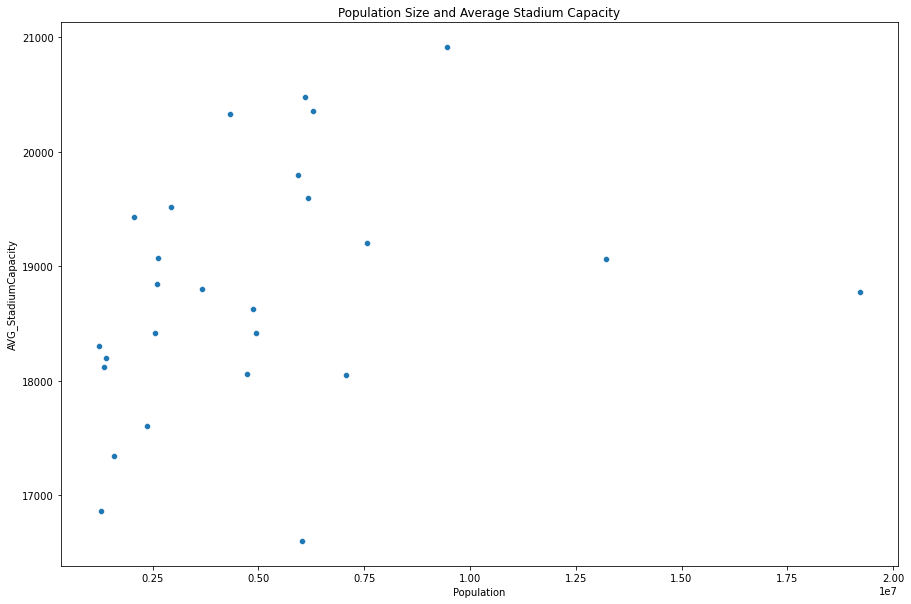

(0.28989890038828686, 0.15084221583070065)

In [167]:
c.execute("""
        SELECT
            c.cityName as City,
            c.population as Pop,
            AVG(l.StadiumCapacity) as AVG_StadiumCapacity,  
            COUNT(DISTINCT l.Stadium) as Distinct_Stadium
        from cities as c
        INNER JOIN league as l on c.CityName == l.cityName
        GROUP BY 1,2
        ORDER BY 2 DESC
""")        
          
df = pd.DataFrame(c.fetchall(), columns=["City", "Pop", "AVG_StadiumCapacity", "Distinct_Stadium"])
print(df.head())

plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Pop'], y=df['AVG_StadiumCapacity'])
plt.title("Population Size and Average Stadium Capacity")
plt.xlabel("Population")
plt.ylabel("AVG_StadiumCapacity")
plt.show()

st.pearsonr(df['Pop'], df['AVG_StadiumCapacity'])

It seems that there is a nice correlation between the city size and the stadium capacity. Other than New York and Los Angeles, which seems as outliers, there is a nice correlation between the population size and the stadium capacity.

4. Does the richest city have the richest team or most paid players?

In [205]:
c.execute(
"""
    SELECT
        t_c.CityName,
        t_c.AvgIncome as income,
        sum(ps.salary) as salary_sum        
    FROM 
        (SELECT
            l.TeamID as TeamID,
            c.CityName as CityName,
            AVG(c.AvgIncome) as AvgIncome
        FROM
            league as l 
        INNER JOIN
            cities as c on l.CityName = c.CityName
        GROUP BY 1,2
        ) as t_c
    LEFT JOIN
        players_stats as ps on ps.TeamID = t_c.TeamID
    GROUP BY 1,2
    
    ORDER BY 2 DESC
"""
)

df = pd.DataFrame(c.fetchall(), columns=["City", "avg_income", "salary_sum"])
df.head()

,City,avg_income,salary_sum
0,Toronto,50906.0,129060926
1,Washington,47411.0,133532012
2,San_Francisco,38355.0,137481373
3,Boston,37311.0,130508608
4,Minneapolis,35388.0,123156594


In [196]:
c.execute("""
        SELECT
            l.TeamID as TeamID,
            c.CityName as CityName,
            AVG(c.AvgIncome) as AvgIncome
        FROM
            league as l 
        INNER JOIN
            cities as c on l.CityName = c.CityName
        GROUP BY 1,2
""")
df = pd.DataFrame(c.fetchall())
df

,0,1,2
0,ATL,Atlanta,25288.0
1,BKN,New_York,28819.0
2,BOS,Boston,37311.0
3,CHA,Charlotte,23417.0
4,CHI,Chicago,33924.0
5,CLE,Cleveland,24275.0
6,DAL,Dallas,23616.0
7,DEN,Denver,32399.0
8,DET,Detroit,22319.0
9,GSW,San_Francisco,38355.0


In [194]:
c.execute("""
        SELECT * FROM league""")
df = pd.DataFrame(c.fetchall())
df

,0,1,2,3,4,5
0,ATL,Atlanta_Hawks,None,State_Farm_Arena,16600,Atlanta
1,BOS,Boston_Celtics,Green,TD_Garden,18624,Boston
2,BKN,Brooklyn_Nets,Black,Barclays_Center,17732,New_York
3,CHA,Charlotte_Hornets,Purple,Spectrum_Center,19077,Charlotte
4,CHI,Chicago_Bulls,Red,United_Center,20917,Chicago
5,CLE,Cleveland_Cavaliers,Wine,Rocket_Mortgage_FieldHouse,19432,Cleveland
6,DAL,Dallas_Mavericks,Blue,American_Airlines_Center,19200,Dallas
7,DEN,Denver_Nuggets,Blue,Ball_Arena,19520,Denver
8,DET,Detroit_Pistons,Red,Little_Caesars_Arena,20332,Detroit
9,GSW,Golden_State_Warriors,Blue,Chase_Center,18064,San_Francisco


In [ ]:
c.execute("""
          SELECT
          league.teamID,
          max()
          COUNT (DISTINCT (case when 
          ((games.hometeam = league.teamID and games.hometeampoints > games.awayteampoints) OR 
          (games.awayteam = league.teamID and games.hometeampoints < games.awayteampoints)) then games.gameID else null end)) as wins
          FROM league
          JOIN games on teamID
          GROUP BY league.teamID
          """)

In [ ]:
c.execute("""
          SELECT
          league.teamID,
          COUNT (DISTINCT (case when 
          ((games.hometeam = league.teamID and games.hometeampoints > games.awayteampoints) OR 
          (games.awayteam = league.teamID and games.hometeampoints < games.awayteampoints)) then games.gameID else null end)) as wins
          FROM league
          JOIN games on teamID
          GROUP BY league.teamID
          """)

df = pd.DataFrame(c.fetchall())
df.head()

In [ ]:
c.execute("""
          SELECT
          league.teamID,
          COUNT (DISTINCT (case when 
          ((games.hometeam = league.teamID and games.hometeampoints > games.awayteampoints) OR 
          (games.awayteam = league.teamID and games.hometeampoints < games.awayteampoints)) then games.gameID else null end)) as wins
          FROM league
          JOIN games on teamID
          GROUP BY league.teamID
          """)

df = pd.DataFrame(c.fetchall())
df.head()

""


In [ ]:
c.execute("""

        SELECT
        league.teamID,
        
        FROM league
        JOIN (SELECT 
        )


""")

df = pd.DataFrame(c.fetchall())
df.head()

In [ ]:


c.execute('''
          SELECT league.teamID,
          COUNT (games.gameID)
          FROM games 
          JOIN games on teamID
          
          
          ''')

df = pd.DataFrame(c.fetchall())
df.head()

""


# Insight 2 - Bigger Cities are Richer

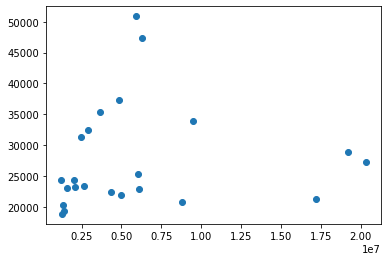

(0.09230405656460047, 0.6753005140492677)

In [ ]:
c.execute('''
          SELECT stateName, sum(population), avg(AvgIncome)
          FROM cities
          GROUP BY 1
          ''')

df = pd.DataFrame(c.fetchall(), columns=['state', 'pop', 'income'])
plt.scatter(df['pop'], df['income'])
plt.show()
st.pearsonr(df['pop'], df['income'])

In [ ]:
c.execute("""
        SELECT cities.stateName,
        count( case when cities.cityName ==league.CityName then league.teamID else null end) 

         
         """)

OperationalError: no such column: cities.stateName

It seems like there is no real connection between bigger states in terms of population and the average income in them.

## Select distinct

In [ ]:
c.execute('''
          SELECT Country
          FROM Customers
          ''')

df = pd.DataFrame(c.fetchall(), columns=['Country'])
print('Number of countries is: ', len(df), '\n')
print('the same number as customers', '\n')

df.head()

Number of countries is:  91 



,Country
0,Germany
1,Mexico
2,Mexico
3,UK
4,Sweden


In [ ]:
c.execute('''
          SELECT DISTINCT Country
          FROM Customers
          ''')

df = pd.DataFrame(c.fetchall(), columns=['Country'])
print('Number of countries is: ', len(df), '\n')

df.head()

Number of countries is:  21 



,Country
0,Germany
1,Mexico
2,UK
3,Sweden
4,France


In [ ]:
c.execute('''
          SELECT COUNT (DISTINCT Country)
          FROM Customers
          ''')

print(c.fetchall()[0][0])

21


## Where

In [ ]:
c.execute('''
          SELECT * FROM Customers
          WHERE Country='Mexico'
          ''')

df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222,México D.F.,05021,Mexico
1,3,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,05023,Mexico
2,13,Centro comercial Moctezuma,Francisco Chang,Sierras de Granada 9993,México D.F.,05022,Mexico
3,58,Pericles Comidas clásicas,Guillermo Fernández,Calle Dr. Jorge Cash 321,México D.F.,05033,Mexico
4,80,Tortuga Restaurante,Miguel Angel Paolino,Avda. Azteca 123,México D.F.,05033,Mexico


In [ ]:
c.execute('''
          SELECT * FROM Customers
          WHERE CustomerID=1
          ''')

df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany


## AND, OR and NOT

In [ ]:
# AND
c.execute('''
          SELECT * FROM Customers
          WHERE Country='Germany' AND City='Berlin'
          ''')

df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany


In [ ]:
# OR
c.execute('''
          SELECT * FROM Customers
          WHERE City='Berlin' OR City='München';
          ''')

df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,25,Frankenversand,Peter Franken,Berliner Platz 43,München,80805,Germany


In [ ]:
# OR
c.execute('''
          SELECT * FROM Customers
          WHERE Country='Germany' OR Country='Spain';
          ''')

df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,6,Blauer See Delikatessen,Hanna Moos,Forsterstr. 57,Mannheim,68306,Germany
2,8,Bólido Comidas preparadas,Martín Sommer,"C Araquil, 67",Madrid,28023,Spain
3,17,Drachenblut Delikatessend,Sven Ottlieb,Walserweg 21,Aachen,52066,Germany
4,22,FISSA Fabrica Inter. Salchichas S.A.,Diego Roel,"C/ Moralzarzal, 86",Madrid,28034,Spain


In [ ]:
# NOT
c.execute('''
          SELECT * FROM Customers
          WHERE NOT Country='Germany';
          ''')

df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222,México D.F.,05021,Mexico
1,3,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,05023,Mexico
2,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
3,5,Berglunds snabbköp,Christina Berglund,Berguvsvägen 8,Luleå,S-958 22,Sweden
4,7,Blondel père et fils,Frédérique Citeaux,"24, place Kléber",Strasbourg,67000,France


## Combining AND, OR & NOT

In [ ]:
c.execute('''
          SELECT * FROM Customers
          WHERE Country='Germany' AND (City='Berlin' OR City='München'); 
          ''')

df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,25,Frankenversand,Peter Franken,Berliner Platz 43,München,80805,Germany


In [ ]:
c.execute('''
          SELECT * FROM Customers
          WHERE NOT Country='Germany' AND NOT Country='USA';
          ''')

df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222,México D.F.,05021,Mexico
1,3,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,05023,Mexico
2,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
3,5,Berglunds snabbköp,Christina Berglund,Berguvsvägen 8,Luleå,S-958 22,Sweden
4,7,Blondel père et fils,Frédérique Citeaux,"24, place Kléber",Strasbourg,67000,France


## Order By

In [ ]:
c.execute('''
          SELECT * FROM Customers
          ORDER BY Country; 
          ''')
# Alphabetical order
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,12,Cactus Comidas para llevar,Patricio Simpson,Cerrito 333,Buenos Aires,1010,Argentina
1,54,Océano Atlántico Ltda.,Yvonne Moncada,Ing. Gustavo Moncada 8585 Piso 20-A,Buenos Aires,1010,Argentina
2,64,Rancho grande,Sergio Gutiérrez,Av. del Libertador 900,Buenos Aires,1010,Argentina
3,20,Ernst Handel,Roland Mendel,Kirchgasse 6,Graz,8010,Austria
4,59,Piccolo und mehr,Georg Pipps,Geislweg 14,Salzburg,5020,Austria


In [ ]:
c.execute('''
          SELECT * FROM Customers
          ORDER BY Country DESC;  
          ''')
# Alphabetical order
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,33,GROSELLA-Restaurante,Manuel Pereira,5ª Ave. Los Palos Grandes,Caracas,1081,Venezuela
1,35,HILARIÓN-Abastos,Carlos Hernández,Carrera 22 con Ave. Carlos Soublette #8-35,San Cristóbal,5022,Venezuela
2,46,LILA-Supermercado,Carlos González,Carrera 52 con Ave. Bolívar #65-98 Llano Largo,Barquisimeto,3508,Venezuela
3,47,LINO-Delicateses,Felipe Izquierdo,Ave. 5 de Mayo Porlamar,I. de Margarita,4980,Venezuela
4,32,Great Lakes Food Market,Howard Snyder,2732 Baker Blvd.,Eugene,97403,USA


In [ ]:
c.execute('''
          SELECT * FROM Customers
          ORDER BY Country, CustomerName;  
          ''')
# Alphabetical order
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,12,Cactus Comidas para llevar,Patricio Simpson,Cerrito 333,Buenos Aires,1010,Argentina
1,54,Océano Atlántico Ltda.,Yvonne Moncada,Ing. Gustavo Moncada 8585 Piso 20-A,Buenos Aires,1010,Argentina
2,64,Rancho grande,Sergio Gutiérrez,Av. del Libertador 900,Buenos Aires,1010,Argentina
3,20,Ernst Handel,Roland Mendel,Kirchgasse 6,Graz,8010,Austria
4,59,Piccolo und mehr,Georg Pipps,Geislweg 14,Salzburg,5020,Austria


In [ ]:
c.execute('''
          SELECT * FROM Customers
          ORDER BY Country ASC, CustomerName DESC;  
          ''')
# Alphabetical order
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,64,Rancho grande,Sergio Gutiérrez,Av. del Libertador 900,Buenos Aires,1010,Argentina
1,54,Océano Atlántico Ltda.,Yvonne Moncada,Ing. Gustavo Moncada 8585 Piso 20-A,Buenos Aires,1010,Argentina
2,12,Cactus Comidas para llevar,Patricio Simpson,Cerrito 333,Buenos Aires,1010,Argentina
3,59,Piccolo und mehr,Georg Pipps,Geislweg 14,Salzburg,5020,Austria
4,20,Ernst Handel,Roland Mendel,Kirchgasse 6,Graz,8010,Austria


## Null values

A field with a NULL value is a field with no value.

If a field in a table is optional, it is possible to insert a new record or update a record without adding a value to this field. Then, the field will be saved with a NULL value.

Note: A NULL value is different from a zero value or a field that contains spaces. A field with a NULL value is one that has been left blank during record creation!

In [ ]:
c.execute('''
          SELECT CustomerName, ContactName, Address
          FROM Customers
          WHERE Address IS NOT NULL;
          ''')
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2
0,Alfreds Futterkiste,Maria Anders,Obere Str. 57
1,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222
2,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312
3,Around the Horn,Thomas Hardy,120 Hanover Sq.
4,Berglunds snabbköp,Christina Berglund,Berguvsvägen 8


## Limit results

In [ ]:
c.execute('''
          SELECT *
          FROM Customers
          LIMIT 3;
          ''')
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222,México D.F.,05021,Mexico
2,3,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,05023,Mexico


In [ ]:
# limit with where clause
c.execute('''
          SELECT *
          FROM Customers
          WHERE Country='Germany'
          LIMIT 3;
          ''')
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,6,Blauer See Delikatessen,Hanna Moos,Forsterstr. 57,Mannheim,68306,Germany
2,17,Drachenblut Delikatessend,Sven Ottlieb,Walserweg 21,Aachen,52066,Germany


## Min & Max

In [ ]:
c.execute('''
          SELECT MIN(Price) AS SmallestPrice
          FROM Products;
          ''')
print(c.fetchall()[0][0])

2.5


In [ ]:
c.execute('''
          SELECT MAX(Price) AS LargestPrice
          FROM Products;
          ''')
print(c.fetchall()[0][0])

263.5


## aggregate functions

In [ ]:
c.execute('''
          SELECT COUNT(ProductID)
          FROM Products;
          ''')
print(c.fetchall()[0][0])

77


In [ ]:
c.execute('''
          SELECT AVG(Price)
          FROM Products;
          ''')
print(c.fetchall()[0][0])

28.866363636363637


In [ ]:
c.execute('''
          SELECT SUM(Quantity)
          FROM Order_Details; 
          ''')
print(c.fetchall()[0][0])

12743


## LIKE operator

In [ ]:
# Customer name that starts with a
c.execute('''
          SELECT * FROM Customers
          WHERE CustomerName LIKE 'a%'; 
          ''')
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,2,Ana Trujillo Emparedados y helados,Ana Trujillo,Avda. de la Constitución 2222,México D.F.,05021,Mexico
2,3,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,05023,Mexico
3,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK


In [ ]:
# Customer name that ends with a
c.execute('''
          SELECT * FROM Customers
          WHERE CustomerName LIKE '%a'; 
          ''')
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,3,Antonio Moreno Taquería,Antonio Moreno,Mataderos 2312,México D.F.,05023,Mexico
1,13,Centro comercial Moctezuma,Francisco Chang,Sierras de Granada 9993,México D.F.,05022,Mexico
2,30,Godos Cocina Típica,José Pedro Freyre,"C/ Romero, 33",Sevilla,41101,Spain
3,61,Que Delícia,Bernardo Batista,"Rua da Panificadora, 12",Rio de Janeiro,02389-673,Brazil
4,62,Queen Cozinha,Lúcia Carvalho,"Alameda dos Canàrios, 891",São Paulo,05487-020,Brazil


In [ ]:
# Customer name that not starts with a
c.execute('''
          SELECT * FROM Customers
          WHERE CustomerName NOT LIKE 'a%'; 
          ''')
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,5,Berglunds snabbköp,Christina Berglund,Berguvsvägen 8,Luleå,S-958 22,Sweden
1,6,Blauer See Delikatessen,Hanna Moos,Forsterstr. 57,Mannheim,68306,Germany
2,7,Blondel père et fils,Frédérique Citeaux,"24, place Kléber",Strasbourg,67000,France
3,8,Bólido Comidas preparadas,Martín Sommer,"C Araquil, 67",Madrid,28023,Spain
4,9,Bon app,Laurence Lebihans,"12, rue des Bouchers",Marseille,13008,France


In [ ]:
# City with name pattern that match L(char)n(char)on
c.execute('''
          SELECT * FROM Customers
          WHERE City LIKE 'L_n_on';
          ''')
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
1,11,Bs Beverages,Victoria Ashworth,Fauntleroy Circus,London,EC2 5NT,UK
2,16,Consolidated Holdings,Elizabeth Brown,Berkeley Gardens 12 Brewery,London,WX1 6LT,UK
3,19,Eastern Connection,Ann Devon,35 King George,London,WX3 6FW,UK
4,53,North/South,Simon Crowther,South House 300 Queensbridge,London,SW7 1RZ,UK


[More on wildcards](https://medium.com/@mayuribudake999/wildcard-operators-in-sql-c5768afc2a6e)

## IN & Between

In [ ]:
c.execute('''
          SELECT * FROM Customers
          WHERE Country IN ('Germany', 'France', 'UK');
          ''')
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5,6
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,4,Around the Horn,Thomas Hardy,120 Hanover Sq.,London,WA1 1DP,UK
2,6,Blauer See Delikatessen,Hanna Moos,Forsterstr. 57,Mannheim,68306,Germany
3,7,Blondel père et fils,Frédérique Citeaux,"24, place Kléber",Strasbourg,67000,France
4,9,Bon app,Laurence Lebihans,"12, rue des Bouchers",Marseille,13008,France


In [ ]:
c.execute('''
          SELECT * FROM Products
          WHERE Price BETWEEN 10 AND 20
          AND CategoryID NOT IN (1,2,3);
          ''')
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5
0,31,4,14,Gorgonzola Telino,12 - 100 g pkgs,12.5
1,36,8,17,Inlagd Sill,24 - 250 g jars,19.0
2,40,8,19,Boston Crab Meat,24 - 4 oz tins,18.4
3,42,5,20,Singaporean Hokkien Fried Mee,32 - 1 kg pkgs.,14.0
4,46,8,21,Spegesild,4 - 450 g glasses,12.0


In [ ]:
c.execute('''
          SELECT * FROM Products
          WHERE ProductName BETWEEN 'Carnarvon Tigers' AND 'Mozzarella di Giovanni'
          ORDER BY ProductName;
          ''')
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4,5
0,18,8,7,Carnarvon Tigers,16 kg pkg.,62.5
1,1,1,1,Chais,10 boxes x 20 bags,18.0
2,2,1,1,Chang,24 - 12 oz bottles,19.0
3,39,1,18,Chartreuse verte,750 cc per bottle,18.0
4,4,2,2,Chef Antons Cajun Seasoning,48 - 6 oz jars,22.0


In [ ]:
c.execute('''
          SELECT * FROM Orders
          WHERE OrderDate BETWEEN '1996-07-01' AND '1996-07-31';
          ''')
df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2,3,4
0,10248,90,5,3,1996-07-04
1,10249,81,6,1,1996-07-05
2,10250,34,4,2,1996-07-08
3,10251,84,3,1,1996-07-08
4,10252,76,4,2,1996-07-09


# Join

Here are the different types of the JOINs in SQL:

     

*   (INNER) JOIN: Returns records that have matching values in both tables
*   LEFT (OUTER) JOIN: Returns all records from the left table, and the matched records from the right table 
*   RIGHT (OUTER) JOIN: Returns all records from the right table, and the matched records from the left table
*   FULL (OUTER) JOIN: Returns all records when there is a match in either left or right table 

In [ ]:
# inner join two tables

c.execute('''
          SELECT Orders.OrderID, Customers.CustomerName
          FROM Orders
          INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID;
          ''')

df = pd.DataFrame(c.fetchall())
df.head()

,0,1
0,10248,Wilman Kala
1,10249,Tradição Hipermercados
2,10250,Hanari Carnes
3,10251,Victuailles en stock
4,10252,Suprêmes délices


In [ ]:
# inner join three tables

c.execute('''
          SELECT Orders.OrderID, Customers.CustomerName, Shippers.ShipperName
          FROM ((Orders
          INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID)
          INNER JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID); 
          ''')

df = pd.DataFrame(c.fetchall())
df.head()

,0,1,2
0,10248,Wilman Kala,Federal Shipping
1,10249,Tradição Hipermercados,Speedy Express
2,10250,Hanari Carnes,United Package
3,10251,Victuailles en stock,Speedy Express
4,10252,Suprêmes délices,United Package


In [ ]:
# left join

c.execute('''
          SELECT Customers.CustomerName, Orders.OrderID
          FROM Customers
          LEFT JOIN Orders ON Customers.CustomerID = Orders.CustomerID
          ORDER BY Customers.CustomerName; 
          ''')

df = pd.DataFrame(c.fetchall())
df.head()

,0,1
0,Alfreds Futterkiste,NaN
1,Ana Trujillo Emparedados y helados,10308.0
2,Antonio Moreno Taquería,10365.0
3,Around the Horn,10355.0
4,Around the Horn,10383.0


In [ ]:
# right and full outer join are currently unsupported...

# Summarize functions

## Group by

In [ ]:
c.execute('''
          SELECT COUNT(CustomerID), Country
          FROM Customers
          GROUP BY Country
          ORDER BY COUNT(CustomerID) DESC;
          ''')

df = pd.DataFrame(c.fetchall())
df.head()

,0,1
0,13,USA
1,11,France
2,11,Germany
3,9,Brazil
4,7,UK


## having

In [ ]:
c.execute('''
          SELECT Employees.LastName, COUNT(Orders.OrderID) AS NumberOfOrders
          FROM (Orders
          INNER JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID)
          GROUP BY LastName
          HAVING COUNT(Orders.OrderID) > 10;
          ''')

df = pd.DataFrame(c.fetchall())
df.head()

,0,1
0,Buchanan,11
1,Callahan,27
2,Davolio,29
3,Fuller,20
4,King,14


In [ ]:
c.execute('''
          SELECT Employees.LastName, COUNT(Orders.OrderID) AS NumberOfOrders
          FROM (Orders
          INNER JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID)
          GROUP BY LastName
          HAVING COUNT(Orders.OrderID) > 10;
          ''')

df = pd.DataFrame(c.fetchall())
df.head()